In [2]:
import scipy.sparse.linalg as LA
from scipy import sparse
import matplotlib.pylab as plt
import os
import py_plantbox as pb
from rb_tools import *

import xylem_flux 

import timeit

import numpy as np
from scipy.integrate import odeint




# Simulate a root system
name = "morning_glory_7m"
plant = pb.Plant()
#sca = pb.Organ.getScalar('organtype')
plant.openXML(name)
plant.initialize()
ana = pb.SegmentAnalyser(plant)

plant.simulate(120)
#for i in range (0,180):
#    plant.simulate(i)
# for i in range(0,7):
#     plant.simulate(1) 



#seg = np.vstack((seg,lseg))
# print("number of root segments",len(rseg))
# print("number of shoot segments",len(sseg))
# print("number of segments",len(seg))

#rootnodes = v2a(sca('organtype'))

#print(rseg)
#print(sseg)
#print(lseg)
#print(sseg[1])

#print(len(nodes))
#print(len(rseg))
#print(len(lseg))



plant.write("../results/"+name+".vtp",15)

In [2]:

nodes_cor = np.column_stack([nodes_organtype, nodes])

plt.rcParams['figure.figsize'] = [18, 10]

import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt




fig = plt.figure()

ax = fig.add_subplot(122, projection='3d')
plt.title('PiafMünch')
x =nodes[:,0]*100
y =nodes[:,1]*100
z =nodes[:,2]*100

# Get rid of colored axes planes
# First remove fill
#ax.set_axis_off()
# Get rid of the panes
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# Get rid of the spines
ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

# Now set color to white (or whatever is "invisible")
#ax.xaxis.pane.set_edgecolor('w')
#ax.yaxis.pane.set_edgecolor('w')
#ax.zaxis.pane.set_edgecolor('w')


ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_zticks([])

# Bonus: To get rid of the grid as well:
ax.grid(False)

def so_si_color(int):
    if int in N1L_node[:,0]: #int is source 
        return 'lightgreen'
    elif int in N1R_node[:,0]: #int is sink
        return 'orange'
    else:
        return 'darkgreen'
    


for i in range(len(nodes_cor)):
    ax.plot([x[i]], [y[i]], [z[i]], marker='${}$'.format(i),
            markersize=12, color=so_si_color(i), alpha=0.5)
    #ax.scatter(cor_x[i], cor_y[i],cor_z[i], s=100, marker = organ_marker(node_connection[i,0]) ,edgecolors= organ_color3(i))

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_zlabel('')
#ax.set_xlim3d(0, 3)
#ax.set_ylim3d(3 ,0)
#ax.set_zlim3d(-3,2)

#ax.elev = 89.9
#ax.azim = 270.1
ax.dist = 6.0
#ax.view_init(0, 90)

stem_nodes = nodes_organtype[(nodes_organtype[:,1]== 4)][:,0] 
root_nodes = nodes_organtype[(nodes_organtype[:,1]== 2)][:,0] 
leaf_nodes = nodes_organtype[(nodes_organtype[:,1]== 8)][:,0] 
#(nodes_organtype[:,1]== 8)|
#print(stem_nodes)



ax = fig.add_subplot(121, projection='3d')
plt.rcParams.update({'font.size': 20})
plt.title('CPlantBox')
x =nodes[:,0]*100
y =nodes[:,1]*100
z =nodes[:,2]*100
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# Get rid of the spines
ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_zticks([])

# Bonus: To get rid of the grid as well:
#ax.grid(False)
#for i in range(len(nodes_cor)):
#    ax.plot([x[i]], [y[i]], [z[i]], marker='${}$'.format(nodes_cor[i,1]),
#            markersize=12, color='black')
def organ_color(int):
    if int in leaf_nodes: #int is source 
        return 'lightgreen'
    elif int in root_nodes: #int is sink
        return 'orange'
    elif int in stem_nodes:
        return 'darkgreen'
    else:
        return 'black'

for i in range(len(node_connection)):
    #xline = [x[node_connection[:,0][i]]],[x[node_connection[:,1][i]]] )
    #yline = np.array([y[node_connection[:,0][i]]],[y[node_connection[:,1][i]]] )
    #zline = np.array([z[node_connection[:,0][i]]],[z[node_connection[:,1][i]]] )
    ax.plot3D(np.array([[x[node_connection[:,0][i]]][0],[x[node_connection[:,1][i]]][0]]), 
              np.array([[y[node_connection[:,0][i]]][0],[y[node_connection[:,1][i]]][0]]), 
              np.array([[z[node_connection[:,0][i]]][0],[z[node_connection[:,1][i]]][0]]), 
              color=organ_color(node_connection[i,0]), alpha=1, linewidth=6)

    
#ax.scatter([x[715]], [y[715]], [z[715]], c='r', s=99)
#ax.scatter([x[860]], [y[860]], [z[860]], c='g', s=99)
#ax.scatter([x[627]], [y[627]], [z[627]], c='g', s=99)

ax.dist = 6.0
ax.set_xlabel('',labelpad=0)
ax.set_ylabel('',labelpad=0)
ax.set_zlabel('',labelpad=0)
#ax.set_xlim3d(0, 3)
#ax.set_ylim3d(3 ,0)
#ax.set_zlim3d(-3,2)
#ax.xaxis.set_ticks(np.arange(0, 3, 1))
#ax.yaxis.set_ticks(np.arange(0 ,3, 1))
#ax.zaxis.set_ticks(np.arange(-3,2, 1))
root_patch = mpatches.Patch(color='orange', label='root')
seed_patch = mpatches.Patch(color='black', label='seed')
stem_patch = mpatches.Patch(color='darkgreen', label='stem')
leaf_patch = mpatches.Patch(color='lightgreen', label='leaf')
plt.legend(handles=[leaf_patch,stem_patch, seed_patch, root_patch],bbox_to_anchor=(0.9, 0.3), loc=2, borderaxespad=0.)

plt.show()


fig.savefig("{}.png".format('3d with node number'), bbox_inches='tight')

NameError: name 'nodes_organtype' is not defined

In [11]:


nodes = vv2a(plant.getNodes())/100 # convert from cm to m 
rseg = seg2a(plant.getSegments(2)) # root system segments
sseg = seg2a(plant.getSegments(4)) # root system segments
seg = np.vstack((sseg,rseg))
# Adjacency matrix
A = sparse.coo_matrix((np.ones(seg.shape[0]),(seg[:,0],seg[:,1]))) 

# Parameters for flux model
rs_Kr = np.array([ 2.e-10, 2.e-10, 2.e-10, 2.e-10, 2.e-10, 2.e-11, 2.e-11 ]) # s/m; root hydraulic radial conductivity per root type 
rs_Kz = np.array([ 5.e-14, 5.e-14, 5.e-14, 5.e-14, 5.e-14, 5.e-14, 5.e-14 ]) # m2*s; root hydraulic axial conductivity per root type 

soil_psi = -700 # static soil pressure J kg^-1

rho = 1e3 # kg / m^3      
g = 1.e-3*9.8065 # m / s^2   

pot_trans = np.array([-1.15741e-10]) # # m^3 s^-1 potential transpiration

# Conversions
plant_ana = pb.SegmentAnalyser(plant) 
radius = v2a(plant_ana.getScalar("radius"))/100. # convert from cm to m
type = v2a(plant_ana.getScalar("subtype"))
kr = np.array(list(map(lambda t: rs_Kr[int(t)-1], type))) # convert from 'per type' to 'per segment'
kr.resize((kr.shape[0],1))
kz = np.array(list(map(lambda t: rs_Kz[int(t)-1], type)))     
kz.resize((kz.shape[0],1))          

print(radius)
# glue together shoot and root segments
shoot1 = np.ones((sseg.shape[0],1))                    
shoot0 = np.ones((sseg.shape[0],1))
radius = np.vstack((shoot1,radius))
kr =  np.vstack((shoot0,kr))
kz =  np.vstack((shoot1,kz))  
            
# Call back function for soil potential
soil = lambda x,y,z : soil_psi

# Calculate fluxes within the root system
Q, b = xylem_flux.linear_system(seg, nodes, radius, kr, kz, rho, g, soil)
# plt.spy(Q)
# plt.show()
Q, b = xylem_flux.bc_neumann(Q, b, np.array([0]), np.array([pot_trans]))


start = timeit.default_timer()
x = LA.spsolve(Q, b, use_umfpack = True) # direct
stop = timeit.default_timer()
print ("linear system solved in", stop - start, " s") 
      
# Save results into vtp 
segP = nodes2seg(nodes,seg,x)# save vtp 
axial_flux = xylem_flux.axial_flux(x, seg, nodes, kz, rho, g)
radial_flux = xylem_flux.radial_flux(x, seg, nodes, radius, kr, soil)
net_flux = axial_flux+radial_flux

plant_ana.addUserData(a2v(segP[sseg.shape[0]:]),"pressure")
plant_ana.addUserData(a2v(axial_flux[sseg.shape[0]:]),"axial_flux")
plant_ana.addUserData(a2v(radial_flux[sseg.shape[0]:]),"radial_flux")
plant_ana.addUserData(a2v(net_flux[sseg.shape[0]:]),"net_flux")

plant_ana.write("results/morning_glory.vtp")

[[0.00218101]
 [0.00218101]
 [0.00218101]
 [0.00218101]
 [0.00218101]
 [0.00218101]
 [0.00218101]
 [0.00218101]
 [0.00153445]
 [0.00153445]
 [0.00153445]
 [0.00153445]
 [0.00153445]
 [0.00153445]
 [0.00153445]
 [0.00153445]
 [0.00153445]
 [0.00153445]
 [0.00153445]
 [0.00225319]
 [0.00225319]
 [0.00225319]
 [0.00225319]
 [0.00225319]
 [0.00225319]
 [0.00225319]
 [0.00225319]
 [0.00225319]
 [0.00225319]
 [0.00225319]
 [0.00211901]
 [0.00211901]
 [0.00211901]
 [0.00211901]
 [0.00211901]
 [0.00211901]
 [0.00211901]
 [0.00211901]
 [0.00211901]
 [0.00211901]
 [0.00211901]
 [0.00181985]
 [0.00181985]
 [0.00181985]
 [0.00181985]
 [0.00181985]
 [0.00181985]
 [0.00181985]
 [0.00181985]
 [0.00181985]
 [0.00181985]
 [0.00181985]
 [0.005     ]
 [0.005     ]
 [0.005     ]
 [0.005     ]
 [0.005     ]
 [0.005     ]
 [0.005     ]
 [0.005     ]
 [0.005     ]
 [0.005     ]
 [0.005     ]
 [0.005     ]
 [0.005     ]
 [0.005     ]
 [0.005     ]
 [0.005     ]
 [0.005     ]
 [0.005     ]
 [0.005     ]
 [0.00

TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [3]:
# Create graph
nodes = vv2a(plant.getNodes())/100 # convert from cm to m 
rseg = seg2a(plant.getSegments(15)) # root system segments
sseg = seg2a(plant.getSegments(4)) # strm system segments
lseg = v2ai(plant.getNodesOrganType())


plant_ana = pb.SegmentAnalyser(plant) 

nodes = vv2a(plant.getNodes())/100 # convert from cm to m 
node_connection_o = seg2a(plant.getSegments(15)) # plant segments
#sseg = seg2a(plant.getSegments(4)) #
node_organtype = v2ai(plant.getNodesOrganType())


nodes_with_organtype = np.column_stack([node_connection_o, node_organtype]) #make the node has organtype, to know the source sink relation

node_connection1, node_connection2 = np.split(node_connection_o.T,2)

node_connection1 = np.row_stack([node_connection1, node_organtype])
node_connection2 = np.row_stack([node_connection2, node_organtype])

nodes_organtype = np.column_stack([node_connection1,node_connection2])
_, indices = np.unique(nodes_organtype.T[:,0], return_index=True)
nodes_organtype = nodes_organtype.T[indices,:]
nodes_cor = np.column_stack([nodes_organtype, nodes])


#print(nodes_organtype)
#print(node_connection2)
#print(nodes_with_organtype)   
print(node_connection_o)
node_connection = np.copy(node_connection_o)

unq, unq_idx, unq_cnt = np.unique(node_connection, return_inverse=True, return_counts=True)
#print(unq) 

#print(unq_cnt) 

#print(len(nodes))
#print(len(unq))
 
#print(len(unq_cnt))
#print(len(node_connection))

#type = v2a(plant.getScalar(15,"subtype"))
#otype = v2a(plant.getScalar(15,"organtype"))
#print(otype)
#print(len(otype))


nodes_organtype = np.column_stack((nodes_organtype,unq_cnt ))
nodes_organtype.astype(np.int_)

node_connection.astype(np.int_)
print(len(node_connection))
print(len(nodes_organtype))
print(nodes_organtype)
print(node_connection)

nodes_cor = np.column_stack([nodes_organtype, nodes])

stem_nodes = nodes_organtype[(nodes_organtype[:,1]== 8)|(nodes_organtype[:,1]== 4)][:,0]
index_stem= list(range(1, len(stem_nodes)+1))
for i in range(len(stem_nodes)):
    index_stem[i] = np.where( node_connection[:,1] == stem_nodes[i])

for i in range(len(index_stem)-1):
    node_connection[index_stem[i+1][0][0]]=node_connection[index_stem[i+1][0][0]][::-1]
node_connection
index_stem

[[  0   2]
 [  2  14]
 [ 14  15]
 [ 15  27]
 [ 27  28]
 [ 28  40]
 [  2   3]
 [  3   4]
 [  4   5]
 [  5   6]
 [  6   7]
 [  7   8]
 [  8   9]
 [  9  10]
 [ 10  11]
 [ 11  12]
 [ 12  13]
 [ 15  16]
 [ 16  17]
 [ 17  18]
 [ 18  19]
 [ 19  20]
 [ 20  21]
 [ 21  22]
 [ 22  23]
 [ 23  24]
 [ 24  25]
 [ 25  26]
 [ 28  29]
 [ 29  30]
 [ 30  31]
 [ 31  32]
 [ 32  33]
 [ 33  34]
 [ 34  35]
 [ 35  36]
 [ 36  37]
 [ 37  38]
 [ 38  39]
 [  1  41]
 [ 41  42]
 [ 42  43]
 [ 43  44]
 [ 44  45]
 [ 45  46]
 [ 46  47]
 [ 47  48]
 [ 48  49]
 [ 49  50]
 [ 50  51]
 [ 51  52]
 [ 52  53]
 [ 53  54]
 [ 54  55]
 [ 55  56]
 [ 56  57]
 [ 57  58]
 [ 58  59]
 [ 59  60]
 [ 60  61]
 [ 61  62]
 [ 62  63]
 [ 63  64]
 [ 64  65]
 [ 65  66]
 [ 66  67]
 [ 67  68]
 [ 68  72]
 [ 72  73]
 [ 73  74]
 [ 74  75]
 [ 75  76]
 [ 76  77]
 [ 77  78]
 [ 78  79]
 [ 79  80]
 [ 80  84]
 [ 84  85]
 [ 85  86]
 [ 86  87]
 [ 87  88]
 [ 88  89]
 [ 89  90]
 [ 90  91]
 [ 91  92]
 [ 92  96]
 [ 96  97]
 [ 97  98]
 [ 98  99]
 [ 99 100]
 [100 101]

[(array([], dtype=int64),),
 (array([39]),),
 (array([40]),),
 (array([41]),),
 (array([42]),),
 (array([43]),),
 (array([44]),),
 (array([45]),),
 (array([46]),),
 (array([47]),),
 (array([48]),),
 (array([49]),),
 (array([50]),),
 (array([51]),),
 (array([52]),),
 (array([53]),),
 (array([54]),),
 (array([55]),),
 (array([56]),),
 (array([57]),),
 (array([58]),),
 (array([59]),),
 (array([60]),),
 (array([61]),),
 (array([62]),),
 (array([63]),),
 (array([64]),),
 (array([65]),),
 (array([66]),),
 (array([189]),),
 (array([190]),),
 (array([191]),),
 (array([67]),),
 (array([68]),),
 (array([69]),),
 (array([70]),),
 (array([71]),),
 (array([72]),),
 (array([73]),),
 (array([74]),),
 (array([75]),),
 (array([192]),),
 (array([193]),),
 (array([194]),),
 (array([76]),),
 (array([77]),),
 (array([78]),),
 (array([79]),),
 (array([80]),),
 (array([81]),),
 (array([82]),),
 (array([83]),),
 (array([84]),),
 (array([195]),),
 (array([196]),),
 (array([197]),),
 (array([85]),),
 (array([86

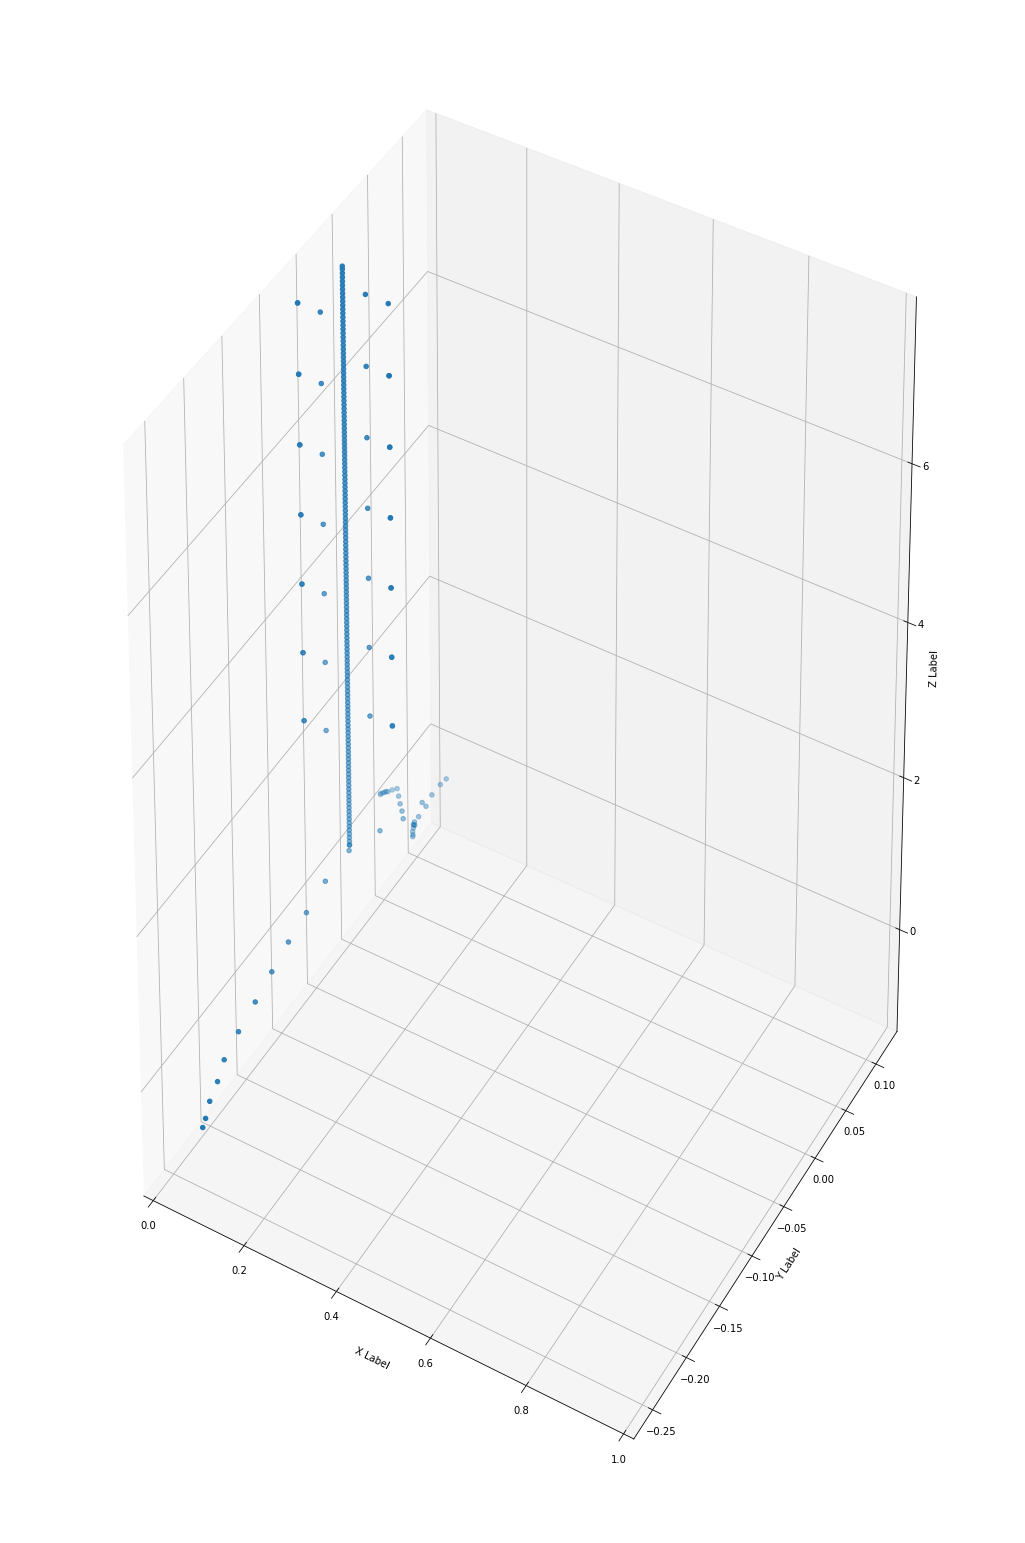

In [20]:
nodes_cor = np.column_stack([nodes_organtype, nodes])

plt.rcParams['figure.figsize'] = [18, 28]


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =nodes_cor[:,3]
y =nodes_cor[:,4]
z =nodes_cor[:,5]



#for i in range(len(nodes_cor)):
#    ax.plot([x[i]], [y[i]], [z[i]], marker='${}$'.format(nodes_cor[i,1]),
#            markersize=12, color='black')


ax.scatter(x, y, z)
#ax.scatter([x[715]], [y[715]], [z[715]], c='r', s=99)
#ax.scatter([x[860]], [y[860]], [z[860]], c='g', s=99)
#ax.scatter([x[627]], [y[627]], [z[627]], c='g', s=99)


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_xlim3d(0, 1)
#ax.set_ylim3d(1,0)
#ax.set_zlim3d(2.5,6.5)
plt.show()

viscosity of sieve tube sap  μ      MPa s
The total resistance of a stem section of length L is Rtot=L/ℓ(RL+Rp)Rtot=L/ℓ(RL+Rp), where the factor L/ℓL/ℓ is the number of tubes arranged in series.
So N =  L/ℓ
14050.3 MPa h mL^-1 is the default number in PiafMunch

Rtot= ηL/(πr2k)

k=ηL/(πr2Rtot)



R_st= 14050.3 / N



Rtot=L/ℓ(RL+Rp)
Total resistance is calculated based on the resistance of the length of the sieve tube and the sieve plate. is 

R_st=ηℓ/(πr2k)

Rtot= ηL/(πr2k)

Unit of R_st is MPa h ml^-1 
Unit of Viscosity miu or eta is mPa s
Unit of radius and length of sieve tubes is micrometer



1.7 *3600* 0.02/3.1415926*0.0014/0.0014/1.2

k = permia g

g= n/m





/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [4]:
import rpy2.rinterface #include R interface, so we could directly use R code in jupyter notebook
#! sudo apt-get install r-base rpy2 pandas
#if package not found, then use commandline to "pip3 install rpy2"
import rpy2.robjects as rr
%load_ext rpy2.ipython



In [5]:
%%R 
k <- 1.118e-12 # conductivity (m2)
n <- 1.7e-9 / 3600 # viscosity (MPa.h)
s <- (12.880e-6)^2*pi # surface (m2)
l <- 5e-2 # length (m)

K1 <- (k/n)*(s/l) *10^6

K_1 <- (1 / K1)
print(K_1)

# 1 meter inner phloem resistance

k <- 0.693e-12 # conductivity (m2)
n <- 1.7e-9 / 3600 # viscosity (MPa.h)
s <- (14.6e-6)^2*pi # surface (m2)
l <- 5e-2 # length (m)

K1 <- (k/n)*(s/l) *10^6

K_4 <- (1 / K1)
print(K_4)
# 4 meter inner phloem resistance

k <- 0.879e-12 # conductivity (m2)
n <- 1.7e-9 / 3600 # viscosity (MPa.h)
s <- (9.83e-6)^2*pi # surface (m2)
l <- 5e-2 # length (m)

K1 <- (k/n)*(s/l) *10^6

K_7 <- (1 / K1)
print(K_7)

#7 meter inner phloem resistance

[1] 40.5222
[1] 50.87772
[1] 88.4852


In [83]:
%%R 
k <- 1.795e-12 # conductivity (m^2)
n <- 1.7e-9 / 3600 # viscosity (MPa.h)
s <- (13.830e-6)^2*pi # surface (m^2)
l <- 5e-2 # length (m)

K1 <- (k/n)*(s/l) *10^6 

K_1_i <- (1 / K1)
print(K_1_i)
 
k <- 0.98712e-12 # conductivity (m^2)
n <- 1.7e-9 / 3600 # viscosity (MPa.h)
s <- (19.710e-6)^2*pi # surface (m^2)
l <- 5e-2 # length (m)

K1 <- (k/n)*(s/l) *10^6

K_4_i <- (1 / K1)
print(K_4_i)
 
k <- 0.3532e-12 # conductivity (m^2)
n <- 1.7e-9 / 3600 # viscosity (MPa.h)
s <- (10.670e-6)^2*pi # surface (m^2)
l <- 5e-2 # length (m)

K1 <- (k/n)*(s/l) *10^6

K_7_i <- (1 / K1)
print(K_7_i)

R_name = c(1,4,7)
R_in_number = c(K_1/222,K_4/193,K_7/127)
R_ex_number = c(K_1_i,K_4_i,K_7_i)
R_in_number[2]

[1] 21.8906
[1] 19.59852
[1] 186.9033
[1] 0.2636151


In [84]:


R_name = rr.r['R_name'] #get R object and 
R_in_number = rr.r['R_in_number'] 
R_ex_number = rr.r['R_ex_number']
R_in_number
R_in_number[0:3]


R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7f541a1d1308 / R:0x3b5ec28>
[0.182532, 0.263615, 0.696734]

In [82]:
5e-2 /225e-6

5/225/1e-4

222.22222222222223

In [95]:
st_v_1m= 12.88 **2 *3.1415926*225 *1e-12 #1m st volume in ml
st_v_4m=14.6 **2 *3.1415926*259 *1e-12
st_v_7m=9.83 **2 *3.1415926*393 *1e-12
print(st_v_1m,st_v_4m,st_v_7m) 



1.1726383936982402e-07 1.7344242656154397e-07 1.1930247441415302e-07


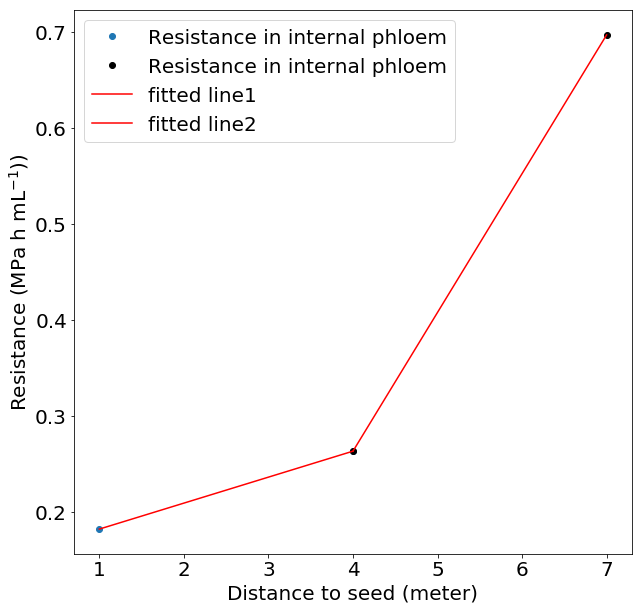

In [85]:

#Adding deviation error bar later
plt.rcParams['figure.figsize'] = [10, 10]
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(R_name[0:2], R_in_number[0:2])
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(R_name[1:3], R_in_number[1:3])
plt.plot(R_name[0:2], R_in_number[0:2], 'o', label='Resistance in internal phloem')
plt.plot(R_name[1:3], R_in_number[1:3], 'o', label='Resistance in internal phloem', c='black' )
plt.plot(R_name[0:2], intercept + slope*R_name[0:2], 'r', label='fitted line1')
plt.plot(R_name[1:3], intercept2 + slope2*R_name[1:3], 'r', label='fitted line2')
plt.xlabel("Distance to seed (meter)")
plt.ylabel("Resistance (MPa h mL$^{-1}$))")
plt.legend()
plt.show()



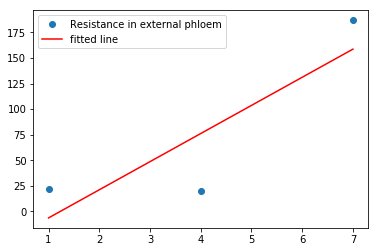

In [12]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(R_name, R_ex_number)
plt.plot(R_name, R_ex_number, 'o', label='Resistance in external phloem')
plt.plot(R_name, intercept + slope*R_name, 'r', label='fitted line')
plt.legend()
plt.show()

In [10]:
import pandas as pd

stem_nodes = nodes_organtype[(nodes_organtype[:,1]== 4)][:,0] 
root_nodes = nodes_organtype[(nodes_organtype[:,1]== 2)][:,0] 
leaf_nodes = nodes_organtype[(nodes_organtype[:,1]== 8)][:,0] 

def organ_marker(int):
    if int in leaf_nodes:
    #if int == 21: #int is source 
        return 'o'
    elif int in root_nodes : #int is sink
        return 'x'
    #elif int == 40 :
    elif int in stem_nodes:
        return '*'
    else:
        return 'None'
node_connection
#node_connection_cor
nodes_c_cor = np.full((len(node_connection), 3),0.0)
#charar = np.chararray((3, 3))
nodes_org = np.full((len(node_connection), 1),0)
for i in range(0,len(node_connection)):
    nodes_org[i]= nodes_organtype[node_connection[i][0]][1]
nodes_c_marker = np.full((len(node_connection), 1),'k')
for i in range(0,len(node_connection)):
    nodes_c_marker[i]= organ_marker(node_connection[i][0])
nodes_c_marker[0][0]= 'D'
nodes_c_marker.astype(str, copy = True)


for i in range(0,len(node_connection)):
    nodes_c_cor[i] = (nodes[node_connection[i,0]] + nodes[node_connection[i,1]])/2


    
    
b = np.zeros((nodes_organtype.shape[0],nodes_organtype.shape[1]+1)); b[:,:-1] = nodes_organtype
node_c_o = np.zeros((node_connection.shape[0],node_connection.shape[1]+5)); node_c_o[:,:-5] = node_connection

for i in range(0,len(node_connection)):
    node_c_o[i][2:5] = (nodes[node_connection[i,0]] + nodes[node_connection[i,1]])/2
#    node_c_o[i][6] = nodes_organtype[node_c_o[i][0]][0]
    #node_c_o[i][6] = nodes_organtype[node_c_o[i][0]][1]

    


r_st_all = np.full((len(node_connection), 1),0.0)
for i in range(0,len(node_connection)):
    r_st_all[i]= intercept + slope*node_c_o[i,4]


    
node_c_o = pd.DataFrame({'1st_node':node_connection[:,0],'2nd_node':node_connection[:,1],'x':node_c_o[:,2]
                        ,'y':node_c_o[:,3],'z':node_c_o[:,4], 'organ_type':nodes_org[:,0],'marker':nodes_c_marker[:,0], 'r_st':r_st_all[:,0]})
node_c_o

1st_node  2nd_node         x             y         z  organ_type marker  \
0           0         2  0.001453  8.540980e-04 -0.054943           2      D   
1           2        14  0.007130  2.471231e-03 -0.104515           2      x   
2          14        15  0.007350  1.835776e-02 -0.148644           2      x   
3          15        27  0.000289  5.038753e-02 -0.186305           2      x   
4          27        28 -0.000958  8.184507e-02 -0.224715           2      x   
5          28        40  0.000913  1.016192e-01 -0.253490           2      x   
6           2         3  0.010674 -1.188197e-02 -0.099379           2      x   
7           3         4  0.025923 -3.857858e-02 -0.138803           2      x   
8           4         5  0.041172 -6.430826e-02 -0.178867           2      x   
9           5         6  0.055494 -8.946350e-02 -0.219614           2      x   
10          6         7  0.067563 -1.144111e-01 -0.261216           2      x   
11          7         8  0.077653 -1.367304e-01 -0.304697           2      x   
12          8         9  0.081987 -1.542109e-01 -0.351014           2      x   
13          9        10  0.082076 -1.694507e-01 -0.398631           2      x   
14         10        11  0.082833 -1.828171e-01 -0.446763           2      x   
15         11        12  0.083698 -1.943031e-01 -0.495418           2      x   
16         12        13  0.082826 -2.012170e-01 -0.534624           2      x   
17         15        16 -0.017565  4.146079e-02 -0.179282           2      x   
18         16        17 -0.059517  5.621546e-02 -0.202098           2      x   
19         17        18 -0.100952  6.994363e-02 -0.226454           2      x   
20         18        19 -0.140265  8.144211e-02 -0.254829           2      x   
21         19        20 -0.176074  8.883795e-02 -0.288737           2      x   
22         20        21 -0.209002  9.605496e-02 -0.325620           2      x   
23         21        22 -0.239011  1.049094e-01 -0.364534           2      x   
24         22        23 -0.266416  1.119864e-01 -0.405699           2      x   
25         23        24 -0.290803  1.182393e-01 -0.448795           2      x   
26         24        25 -0.312883  1.227145e-01 -0.493340           2      x   
27         25        26 -0.331316  1.238694e-01 -0.528790           2      x   
28         28        29 -0.009329  9.746279e-02 -0.267771           2      x   
29         29        30 -0.027654  9.635785e-02 -0.314116           2      x   
..        ...       ...       ...           ...       ...         ...    ...   
200       107       106  0.100219  4.909292e-17  2.720000           8      o   
201       117       116 -0.025000 -1.530808e-17  3.170000           8      o   
202       118       117 -0.075000 -4.592425e-17  3.170000           8      o   
203       119       118 -0.100218 -6.136593e-17  3.170000           8      o   
204       129       128  0.025000  1.836970e-17  3.620000           8      o   
205       130       129  0.075000  5.510911e-17  3.620000           8      o   
206       131       130  0.100218  7.363875e-17  3.620000           8      o   
207       141       140 -0.025000 -2.143132e-17  4.070000           8      o   
208       142       141 -0.075000 -6.429396e-17  4.070000           8      o   
209       143       142 -0.100217 -8.591130e-17  4.070000           8      o   
210       153       152  0.025000  2.449294e-17  4.520000           8      o   
211       154       153  0.075000  7.347881e-17  4.520000           8      o   
212       155       154  0.100216  9.818339e-17  4.520000           8      o   
213       165       164 -0.025000 -2.755455e-17  4.970000           8      o   
214       166       165 -0.075000 -8.266366e-17  4.970000           8      o   
215       167       166 -0.100215 -1.104547e-16  4.970000           8      o   
216       177       176  0.025000  3.061617e-17  5.420000           8      o   
217       178       177  0.075000  9.184851e-17  5.420000           8      o   
218  

In [11]:
#claculate the length from seed of every nodes (root is minus)
nodes_length = np.zeros(len(nodes_cor))
for i in range(2,len(nodes_cor)):
    if nodes_cor[i][1]==2: #if the organtype is root
        nodes_length[i] = nodes_length[node_connection_o[(node_connection_o[:,1] == i)][0][0]] - ((nodes_cor[node_connection_o[(node_connection_o[:,1] == i)][0][0]][3]-nodes_cor[node_connection_o[(node_connection_o[:,1] == i)][0][1]][3])**2 + (nodes_cor[node_connection_o[(node_connection_o[:,1] == i)][0][0]][4]-nodes_cor[node_connection_o[(node_connection_o[:,1] == i)][0][1]][4])**2 + (nodes_cor[node_connection_o[(node_connection_o[:,1] == i)][0][0]][5]-nodes_cor[node_connection_o[(node_connection_o[:,1] == i)][0][1]][5])**2)**(0.5) 
    else:
        nodes_length[i] = nodes_length[node_connection_o[(node_connection_o[:,1] == i)][0][0]] + ((nodes_cor[node_connection_o[(node_connection_o[:,1] == i)][0][0]][3]-nodes_cor[node_connection_o[(node_connection_o[:,1] == i)][0][1]][3])**2 + (nodes_cor[node_connection_o[(node_connection_o[:,1] == i)][0][0]][4]-nodes_cor[node_connection_o[(node_connection_o[:,1] == i)][0][1]][4])**2 + (nodes_cor[node_connection_o[(node_connection_o[:,1] == i)][0][0]][5]-nodes_cor[node_connection_o[(node_connection_o[:,1] == i)][0][1]][5])**2)**(0.5) 

        
        
#     print(nodes_length[i])
#     print(i)
    #print(node_connection[i])
    #the length of the first node of connection i in node_connection
    #node_c_o[i][6] = nodes_organtype[node_c_o[i][0]][0]
    #node_c_o[i][6] = nodes_organtype[node_c_o[i][0]][1]

    #manual check the length of all nodes.
nodes_cor[node_connection[(node_connection[:,1] == 3)][0][0]][2]
#len(nodes_length)
#print(len(nodes_length))
nodes_length
#node_connection_o[0,0]=1
np.c_[ nodes_organtype, nodes_length]

array([[ 0.00000000e+00,  2.00000000e+00,  1.00000000e+00,
         0.00000000e+00],
       [ 1.00000000e+00,  4.00000000e+00,  1.00000000e+00,
         0.00000000e+00],
       [ 2.00000000e+00,  2.00000000e+00,  3.00000000e+00,
        -5.00000000e-02],
       [ 3.00000000e+00,  2.00000000e+00,  2.00000000e+00,
        -1.00000000e-01],
       [ 4.00000000e+00,  2.00000000e+00,  2.00000000e+00,
        -1.50000000e-01],
       [ 5.00000000e+00,  2.00000000e+00,  2.00000000e+00,
        -2.00000000e-01],
       [ 6.00000000e+00,  2.00000000e+00,  2.00000000e+00,
        -2.50000000e-01],
       [ 7.00000000e+00,  2.00000000e+00,  2.00000000e+00,
        -3.00000000e-01],
       [ 8.00000000e+00,  2.00000000e+00,  2.00000000e+00,
        -3.50000000e-01],
       [ 9.00000000e+00,  2.00000000e+00,  2.00000000e+00,
        -4.00000000e-01],
       [ 1.00000000e+01,  2.00000000e+00,  2.00000000e+00,
        -4.50000000e-01],
       [ 1.10000000e+01,  2.00000000e+00,  2.00000000e+00,
      

In [11]:
nodes_cor

array([[ 0.00000000e+00,  2.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -3.00000000e-02],
       [ 1.00000000e+00,  4.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -3.00000000e-02],
       [ 2.00000000e+00,  2.00000000e+00,  3.00000000e+00,
         1.58243505e-03,  6.60472902e-03, -7.95365870e-02],
       ...,
       [ 2.29000000e+02,  4.00000000e+00,  2.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  7.37000000e+00],
       [ 2.30000000e+02,  4.00000000e+00,  2.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  7.42000000e+00],
       [ 2.31000000e+02,  4.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  7.45753832e+00]])

In [12]:

len(nodes_organtype)
#node_connection
len(nodes_cor)
nodes_cor[:,4]
nodes_r_st = np.zeros(len(nodes_cor))
for i in range(0,len(nodes_cor)):
    if nodes_length[i] > R_name[1]:
        nodes_r_st[i]= (intercept2 + slope2*nodes_length[i])
    else:
        nodes_r_st[i]= (intercept + slope*nodes_length[i])
nodes_r_st


#R_st is calculated based on the height (or the z axis value), 

array([1.57717392, 1.57717392, 1.56393671, 1.55069949, 1.53746228,
       1.52422506, 1.51098785, 1.49775063, 1.48451342, 1.4712762 ,
       1.45803899, 1.44480177, 1.43156456, 1.42362838, 1.55069949,
       1.53746228, 1.52422506, 1.51098785, 1.49775063, 1.48451342,
       1.4712762 , 1.45803899, 1.44480177, 1.43156456, 1.41832735,
       1.40509013, 1.39715655, 1.52422506, 1.51098785, 1.49775063,
       1.48451342, 1.4712762 , 1.45803899, 1.44480177, 1.43156456,
       1.41832735, 1.40509013, 1.39185292, 1.3786157 , 1.37085141,
       1.50569296, 1.59041113, 1.60364835, 1.61688556, 1.63012278,
       1.64335999, 1.65659721, 1.66983442, 1.68307164, 1.69630885,
       1.70954607, 1.72278328, 1.73602049, 1.74925771, 1.76249492,
       1.77573214, 1.78896935, 1.80220657, 1.81544378, 1.828681  ,
       1.84191821, 1.85515543, 1.86839264, 1.88162985, 1.89486707,
       1.90810428, 1.9213415 , 1.93457871, 1.94781593, 1.96105314,
       1.97429036, 1.97440644, 1.96105314, 1.97429036, 1.98752

In [94]:
#calcuate the volumn of st

st_v_1m= 12.88 **2 *3.1415926*225 *1e-12 #1m st volume in ml
st_v_4m=14.6 **2 *3.1415926*259 *1e-12
st_v_7m=9.83 **2 *3.1415926*393 *1e-12
print(st_v_1m,st_v_4m,st_v_7m)

1.1726383936982402e-07 1.7344242656154397e-07 1.1930247441415302e-07


In [99]:
# file-output.py



Nt = len(nodes)-1
Nc = len(node_connection)

#condition = ==0
#print(nodes_organtype[:,0])
nodes_organtype[1,2] =2
nodes_organtype[1,1] =1
node_connection[0,0] =1

N1L_node = nodes_organtype[(nodes_organtype[:,0] >2 ) & ((nodes_organtype[:,1] ==8)|(nodes_organtype[:,1] ==4)  ) & (nodes_organtype[:,2] ==1 )]

N1L_c_nd = list(range(1, len(N1L_node)+1))
N1L_conn = list(range(1, len(N1L_node)+1))
for i in range(len(N1L_node)):
    N1L_c_nd[i] = node_connection[(node_connection[:,0] == N1L_node[i][0])]
    N1L_conn[i] = np.where( node_connection[:,1] == N1L_c_nd[i][0,1])[0]


N1R_node = nodes_organtype[(nodes_organtype[:,0] >2 ) & (nodes_organtype[:,1] ==2 ) & (nodes_organtype[:,2] ==1 )]
N1R_c_nd = list(range(1, len(N1R_node)+1))
N1R_conn = list(range(1, len(N1R_node)+1))
for i in range(len(N1R_node)):
    N1R_c_nd[i] = node_connection[(node_connection[:,1] == N1R_node[i][0])]
    N1R_conn[i] = np.where( node_connection[:,1] == N1R_c_nd[i][0,1])[0]
N1R_r_abs = 1e-025

N2_node = nodes_organtype[ (nodes_organtype[:,2] ==2 )]

# #print(N2_node)
# N2_c_nd_1 = list(range(1, len(N2_node)+1))
# N2_conn_1 = list(range(1, len(N2_node)+1))
# for i in range(len(N2_node)):
#     if N2_node[i,1] == 2 or N2_node[i,1] == 1:
#         N2_c_nd_1[i] = node_connection[(node_connection[:,0] == N2_node[i,0])]
#         N2_conn_1[i] = np.where( node_connection[:,0] == N2_c_nd_1[i][0,0])[0]
#     else:
#         N2_c_nd_1[i] = node_connection[(node_connection[:,0] == N2_node[i,0])]
#         N2_conn_1[i] = np.where( node_connection[:,0] == N2_c_nd_1[i][0,0])[0]

# #temp= N2_c_nd_1[0]
# #temp=temp[::-1] 
# #print(temp )
# N2_c_nd_2 = list(range(1, len(N2_node)+1))
# N2_conn_2 = list(range(1, len(N2_node)+1))

# for i in range(len(N2_node)):
#     if N2_node[i,1] == 2 or N2_node[i,1] == 1:
#         N2_c_nd_2[i] = node_connection[(node_connection[:,1] == N2_node[i,0])]
#     else:
#         N2_c_nd_2[i] = node_connection[(node_connection[:,1] == N2_node[i,0])]
# #N2_c_nd_2[0] = np.array([temp]) 
# #print(N2_c_nd_2)
# for i in range(len(N2_node)):
#     N2_conn_2[i] = np.where( node_connection[:,1] == N2_c_nd_2[i][0][0])[0]

# N2_conn_2[0]=[0-(np.where( node_connection[:,0] == 1))[0][1]-2]


################## Nodes With 2 Connections #########################
N2_c_nd_1 = list(range(1, len(N2_node)+1))
N2_conn_1 = list(range(1, len(N2_node)+1))
for i in range(len(N2_node)):
    N2_c_nd_1[i] = node_connection[(node_connection[:,0] == N2_node[i,0])]
    N2_conn_1[i] = np.where( node_connection[:,0] == N2_c_nd_1[i][0,0])[0]


#temp= N2_c_nd_1[0]
#temp=temp[::-1] 
#print(temp )

N2_c_nd_2 = list(range(1, len(N2_node)+1))
N2_conn_2 = list(range(1, len(N2_node)+1))

for i in range(len(N2_node)):
    N2_c_nd_2[i] = node_connection[(node_connection[:,1] == N2_node[i,0])]
    N2_conn_2[i] = np.where( node_connection[:,1] == N2_c_nd_2[i][0][1])[0]

    

################## Nodes With 3 Connections #########################
N3_node = nodes_organtype[ (nodes_organtype[:,2] ==3 )]
print(N3_node)

N3_c_nd_1 = list(range(1, len(N3_node)+1))
N3_conn_1 = list(range(1, len(N3_node)+1))
for i in range(len(N3_node)):
    if N3_node[i,1] == 2 or N2_node[i,1] == 1:
        N3_c_nd_1[i] = node_connection[(node_connection[:,1] == N3_node[i,0])][0][0]
        N3_conn_1[i] = 0-np.where( node_connection[:,0] == N3_c_nd_1[i])[0][0]-1
    else:
        N3_c_nd_1[i] = node_connection[(node_connection[:,0] == N3_node[i,0])][0][1]
        N3_conn_1[i] = np.where( node_connection[:,1] == N3_c_nd_1[i])[0][0]+1

N3_c_nd_2 = list(range(1, len(N3_node)+1))
N3_conn_2 = list(range(1, len(N3_node)+1))
for i in range(len(N3_node)):
    if N3_node[i,1] == 2 or N2_node[i,1] == 1:
        N3_c_nd_2[i] = node_connection[(node_connection[:,0] == N3_node[i,0])][0][1]
        N3_conn_2[i] = np.where( node_connection[:,1] == N3_c_nd_2[i])[0][0]+1
    else:
        N3_c_nd_2[i] = node_connection[(node_connection[:,1] == N3_node[i,0])][0][0]
        N3_conn_2[i] = 0-np.where( node_connection[:,0] == N3_c_nd_2[i])[0][0]-1

N3_c_nd_3 = list(range(1, len(N3_node)+1))
N3_conn_3 = list(range(1, len(N3_node)+1))
for i in range(len(N3_node)):
    if N3_node[i,1] == 2 or N2_node[i,1] == 1:
        N3_c_nd_3[i] = node_connection[(node_connection[:,0] == N3_node[i,0])][1][1]
        N3_conn_3[i] = np.where( node_connection[:,1] == N3_c_nd_3[i])[0][0]+1
    else:
        N3_c_nd_3[i] = node_connection[(node_connection[:,1] == N3_node[i,0])][1][0]
        N3_conn_3[i] = 0-np.where( node_connection[:,0] == N3_c_nd_3[i])[0][0]-1
# for i in range(len(N3_node)):
#     print(N3_c_nd_3[i][1,1])
#for i in range(len(N3_node)):
#    print(N3_conn_3[i][0]+1)
# N3_node = nodes_organtype[ (nodes_organtype[:,2] ==3 )]
# #print(N3_node)

# N3_c_nd_1 = list(range(1, len(N3_node)+1))
# N3_conn_1 = list(range(1, len(N3_node)+1))
# for i in range(len(N3_node)):
#     N3_c_nd_1[i] = node_connection[(node_connection[:,1] == N3_node[i,0])]
#     N3_conn_1[i] = np.where( node_connection[:,0] == N3_c_nd_1[i][0,0])[0]

# #print(len(N3_c_nd_1))
# #print(len(N3_conn_1))
# #for i in range(len(N3_node)):
# #    print(N3_c_nd_1[i][0,0])
# #for i in range(len(N3_node)):
# #    print(N3_conn_1[i][0]+1)
    
    
# N3_c_nd_2 = list(range(1, len(N3_node)+1))
# N3_conn_2 = list(range(1, len(N3_node)+1))
# for i in range(len(N3_node)):
#     N3_c_nd_2[i] = node_connection[(node_connection[:,0] == N3_node[i,0])]
#     N3_conn_2[i] = np.where( node_connection[:,1] == N3_c_nd_2[i][0,1])[0]

# #print(len(N3_c_nd_2))
# #print(len(N3_conn_2))
# #for i in range(len(N3_node)):
# #    print(N3_c_nd_2[i][0,1])
# #for i in range(len(N3_node)):
# #    print(N3_conn_2[i][0]+1)
    
# N3_c_nd_3 = list(range(1, len(N3_node)+1))
# N3_conn_3 = list(range(1, len(N3_node)+1))
# for i in range(len(N3_node)):
#     N3_c_nd_3[i] = node_connection[(node_connection[:,0] == N3_node[i,0])]
#     N3_conn_3[i] = np.where( node_connection[:,1] == N3_c_nd_3[i][1,1])[0]

# #print(N3_c_nd_3)
# #print(len(N3_conn_3))
# #for i in range(len(N3_node)):
# #    print(N3_c_nd_3[i][1,1])
# #for i in range(len(N3_node)):
# #    print(N3_conn_3[i][0]+1)

N4_node = nodes_organtype[ (nodes_organtype[:,2] ==4 )]
#print(N4_node)

N4_c_nd_1 = list(range(1, len(N4_node)+1))
N4_conn_1 = list(range(1, len(N4_node)+1))
for i in range(len(N4_node)):
    N4_c_nd_1[i] = node_connection[(node_connection[:,0] == N4_node[i,0])][0][1]
    N4_conn_1[i] = np.where( node_connection[:,1] == N4_c_nd_1[i])[0][0]+1

print(N4_c_nd_1)
print(N4_conn_1)
#for i in range(len(N4_node)):
#    print(N4_c_nd_1[i])
#for i in range(len(N4_node)):
#    print(N4_conn_1[i][0]+1)
    
    
N4_c_nd_2 = list(range(1, len(N4_node)+1))
N4_conn_2 = list(range(1, len(N4_node)+1))
N4_conn_3 = list(range(1, len(N4_node)+1))
N4_conn_4 = list(range(1, len(N4_node)+1))
for i in range(len(N4_node)):
    N4_c_nd_2[i] = node_connection[(node_connection[:,1] == N4_node[i,0])]
    N4_conn_2[i] = np.where( node_connection[:,0] == N4_c_nd_2[i][0][0])[0]
    N4_conn_3[i] = np.where( node_connection[:,0] == N4_c_nd_2[i][1][0])[0]
    N4_conn_4[i] = np.where( node_connection[:,0] == N4_c_nd_2[i][2][0])[0]

# print(N4_c_nd_2[0][0][1])
# print(N4_c_nd_2[0][1][1])    
# print(N4_c_nd_2[0][2][1]) 

# print(N4_c_nd_2[0][0][0])
# print(N4_c_nd_2) 
# print(N4_conn_2) 
# print(N4_conn_3) 
# print(N4_conn_4) 










#'******** CARBON Lateral FLUX - RELATED PARAMETERS *********\n'
#initialization of the parameters
kML = np.zeros(len(nodes_organtype))
vML = np.zeros(len(nodes_organtype))
kMU = np.zeros(len(nodes_organtype))
vMU = np.zeros(len(nodes_organtype))
kMParMb = np.zeros(len(nodes_organtype))
vMParMb = np.zeros(len(nodes_organtype))
kM = np.zeros(len(nodes_organtype)) #kinetic parameter / Michaelis - starch Synthesis
Vmax = np.zeros(len(nodes_organtype)) # kinetic parameter / starch Synthesis
C_targ = np.zeros(len(nodes_organtype)) #kinetic parameter / starch/sugar equilibrium. (regul. par. sugar conc.) 			(mmol / ml)
kHyd = np.zeros(len(nodes_organtype))
k1 = np.zeros(len(nodes_organtype))
k2 = np.zeros(len(nodes_organtype))
k3 = np.zeros(len(nodes_organtype))
StructC = np.zeros(len(nodes_organtype))
vol_ST = np.zeros(len(nodes_organtype))
volPhlApo = np.zeros(len(nodes_organtype))
volParApo = np.zeros(len(nodes_organtype))
k_Lockhart = np.zeros(len(nodes_organtype))
P_thr = np.zeros(len(nodes_organtype))
vol_Sympl_max = np.zeros(len(nodes_organtype))

r_Xyl = np.full(len(nodes_organtype), 1e-025)
r_ST = np.full(len(nodes_organtype), nodes_r_st)       #automatically assign the sieve tube resistance calculated based on 
r_Trsv = np.full(len(nodes_organtype), 100)
r_PhlMb = np.full(len(nodes_organtype), 135.785)
r_ParMb = np.full(len(nodes_organtype), 1e+025)
r_Apo = np.full(len(nodes_organtype), 1e+025)
r_Sympl = np.full(len(nodes_organtype), 1e+025)




for i in range(len(nodes_organtype)): #given different value based on whether it is source, sink or connection
    if (nodes_organtype[i,1] == 8 or nodes_organtype[i,1] == 4) and nodes_organtype[i,2] == 1: #all the sources       
        kML[i]     =  1e-100
        vML[i]        = 0.000143136      #kinetic parameter / phloem loading (mmol /h) different in source, sink or connection of piafmunch2 oringinal value is 0.000143136 
        kMU[i]        = 1e-100     #different in source, sink or connection of piafmunch2
        vMU[i]        = 0      #different in source, sink or connection of piafmunch2
        kMParMb[i]    = 1
        vMParMb[i]    = 0
        kM[i]         = 1e-100
        Vmax[i]       = 0
        C_targ[i]     = 0.17      #different in source, sink or connection of piafmunch2
        kHyd[i]       = 0
        k1[i]         = 0
        k2[i]         = 0     #
        k3[i]         = 0
        StructC[i]    = 0      #different in source, sink or connection of piafmunch2
        vol_ST[i]     = 0.01173e-05
        volPhlApo[i]  = 0.01173e-05
        volParApo[i]  = 0.01173e-05
        k_Lockhart[i] = 0
        P_thr[i]      = 1
        vol_Sympl_max[i] = 0.00018
    elif nodes_organtype[i,0]>0 and nodes_organtype[i,1]==2 and nodes_organtype[i,2]==1:   #all the sinks  
        kML[i]     =  1e-100
        vML[i]        = 0      #different in source, sink or connection of piafmunch2
        kMU[i]        =   1e+99      #different in source, sink or connection of piafmunch2 default 1e+99
        vMU[i]        = 2.82627e+95      #different in source, sink or connection of piafmunch2 default is 2.82627e+95
        kMParMb[i]    = 1
        vMParMb[i]    = 0
        kM[i]         = 1e-100
        Vmax[i]       = 0
        C_targ[i]     =     0.1     #different in source, sink or connection of piafmunch2
        kHyd[i]       = 0
        k1[i]         = 0
        k2[i]         = 0     #manually set it to 0.4
        k3[i]         = 0
        StructC[i]    = 1      #different in source, sink or connection of piafmunch2
        vol_ST[i]     = 0.01173e-05
        volPhlApo[i]  = 0.01173e-05
        volParApo[i]  = 0.01173e-05
        k_Lockhart[i] = 0
        P_thr[i]      = 1
        vol_Sympl_max[i] = 0.00018        
    elif nodes_organtype[i,2]!=1: #all other connections other than source and sink
        kML[i]     =  1e-100
        vML[i]        = 0      #different in source, sink or connection of piafmunch2
        kMU[i]        = 1e-100      #different in source, sink or connection of piafmunch2
        vMU[i]        = 0      #different in source, sink or connection of piafmunch2
        kMParMb[i]    = 1
        vMParMb[i]    = 0
        kM[i]         = 1e-100
        Vmax[i]       = 0
        C_targ[i]     = 0.1      #different in source, sink or connection of piafmunch2
        kHyd[i]       = 0
        k1[i]         = 0
        k2[i]         = 0
        k3[i]         = 0
        StructC[i]    = 1      #different in source, sink or connection of piafmunch2
        vol_ST[i]     = 0.01173e-05 #ml
        volPhlApo[i]  = 0.01173e-05
        volParApo[i]  = 0.01173e-05
        k_Lockhart[i] = 0
        P_thr[i]      = 1
        vol_Sympl_max[i] = 0.00018



#'******** INITIAL VALUES *********\n'
#initialization of the parameters
Q_ST = np.full(len(nodes_organtype), 0)
Q_Sympl = np.full(len(nodes_organtype), 4.4e-006)
Starch = np.full(len(nodes_organtype), 1)
Q_PhlApo = np.full(len(nodes_organtype), 4.4e-006)
Q_ParApo = np.full(len(nodes_organtype), 4.4e-006)
Tr_Q_ST = np.full(len(nodes_organtype), 0)
Tr_Q_Sympl = np.full(len(nodes_organtype), 4.4e-006)
Tr_Starch = np.full(len(nodes_organtype), 1)
Tr_Q_PhlApo = np.full(len(nodes_organtype), 0)
Tr_Q_ParApo = np.full(len(nodes_organtype), 0)
vol_Sympl = np.full(len(nodes_organtype), 0.01173e-005)

#******** SIMULATION SOLVING PARAMETERS *********


#'******** CARBON Lateral FLUX - RELATED PARAMETERS *********\n'
#initialization of the parameters

Q_ST_Abs = np.full(len(nodes_organtype), 0.01173e-012)
Q_Sympl_Abs = np.full(len(nodes_organtype), 1e-007)
Starch_Abs = np.full(len(nodes_organtype), 1e-007)
Q_PhlApo_Abs = np.full(len(nodes_organtype), 0.01173e-012)
Q_ParApo_Abs = np.full(len(nodes_organtype), 1e-007)
Tr_Q_ST_Abs = np.full(len(nodes_organtype), 0.01173e-012)
Tr_Q_Sympl_Abs = np.full(len(nodes_organtype), 1e-007)
Tr_Starch_Abs = np.full(len(nodes_organtype), 1e-007)
Tr_Q_PhlApo_Abs = np.full(len(nodes_organtype), 0.01173e-012)
Tr_Q_ParApo_Abs = np.full(len(nodes_organtype), 1e-007)
vol_Sympl_Abs = np.full(len(nodes_organtype), 0.01173e-012)



for i in range(len(nodes_organtype)): #given different value based on whether it is source, sink or connection
    if (nodes_organtype[i,1] == 8 or nodes_organtype[i,1] == 4) and nodes_organtype[i,2] == 1: #all the sources       
        Q_ST_Abs[i] =  1e-015
        Q_Sympl_Abs[i] =  1e-015
        Starch_Abs[i] =  1e-012
        Q_PhlApo_Abs[i] =  1e-015
        Q_ParApo_Abs[i] =  1e-015
        Tr_Q_ST_Abs[i] =  1e-012
        Tr_Q_Sympl_Abs[i] =  1e-012
        Tr_Starch_Abs[i] =  1e-012
        Tr_Q_PhlApo_Abs[i] =  1e-015
        Tr_Q_ParApo_Abs[i] =  1e-015
        vol_Sympl_Abs[i] = 1e-012



def assign_source_loading_speed( value= 0.000143136):
    for i in range(len(nodes_organtype)): #given different value based on whether it is source, sink or connection
        if (nodes_organtype[i,1] == 8 or nodes_organtype[i,1] == 4) and nodes_organtype[i,2] == 1: #all the sources       
            vML[i]        = value      #kinetic parameter / phloem loading (mmol /h) different in source, sink or connection of piafmunch2 oringinal value is 0.000143136 
    return vML;

def assign_source_loading_k( value= 1e-100):
    for i in range(len(nodes_organtype)): #given different value based on whether it is source, sink or connection
        if (nodes_organtype[i,1] == 8 or nodes_organtype[i,1] == 4) and nodes_organtype[i,2] == 1: #all the sources       
            kML[i]        = value      #kinetic parameter /  phloem loading (mmol /h) different in source, sink or connection of piafmunch2 oringinal value is 0.000143136 
    return kML;


def assign_sink_unloading_speed( value= 2.82627e+95):
    for i in range(len(nodes_organtype)): #given different value based on whether it is source, sink or connection
        if nodes_organtype[i,0]>0 and nodes_organtype[i,1]==2 and nodes_organtype[i,2]==1:   #all the sinks        
            vMU[i]        = value      #kinetic parameter / phloem loading (mmol /h) different in source, sink or connection of piafmunch2 oringinal value is 0.000143136 
    return vMU;

def assign_sink_unloading_k( value= 1e+99):
    for i in range(len(nodes_organtype)): #given different value based on whether it is source, sink or connection
        if nodes_organtype[i,0]>0 and nodes_organtype[i,1]==2 and nodes_organtype[i,2]==1:   #all the sinks        
            kMU[i]        = value      #kinetic parameter / phloem loading (mmol /h) different in source, sink or connection of piafmunch2 oringinal value is 0.000143136 
    return kMU;

def assign_resistance( value):
    r_ST = np.full(len(nodes_organtype), value) 
    return r_ST;




def create_piafmunch_parameter( name= "mg_low1.ini" ):
    f = open(name,'w')
    f.write('******** DESCRIPTION OF ARCHITECTURE *********\n\n')

    f.write("Total number of Nodes : {0} = {1}\n".format('Nt', Nt))
    f.write("number of Internode Connections : {0} = {1}\n\n".format('Nc', Nc))

    f.write("Nodes Of Connectivity Order 1, Transpiring Leaf Ends : {0} = {1}\n".format('N1L', len(N1L_node)))
    f.write("{:s}  {:s}  {:s}\n".format('node#','c.node','conn.#'))
    for i in range(len(N1L_node)):
        f.write("{:d}  {:d}  {:d}\n\n".format(N1L_node[i][0],N1L_c_nd[i][0,1],(N1L_conn[i][0]+1)))





    f.write("Nodes Of Connectivity Order 1, Absorbing Root Ends : {0} = {1}\n\n".format('N1R', len(N1R_node)))
    f.write("{:s}  {:s}  {:s}  {:s}\n".format('node#','c.node','conn.#','r_abs'))
    for i in range(len(N1R_node)):
        f.write("{:d}  {:d}  {:d} {:e}\n\n".format(N1R_node[i][0], N1R_c_nd[i][0,0],0- N1R_conn[i][0]-1, 1e-025))

    f.write('Nodes Of Connectivity Order 2 :  {0} = {1}\n\n' .format('N2', len(N2_node) ))
    f.write("{:s}  {:s}  {:s}  {:s}  {:s}\n".format('node#','c.nd.1','conn.1','c.nd.2','conn.2'))
    for i in range(len(N2_node)):
        f.write("{:d}  {:d}  {:d} {:d} {:d} \n".format(N2_node[i][0],N2_c_nd_1[i][0,1],N2_conn_1[i][0]+1,N2_c_nd_2[i][0,0],0 -N2_conn_2[i][0]-1))    
    f.write('\n')

    f.write("Nodes Of Connectivity Order 3 :  {0} = {1}\n".format('N3', np.count_nonzero(unq_cnt == 3)))
    f.write("{:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}\n".format('node#','c.nd.1','conn.1','c.nd.2','conn.2','c.nd.3','conn.3'))
    for i in range(len(N3_node)):
        f.write("{:d}  {:d}  {:d} {:d} {:d} {:d} {:d}\n".format(N3_node[i][0],N3_c_nd_1[i],N3_conn_1[i],N3_c_nd_2[i],N3_conn_2[i],N3_c_nd_3[i],N3_conn_3[i]))    
    f.write('\n')




    f.write("Nodes Of Connectivity Order 4 :  {0} = {1}\n\n".format('N4', np.count_nonzero(unq_cnt == 4)))
    f.write("{:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}\n".format('node#','c.nd.1','conn.1','c.nd.2','conn.2','c.nd.3','conn.3','c.nd.4','conn.4'))

    for i in range(len(N4_node)):
        f.write("{:d}  {:d}  {:d} {:d} {:d} {:d} {:d} {:d} {:d}\n".format(N4_node[i][0],N4_c_nd_1[i],N4_conn_1[i],N4_c_nd_2[i][0][0],0-N4_conn_2[i][0]-1,N4_c_nd_2[i][1][0],0-N4_conn_3[i][0]-1,N4_c_nd_2[i][2][0],0-N4_conn_4[i][0]-1))    
    f.write('\n')



    f.write("Nodes Of Connectivity Order 5 :  {0} = {1}\n\n".format('N5', np.count_nonzero(unq_cnt == 5)))
    f.write("{:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}\n\n".format('node#','c.nd.1','conn.1','c.nd.2','conn.2','c.nd.3','conn.3','c.nd.4','conn.4','c.nd.5','conn.5'))
    f.write("Nodes Of Connectivity Order 6 :  {0} = {1}\n".format('N6', np.count_nonzero(unq_cnt == 6)))
    f.write("{:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}\n\n".format('node#','c.nd.1','conn.1','c.nd.2','conn.2','c.nd.3','conn.3','c.nd.4','conn.4','c.nd.5','conn.5','c.nd.6','conn.6'))
    f.write("Nodes Of Connectivity Order 7 :  {0} = {1}\n".format('N7', np.count_nonzero(unq_cnt == 7)))
    f.write("{:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}\n\n".format('node#','c.nd.1','conn.1','c.nd.2','conn.2','c.nd.3','conn.3','c.nd.4','conn.4','c.nd.5','conn.5','c.nd.6','conn.6','c.nd.7','conn.7'))
    f.write("Nodes Of Connectivity Order 8 :  {0} = {1}\n".format('N8', np.count_nonzero(unq_cnt == 8)))
    f.write("{:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}\n\n".format('node#','c.nd.1','conn.1','c.nd.2','conn.2','c.nd.3','conn.3','c.nd.4','conn.4','c.nd.5','conn.5','c.nd.6','conn.6','c.nd.7','conn.7','c.nd.8','conn.8'))

    f.write('******** WATER FLUX - RELATED PARAMETERS *********\n\n')
    f.write("{:s}  {:s}  {:s} \n".format('T\xb0 K','visco=f(C)','NonLin.Psi+NonZeroSugarVol.'))
    f.write("{:s}  {:s}  {:s} \n".format('293','true','true'))

    f.write('InterNode Connections -- Axial Resistances (MPa h / ml) : Nc= {}\n' .format(len(node_connection)))
    f.write("{:s}  {:s}  {:s}  {:s}  {:s}\n".format('node#','upfl.node','dnfl.node','r_Xyl','r_ST' ))
    for i in range(len(node_connection)):
        f.write("{:d}  {:d}  {:d} {:e} {:e}\n".format(i+1,node_connection[i,0],node_connection[i,1],r_Xyl[i],r_ST[i]))
    f.write('\n')

    f.write('Individual Node : Lateral Resistances (MPa h / ml)\n')
    f.write("{:s}  {:s}  {:s}  {:s}  {:s}  {:s}\n".format('node#','r_Trsv','r_PhlMb','r_ParMb','r_Apo', 'r_Sympl' ))
    for i in range(len(nodes_organtype)-1):
        f.write("{:d}  {:e}  {:e} {:e} {:e} {:e}\n".format(nodes_organtype[i+1][0],r_Trsv[i],r_PhlMb[i],r_ParMb[i],r_Apo[i],r_Sympl[i]))
    f.write('\n')


    f.write('******** CARBON Lateral FLUX - RELATED PARAMETERS *********\n')    
    f.write("{:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s} \n".format('node#','kML(M)','vML(mmol/h)','kMU(M)','vMU(mmol/h)', 'kMParMb(M)','vMParMb(mmol/h)','kM(M)','Vmax(M/h)','C_targ(M)','kHyd(h-1)','k1(h-1)','k2','k3(h-1)','StructC','vol_ST(ml)','volPhlApo,ml','volParApo,ml','k_Lockhart','P_thr(MPa)','vol_Sympl_max,ml' ))    
    for i in range(len(nodes_organtype)-1):
        f.write("{:d}  {:e}  {:e} {:e} {:e} {:e}  {:e}  {:e} {:e} {:e} {:e}  {:e}  {:e} {:e} {:e} {:e}  {:e}  {:e} {:e} {:e} {:e}\n"
        .format(nodes_organtype[i+1][0],kML[i+1], vML[i+1], kMU[i+1], vMU[i+1], kMParMb[i+1], vMParMb[i+1], kM[i+1], Vmax[i+1], C_targ[i+1], kHyd[i+1], 
        k1[i+1], k2[i+1], k3[i+1], StructC[i+1], vol_ST[i+1], volPhlApo[i+1], volParApo[i+1], k_Lockhart[i+1], P_thr[i+1], vol_Sympl_max[i+1]))
    f.write('\n')



    f.write('******** INITIAL VALUES  *********\n')
    f.write("{:s}  {:s}  {:s}  {:s}  {:s}  {:s} {:s}  {:s}  {:s}  {:s}  {:s}  {:s}\n".format('node#','Q.ST(mmol)','Q.Sympl(mmol)','Starch','Q.PhlApo(mmol)', 'Q.ParApo(mmol)',
                                                'Tr.Q.ST(mmol)','Tr.Q.Sympl(mmol)','Tr.Starch','Tr.Q.PhlApo(mmol)', 'Tr.Q.ParApo(mmol)','vol_Sympl(ml)' ))
    for i in range(len(nodes_organtype)-1):
        f.write("{:d}  {:e}  {:e} {:e} {:e} {:e}  {:e}  {:e} {:e} {:e} {:e} {:e}\n"
                .format(nodes_organtype[i+1][0], Q_ST[i+1],Q_Sympl[i+1],Starch[i+1],Q_PhlApo[i+1],Q_ParApo[i+1], 
                        Tr_Q_ST[i+1],Tr_Q_Sympl[i+1],Tr_Starch[i+1],Tr_Q_PhlApo[i+1],Tr_Q_ParApo[i+1],vol_Sympl[i+1]))
    f.write('\n')    

    f.write('******** SIMULATION SOLVING PARAMETERS *********\n')
    f.write('{:s}  {:s}  {:s}   {:s}  {:s}\n'.format('StartTime','EndTime','OutputStep', 'TracerHalfLife','Rel_Tol'))
    f.write('{:s}  {:s}  {:s}   {:s}  {:s}\n'.format('0', '100', '0.166667', '0.33967', '1e-007'))
    f.write('\n')     

    f.write('***Abs_Tols for individual  nodes ***')
    f.write("{:s}  {:s}  {:s}  {:s}  {:s}  {:s} {:s}  {:s}  {:s}  {:s}  {:s}  {:s}\n".format('node#','Q.ST(mmol)','Q.Sympl(mmol)','Starch','Q.PhlApo(mmol)', 'Q.ParApo(mmol)',
                                                'Tr.Q.ST(mmol)','Tr.Q.Sympl(mmol)','Tr.Starch','Tr.Q.PhlApo(mmol)', 'Tr.Q.ParApo(mmol)','vol_Sympl(ml)' ))
    for i in range(len(nodes_organtype)-1):
        f.write("{:d}  {:e}  {:e} {:e} {:e} {:e}  {:e}  {:e} {:e} {:e} {:e} {:e}\n"
                .format(nodes_organtype[i+1][0], Q_ST_Abs[i+1],Q_Sympl_Abs[i+1],Starch_Abs[i+1],Q_PhlApo_Abs[i+1],Q_ParApo_Abs[i+1], 
                        Tr_Q_ST_Abs[i+1],Tr_Q_Sympl_Abs[i+1],Tr_Starch_Abs[i+1],Tr_Q_PhlApo_Abs[i+1],Tr_Q_ParApo_Abs[i+1],vol_Sympl_Abs[i+1]))
    f.write('\n')     

    f.write('******** OUTPUT SETTINGS : INDIVIDUAL NODE - LATERAL FLUXES-RELATED VARIABLES *********\n')    
    f.write('Nodes selected for plotting  : nsp = {:d}\n' .format((len(nodes_organtype))-1 ))    
    for i in range(len(nodes_organtype)-1):
        f.write('{:d}\n'.format(nodes_organtype[i+1][0]))

    f.write('individual-Node-related variables selected for plotting : nvp = 1\n')    
    f.write('C_ST (mmol / ml)\n')        
    #f.write('JS_PhlMb (mmol / h)\n')        
    #f.write('JW_Trsv (ml / h)\n')        


    f.write('Nodes selected for saving  : nss = {:d}\n' .format((len(nodes_organtype))-1 ))    
    for i in range(len(nodes_organtype)-1):
        f.write('{:d}\n'.format(nodes_organtype[i+1][0]))
    f.write('\n')    


    f.write('individual-Node-related variables selected for saving : nvs = 30\n')    
    f.write('''
    C_ApoUpflow (mmol / ml)
    C_ParApo (mmol / ml)
    C_PhlApo (mmol / ml)
    C_ST (mmol / ml)
    C_Sympl (mmol / ml)
    C_SymplUpflow (mmol / ml)
    JS_Apo (mmol / h)
    JS_ParMb (mmol / h)
    JS_PhlMb (mmol / h)
    JS_Sympl (mmol / h)
    JW_Apo (ml / h)
    JW_ParMb (ml / h)
    JW_Sympl (ml / h)
    JW_Trsv (ml / h)
    P_PhlApo (MPa)
    P_ST (MPa)
    P_ST_dot (MPa / h)
    P_Sympl (MPa)
    P_Sympl_dot (MPa / h)
    P_Xyl (MPa)
    PsiSoil (MPa)
    Psi_ParApo (MPa)
    Psi_PhlApo (MPa)
    Psi_ST (MPa)
    Q_PhlApo (mmol)
    Q_PhlApo_dot (mmol / h)
    Q_Sympl_dot (mmol / h)
    Transpirat (ml / h)
    vol_Sympl (ml)
    vol_Sympl_dot (ml / h)
    StarchSyn (mmol eq. Glu / h)
    Starch (mmol eq. Glu)
    ''')

    f.write('******** OUTPUT SETTINGS : INTERNODE CONNECTION - AXIAL FLUXES-RELATED VARIABLES *********\n')  
    f.write('node-to-node Fluxes selected for plotting  : fsp = {} \n' .format(len(node_connection)))
    for i in range(len(node_connection)):
        f.write("{:d}\n".format((i+1)))
    f.write('\n')

    f.write('node-to-node-Fluxes-related variables selected for plotting : fvp = 1\n')    
    #f.write('JS_ST (mmol / h)\n')        
    f.write('JW_ST (ml / h)\n')        


    f.write('node-to-node Fluxes selected for saving  : fss = {} \n' .format(len(node_connection)))
    for i in range(len(node_connection)):
        f.write("{:d}\n".format((i+1)))
    f.write('\n')

    f.write('node-to-node-Fluxes-related variables selected for saving : fvs = 4\n')    
    f.write('JS_ST (mmol / h)\n')        
    f.write('JW_ST (ml / h)\n')  
    f.write('C_Upflow (mmol / ml)\n')
    f.write('JW_Xyl (ml / h)\n')  

    print('output successful'.format())




    f.close()
    return;


[[  2   2   3]
 [ 15   2   3]
 [ 28   2   3]
 [ 68   4   3]
 [ 80   4   3]
 [ 92   4   3]
 [104   4   3]
 [116   4   3]
 [128   4   3]
 [140   4   3]
 [152   4   3]
 [164   4   3]
 [176   4   3]
 [188   4   3]
 [200   4   3]
 [212   4   3]
 [224   4   3]]
[]
[]


In [101]:
# file-output.py



Nt = len(nodes)-1
Nc = len(node_connection)

#condition = ==0
#print(nodes_organtype[:,0])
nodes_organtype[1,2] =2
nodes_organtype[1,1] =1
node_connection[0,0] =1

N1L_node = nodes_organtype[(nodes_organtype[:,0] >2 ) & ((nodes_organtype[:,1] ==8)|(nodes_organtype[:,1] ==4)  ) & (nodes_organtype[:,2] ==1 )]

N1L_c_nd = list(range(1, len(N1L_node)+1))
N1L_conn = list(range(1, len(N1L_node)+1))
for i in range(len(N1L_node)):
    N1L_c_nd[i] = node_connection[(node_connection[:,0] == N1L_node[i][0])]
    N1L_conn[i] = np.where( node_connection[:,1] == N1L_c_nd[i][0,1])[0]


N1R_node = nodes_organtype[(nodes_organtype[:,0] >2 ) & (nodes_organtype[:,1] ==2 ) & (nodes_organtype[:,2] ==1 )]
N1R_c_nd = list(range(1, len(N1R_node)+1))
N1R_conn = list(range(1, len(N1R_node)+1))
for i in range(len(N1R_node)):
    N1R_c_nd[i] = node_connection[(node_connection[:,1] == N1R_node[i][0])]
    N1R_conn[i] = np.where( node_connection[:,1] == N1R_c_nd[i][0,1])[0]
N1R_r_abs = 1e-025

N2_node = nodes_organtype[ (nodes_organtype[:,2] ==2 )]

# #print(N2_node)
# N2_c_nd_1 = list(range(1, len(N2_node)+1))
# N2_conn_1 = list(range(1, len(N2_node)+1))
# for i in range(len(N2_node)):
#     if N2_node[i,1] == 2 or N2_node[i,1] == 1:
#         N2_c_nd_1[i] = node_connection[(node_connection[:,0] == N2_node[i,0])]
#         N2_conn_1[i] = np.where( node_connection[:,0] == N2_c_nd_1[i][0,0])[0]
#     else:
#         N2_c_nd_1[i] = node_connection[(node_connection[:,0] == N2_node[i,0])]
#         N2_conn_1[i] = np.where( node_connection[:,0] == N2_c_nd_1[i][0,0])[0]

# #temp= N2_c_nd_1[0]
# #temp=temp[::-1] 
# #print(temp )
# N2_c_nd_2 = list(range(1, len(N2_node)+1))
# N2_conn_2 = list(range(1, len(N2_node)+1))

# for i in range(len(N2_node)):
#     if N2_node[i,1] == 2 or N2_node[i,1] == 1:
#         N2_c_nd_2[i] = node_connection[(node_connection[:,1] == N2_node[i,0])]
#     else:
#         N2_c_nd_2[i] = node_connection[(node_connection[:,1] == N2_node[i,0])]
# #N2_c_nd_2[0] = np.array([temp]) 
# #print(N2_c_nd_2)
# for i in range(len(N2_node)):
#     N2_conn_2[i] = np.where( node_connection[:,1] == N2_c_nd_2[i][0][0])[0]

# N2_conn_2[0]=[0-(np.where( node_connection[:,0] == 1))[0][1]-2]


################## Nodes With 2 Connections #########################
N2_c_nd_1 = list(range(1, len(N2_node)+1))
N2_conn_1 = list(range(1, len(N2_node)+1))
for i in range(len(N2_node)):
    N2_c_nd_1[i] = node_connection[(node_connection[:,0] == N2_node[i,0])]
    N2_conn_1[i] = np.where( node_connection[:,0] == N2_c_nd_1[i][0,0])[0]


#temp= N2_c_nd_1[0]
#temp=temp[::-1] 
#print(temp )

N2_c_nd_2 = list(range(1, len(N2_node)+1))
N2_conn_2 = list(range(1, len(N2_node)+1))

for i in range(len(N2_node)):
    N2_c_nd_2[i] = node_connection[(node_connection[:,1] == N2_node[i,0])]
    N2_conn_2[i] = np.where( node_connection[:,1] == N2_c_nd_2[i][0][1])[0]

    

################## Nodes With 3 Connections #########################
N3_node = nodes_organtype[ (nodes_organtype[:,2] ==3 )]
print(N3_node)

N3_c_nd_1 = list(range(1, len(N3_node)+1))
N3_conn_1 = list(range(1, len(N3_node)+1))
for i in range(len(N3_node)):
    if N3_node[i,1] == 2 or N2_node[i,1] == 1:
        N3_c_nd_1[i] = node_connection[(node_connection[:,1] == N3_node[i,0])][0][0]
        N3_conn_1[i] = 0-np.where( node_connection[:,0] == N3_c_nd_1[i])[0][0]-1
    else:
        N3_c_nd_1[i] = node_connection[(node_connection[:,0] == N3_node[i,0])][0][1]
        N3_conn_1[i] = np.where( node_connection[:,1] == N3_c_nd_1[i])[0][0]+1

N3_c_nd_2 = list(range(1, len(N3_node)+1))
N3_conn_2 = list(range(1, len(N3_node)+1))
for i in range(len(N3_node)):
    if N3_node[i,1] == 2 or N2_node[i,1] == 1:
        N3_c_nd_2[i] = node_connection[(node_connection[:,0] == N3_node[i,0])][0][1]
        N3_conn_2[i] = np.where( node_connection[:,1] == N3_c_nd_2[i])[0][0]+1
    else:
        N3_c_nd_2[i] = node_connection[(node_connection[:,1] == N3_node[i,0])][0][0]
        N3_conn_2[i] = 0-np.where( node_connection[:,0] == N3_c_nd_2[i])[0][0]-1

N3_c_nd_3 = list(range(1, len(N3_node)+1))
N3_conn_3 = list(range(1, len(N3_node)+1))
for i in range(len(N3_node)):
    if N3_node[i,1] == 2 or N2_node[i,1] == 1:
        N3_c_nd_3[i] = node_connection[(node_connection[:,0] == N3_node[i,0])][1][1]
        N3_conn_3[i] = np.where( node_connection[:,1] == N3_c_nd_3[i])[0][0]+1
    else:
        N3_c_nd_3[i] = node_connection[(node_connection[:,1] == N3_node[i,0])][1][0]
        N3_conn_3[i] = 0-np.where( node_connection[:,0] == N3_c_nd_3[i])[0][0]-1
# for i in range(len(N3_node)):
#     print(N3_c_nd_3[i][1,1])
#for i in range(len(N3_node)):
#    print(N3_conn_3[i][0]+1)
# N3_node = nodes_organtype[ (nodes_organtype[:,2] ==3 )]
# #print(N3_node)

# N3_c_nd_1 = list(range(1, len(N3_node)+1))
# N3_conn_1 = list(range(1, len(N3_node)+1))
# for i in range(len(N3_node)):
#     N3_c_nd_1[i] = node_connection[(node_connection[:,1] == N3_node[i,0])]
#     N3_conn_1[i] = np.where( node_connection[:,0] == N3_c_nd_1[i][0,0])[0]

# #print(len(N3_c_nd_1))
# #print(len(N3_conn_1))
# #for i in range(len(N3_node)):
# #    print(N3_c_nd_1[i][0,0])
# #for i in range(len(N3_node)):
# #    print(N3_conn_1[i][0]+1)
    
    
# N3_c_nd_2 = list(range(1, len(N3_node)+1))
# N3_conn_2 = list(range(1, len(N3_node)+1))
# for i in range(len(N3_node)):
#     N3_c_nd_2[i] = node_connection[(node_connection[:,0] == N3_node[i,0])]
#     N3_conn_2[i] = np.where( node_connection[:,1] == N3_c_nd_2[i][0,1])[0]

# #print(len(N3_c_nd_2))
# #print(len(N3_conn_2))
# #for i in range(len(N3_node)):
# #    print(N3_c_nd_2[i][0,1])
# #for i in range(len(N3_node)):
# #    print(N3_conn_2[i][0]+1)
    
# N3_c_nd_3 = list(range(1, len(N3_node)+1))
# N3_conn_3 = list(range(1, len(N3_node)+1))
# for i in range(len(N3_node)):
#     N3_c_nd_3[i] = node_connection[(node_connection[:,0] == N3_node[i,0])]
#     N3_conn_3[i] = np.where( node_connection[:,1] == N3_c_nd_3[i][1,1])[0]

# #print(N3_c_nd_3)
# #print(len(N3_conn_3))
# #for i in range(len(N3_node)):
# #    print(N3_c_nd_3[i][1,1])
# #for i in range(len(N3_node)):
# #    print(N3_conn_3[i][0]+1)

N4_node = nodes_organtype[ (nodes_organtype[:,2] ==4 )]
#print(N4_node)

N4_c_nd_1 = list(range(1, len(N4_node)+1))
N4_conn_1 = list(range(1, len(N4_node)+1))
for i in range(len(N4_node)):
    N4_c_nd_1[i] = node_connection[(node_connection[:,0] == N4_node[i,0])][0][1]
    N4_conn_1[i] = np.where( node_connection[:,1] == N4_c_nd_1[i])[0][0]+1

print(N4_c_nd_1)
print(N4_conn_1)
#for i in range(len(N4_node)):
#    print(N4_c_nd_1[i])
#for i in range(len(N4_node)):
#    print(N4_conn_1[i][0]+1)
    
    
N4_c_nd_2 = list(range(1, len(N4_node)+1))
N4_conn_2 = list(range(1, len(N4_node)+1))
N4_conn_3 = list(range(1, len(N4_node)+1))
N4_conn_4 = list(range(1, len(N4_node)+1))
for i in range(len(N4_node)):
    N4_c_nd_2[i] = node_connection[(node_connection[:,1] == N4_node[i,0])]
    N4_conn_2[i] = np.where( node_connection[:,0] == N4_c_nd_2[i][0][0])[0]
    N4_conn_3[i] = np.where( node_connection[:,0] == N4_c_nd_2[i][1][0])[0]
    N4_conn_4[i] = np.where( node_connection[:,0] == N4_c_nd_2[i][2][0])[0]

# print(N4_c_nd_2[0][0][1])
# print(N4_c_nd_2[0][1][1])    
# print(N4_c_nd_2[0][2][1]) 

# print(N4_c_nd_2[0][0][0])
# print(N4_c_nd_2) 
# print(N4_conn_2) 
# print(N4_conn_3) 
# print(N4_conn_4) 










#'******** CARBON Lateral FLUX - RELATED PARAMETERS *********\n'
#initialization of the parameters
kML = np.zeros(len(nodes_organtype))
vML = np.zeros(len(nodes_organtype))
kMU = np.zeros(len(nodes_organtype))
vMU = np.zeros(len(nodes_organtype))
kMParMb = np.zeros(len(nodes_organtype))
vMParMb = np.zeros(len(nodes_organtype))
kM = np.zeros(len(nodes_organtype)) #kinetic parameter / Michaelis - starch Synthesis
Vmax = np.zeros(len(nodes_organtype)) # kinetic parameter / starch Synthesis
C_targ = np.zeros(len(nodes_organtype)) #kinetic parameter / starch/sugar equilibrium. (regul. par. sugar conc.) 			(mmol / ml)
kHyd = np.zeros(len(nodes_organtype))
k1 = np.zeros(len(nodes_organtype))
k2 = np.zeros(len(nodes_organtype))
k3 = np.zeros(len(nodes_organtype))
StructC = np.zeros(len(nodes_organtype))
vol_ST = np.zeros(len(nodes_organtype))
volPhlApo = np.zeros(len(nodes_organtype))
volParApo = np.zeros(len(nodes_organtype))
k_Lockhart = np.zeros(len(nodes_organtype))
P_thr = np.zeros(len(nodes_organtype))
vol_Sympl_max = np.zeros(len(nodes_organtype))

r_Xyl = np.full(len(nodes_organtype), 1e-025)
r_ST = np.full(len(nodes_organtype), nodes_r_st)       #automatically assign the sieve tube resistance calculated based on 
r_Trsv = np.full(len(nodes_organtype), 100)
r_PhlMb = np.full(len(nodes_organtype), 135.785)
r_ParMb = np.full(len(nodes_organtype), 1e+025)
r_Apo = np.full(len(nodes_organtype), 1e+025)
r_Sympl = np.full(len(nodes_organtype), 1e+025)




for i in range(len(nodes_organtype)): #given different value based on whether it is source, sink or connection
    if (nodes_organtype[i,1] == 8 or nodes_organtype[i,1] == 4) and nodes_organtype[i,2] == 1: #all the sources       
        kML[i]     =  1e-100
        vML[i]        = 0.000143136      #kinetic parameter / phloem loading (mmol /h) different in source, sink or connection of piafmunch2 oringinal value is 0.000143136 
        kMU[i]        = 1e-100     #different in source, sink or connection of piafmunch2
        vMU[i]        = 0      #different in source, sink or connection of piafmunch2
        kMParMb[i]    = 1
        vMParMb[i]    = 0
        kM[i]         = 1e-100
        Vmax[i]       = 0
        C_targ[i]     = 0.17      #different in source, sink or connection of piafmunch2
        kHyd[i]       = 0
        k1[i]         = 0
        k2[i]         = 0     #
        k3[i]         = 0
        StructC[i]    = 0      #different in source, sink or connection of piafmunch2
        vol_ST[i]     = 8.83573e-05
        volPhlApo[i]  = 8.83573e-05
        volParApo[i]  = 8.83573e-05
        k_Lockhart[i] = 0
        P_thr[i]      = 1
        vol_Sympl_max[i] = 0.00018
    elif nodes_organtype[i,0]>0 and nodes_organtype[i,1]==2 and nodes_organtype[i,2]==1:   #all the sinks  
        kML[i]     =  1e-100
        vML[i]        = 0      #different in source, sink or connection of piafmunch2
        kMU[i]        =   1e+99      #different in source, sink or connection of piafmunch2 default 1e+99
        vMU[i]        = 2.82627e+95      #different in source, sink or connection of piafmunch2 default is 2.82627e+95
        kMParMb[i]    = 1
        vMParMb[i]    = 0
        kM[i]         = 1e-100
        Vmax[i]       = 0
        C_targ[i]     =     0.1     #different in source, sink or connection of piafmunch2
        kHyd[i]       = 0
        k1[i]         = 0
        k2[i]         = 0     #manually set it to 0.4
        k3[i]         = 0
        StructC[i]    = 1      #different in source, sink or connection of piafmunch2
        vol_ST[i]     = 8.83573e-05
        volPhlApo[i]  = 8.83573e-05
        volParApo[i]  = 8.83573e-05
        k_Lockhart[i] = 0
        P_thr[i]      = 1
        vol_Sympl_max[i] = 0.00018        
    elif nodes_organtype[i,2]!=1: #all other connections other than source and sink
        kML[i]     =  1e-100
        vML[i]        = 0      #different in source, sink or connection of piafmunch2
        kMU[i]        = 1e-100      #different in source, sink or connection of piafmunch2
        vMU[i]        = 0      #different in source, sink or connection of piafmunch2
        kMParMb[i]    = 1
        vMParMb[i]    = 0
        kM[i]         = 1e-100
        Vmax[i]       = 0
        C_targ[i]     = 0.1      #different in source, sink or connection of piafmunch2
        kHyd[i]       = 0
        k1[i]         = 0
        k2[i]         = 0
        k3[i]         = 0
        StructC[i]    = 1      #different in source, sink or connection of piafmunch2
        vol_ST[i]     = 8.83573e-05 #ml
        volPhlApo[i]  = 8.83573e-05
        volParApo[i]  = 8.83573e-05
        k_Lockhart[i] = 0
        P_thr[i]      = 1
        vol_Sympl_max[i] = 0.00018



#'******** INITIAL VALUES *********\n'
#initialization of the parameters
Q_ST = np.full(len(nodes_organtype), 0)
Q_Sympl = np.full(len(nodes_organtype), 4.4e-006)
Starch = np.full(len(nodes_organtype), 1)
Q_PhlApo = np.full(len(nodes_organtype), 4.4e-006)
Q_ParApo = np.full(len(nodes_organtype), 4.4e-006)
Tr_Q_ST = np.full(len(nodes_organtype), 0)
Tr_Q_Sympl = np.full(len(nodes_organtype), 4.4e-006)
Tr_Starch = np.full(len(nodes_organtype), 1)
Tr_Q_PhlApo = np.full(len(nodes_organtype), 0)
Tr_Q_ParApo = np.full(len(nodes_organtype), 0)
vol_Sympl = np.full(len(nodes_organtype), 8.83573e-005)

#******** SIMULATION SOLVING PARAMETERS *********


#'******** CARBON Lateral FLUX - RELATED PARAMETERS *********\n'
#initialization of the parameters

Q_ST_Abs = np.full(len(nodes_organtype), 8.83573e-012)
Q_Sympl_Abs = np.full(len(nodes_organtype), 1e-007)
Starch_Abs = np.full(len(nodes_organtype), 1e-007)
Q_PhlApo_Abs = np.full(len(nodes_organtype), 8.83573e-012)
Q_ParApo_Abs = np.full(len(nodes_organtype), 1e-007)
Tr_Q_ST_Abs = np.full(len(nodes_organtype), 8.83573e-012)
Tr_Q_Sympl_Abs = np.full(len(nodes_organtype), 1e-007)
Tr_Starch_Abs = np.full(len(nodes_organtype), 1e-007)
Tr_Q_PhlApo_Abs = np.full(len(nodes_organtype), 8.83573e-012)
Tr_Q_ParApo_Abs = np.full(len(nodes_organtype), 1e-007)
vol_Sympl_Abs = np.full(len(nodes_organtype), 8.83573e-012)



for i in range(len(nodes_organtype)): #given different value based on whether it is source, sink or connection
    if (nodes_organtype[i,1] == 8 or nodes_organtype[i,1] == 4) and nodes_organtype[i,2] == 1: #all the sources       
        Q_ST_Abs[i] =  1e-015
        Q_Sympl_Abs[i] =  1e-015
        Starch_Abs[i] =  1e-012
        Q_PhlApo_Abs[i] =  1e-015
        Q_ParApo_Abs[i] =  1e-015
        Tr_Q_ST_Abs[i] =  1e-012
        Tr_Q_Sympl_Abs[i] =  1e-012
        Tr_Starch_Abs[i] =  1e-012
        Tr_Q_PhlApo_Abs[i] =  1e-015
        Tr_Q_ParApo_Abs[i] =  1e-015
        vol_Sympl_Abs[i] = 1e-012



def assign_source_loading_speed( value= 0.000143136):
    for i in range(len(nodes_organtype)): #given different value based on whether it is source, sink or connection
        if (nodes_organtype[i,1] == 8 or nodes_organtype[i,1] == 4) and nodes_organtype[i,2] == 1: #all the sources       
            vML[i]        = value      #kinetic parameter / phloem loading (mmol /h) different in source, sink or connection of piafmunch2 oringinal value is 0.000143136 
    return vML;

def assign_source_loading_k( value= 1e-100):
    for i in range(len(nodes_organtype)): #given different value based on whether it is source, sink or connection
        if (nodes_organtype[i,1] == 8 or nodes_organtype[i,1] == 4) and nodes_organtype[i,2] == 1: #all the sources       
            kML[i]        = value      #kinetic parameter /  phloem loading (mmol /h) different in source, sink or connection of piafmunch2 oringinal value is 0.000143136 
    return kML;


def assign_sink_unloading_speed( value= 2.82627e+95):
    for i in range(len(nodes_organtype)): #given different value based on whether it is source, sink or connection
        if nodes_organtype[i,0]>0 and nodes_organtype[i,1]==2 and nodes_organtype[i,2]==1:   #all the sinks        
            vMU[i]        = value      #kinetic parameter / phloem loading (mmol /h) different in source, sink or connection of piafmunch2 oringinal value is 0.000143136 
    return vMU;

def assign_sink_unloading_k( value= 1e+99):
    for i in range(len(nodes_organtype)): #given different value based on whether it is source, sink or connection
        if nodes_organtype[i,0]>0 and nodes_organtype[i,1]==2 and nodes_organtype[i,2]==1:   #all the sinks        
            kMU[i]        = value      #kinetic parameter / phloem loading (mmol /h) different in source, sink or connection of piafmunch2 oringinal value is 0.000143136 
    return kMU;

def assign_resistance( value):
    r_ST = np.full(len(nodes_organtype), value) 
    return r_ST;




def create_piafmunch_parameter( name= "mg_low1.ini" ):
    f = open(name,'w')
    f.write('******** DESCRIPTION OF ARCHITECTURE *********\n\n')

    f.write("Total number of Nodes : {0} = {1}\n".format('Nt', Nt))
    f.write("number of Internode Connections : {0} = {1}\n\n".format('Nc', Nc))

    f.write("Nodes Of Connectivity Order 1, Transpiring Leaf Ends : {0} = {1}\n".format('N1L', len(N1L_node)))
    f.write("{:s}  {:s}  {:s}\n".format('node#','c.node','conn.#'))
    for i in range(len(N1L_node)):
        f.write("{:d}  {:d}  {:d}\n\n".format(N1L_node[i][0],N1L_c_nd[i][0,1],(N1L_conn[i][0]+1)))





    f.write("Nodes Of Connectivity Order 1, Absorbing Root Ends : {0} = {1}\n\n".format('N1R', len(N1R_node)))
    f.write("{:s}  {:s}  {:s}  {:s}\n".format('node#','c.node','conn.#','r_abs'))
    for i in range(len(N1R_node)):
        f.write("{:d}  {:d}  {:d} {:e}\n\n".format(N1R_node[i][0], N1R_c_nd[i][0,0],0- N1R_conn[i][0]-1, 1e-025))

    f.write('Nodes Of Connectivity Order 2 :  {0} = {1}\n\n' .format('N2', len(N2_node) ))
    f.write("{:s}  {:s}  {:s}  {:s}  {:s}\n".format('node#','c.nd.1','conn.1','c.nd.2','conn.2'))
    for i in range(len(N2_node)):
        f.write("{:d}  {:d}  {:d} {:d} {:d} \n".format(N2_node[i][0],N2_c_nd_1[i][0,1],N2_conn_1[i][0]+1,N2_c_nd_2[i][0,0],0 -N2_conn_2[i][0]-1))    
    f.write('\n')

    f.write("Nodes Of Connectivity Order 3 :  {0} = {1}\n".format('N3', np.count_nonzero(unq_cnt == 3)))
    f.write("{:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}\n".format('node#','c.nd.1','conn.1','c.nd.2','conn.2','c.nd.3','conn.3'))
    for i in range(len(N3_node)):
        f.write("{:d}  {:d}  {:d} {:d} {:d} {:d} {:d}\n".format(N3_node[i][0],N3_c_nd_1[i],N3_conn_1[i],N3_c_nd_2[i],N3_conn_2[i],N3_c_nd_3[i],N3_conn_3[i]))    
    f.write('\n')




    f.write("Nodes Of Connectivity Order 4 :  {0} = {1}\n\n".format('N4', np.count_nonzero(unq_cnt == 4)))
    f.write("{:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}\n".format('node#','c.nd.1','conn.1','c.nd.2','conn.2','c.nd.3','conn.3','c.nd.4','conn.4'))

    for i in range(len(N4_node)):
        f.write("{:d}  {:d}  {:d} {:d} {:d} {:d} {:d} {:d} {:d}\n".format(N4_node[i][0],N4_c_nd_1[i],N4_conn_1[i],N4_c_nd_2[i][0][0],0-N4_conn_2[i][0]-1,N4_c_nd_2[i][1][0],0-N4_conn_3[i][0]-1,N4_c_nd_2[i][2][0],0-N4_conn_4[i][0]-1))    
    f.write('\n')



    f.write("Nodes Of Connectivity Order 5 :  {0} = {1}\n\n".format('N5', np.count_nonzero(unq_cnt == 5)))
    f.write("{:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}\n\n".format('node#','c.nd.1','conn.1','c.nd.2','conn.2','c.nd.3','conn.3','c.nd.4','conn.4','c.nd.5','conn.5'))
    f.write("Nodes Of Connectivity Order 6 :  {0} = {1}\n".format('N6', np.count_nonzero(unq_cnt == 6)))
    f.write("{:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}\n\n".format('node#','c.nd.1','conn.1','c.nd.2','conn.2','c.nd.3','conn.3','c.nd.4','conn.4','c.nd.5','conn.5','c.nd.6','conn.6'))
    f.write("Nodes Of Connectivity Order 7 :  {0} = {1}\n".format('N7', np.count_nonzero(unq_cnt == 7)))
    f.write("{:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}\n\n".format('node#','c.nd.1','conn.1','c.nd.2','conn.2','c.nd.3','conn.3','c.nd.4','conn.4','c.nd.5','conn.5','c.nd.6','conn.6','c.nd.7','conn.7'))
    f.write("Nodes Of Connectivity Order 8 :  {0} = {1}\n".format('N8', np.count_nonzero(unq_cnt == 8)))
    f.write("{:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}\n\n".format('node#','c.nd.1','conn.1','c.nd.2','conn.2','c.nd.3','conn.3','c.nd.4','conn.4','c.nd.5','conn.5','c.nd.6','conn.6','c.nd.7','conn.7','c.nd.8','conn.8'))

    f.write('******** WATER FLUX - RELATED PARAMETERS *********\n\n')
    f.write("{:s}  {:s}  {:s} \n".format('T\xb0 K','visco=f(C)','NonLin.Psi+NonZeroSugarVol.'))
    f.write("{:s}  {:s}  {:s} \n".format('293','true','true'))

    f.write('InterNode Connections -- Axial Resistances (MPa h / ml) : Nc= {}\n' .format(len(node_connection)))
    f.write("{:s}  {:s}  {:s}  {:s}  {:s}\n".format('node#','upfl.node','dnfl.node','r_Xyl','r_ST' ))
    for i in range(len(node_connection)):
        f.write("{:d}  {:d}  {:d} {:e} {:e}\n".format(i+1,node_connection[i,0],node_connection[i,1],r_Xyl[i],r_ST[i]))
    f.write('\n')

    f.write('Individual Node : Lateral Resistances (MPa h / ml)\n')
    f.write("{:s}  {:s}  {:s}  {:s}  {:s}  {:s}\n".format('node#','r_Trsv','r_PhlMb','r_ParMb','r_Apo', 'r_Sympl' ))
    for i in range(len(nodes_organtype)-1):
        f.write("{:d}  {:e}  {:e} {:e} {:e} {:e}\n".format(nodes_organtype[i+1][0],r_Trsv[i],r_PhlMb[i],r_ParMb[i],r_Apo[i],r_Sympl[i]))
    f.write('\n')


    f.write('******** CARBON Lateral FLUX - RELATED PARAMETERS *********\n')    
    f.write("{:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s} \n".format('node#','kML(M)','vML(mmol/h)','kMU(M)','vMU(mmol/h)', 'kMParMb(M)','vMParMb(mmol/h)','kM(M)','Vmax(M/h)','C_targ(M)','kHyd(h-1)','k1(h-1)','k2','k3(h-1)','StructC','vol_ST(ml)','volPhlApo,ml','volParApo,ml','k_Lockhart','P_thr(MPa)','vol_Sympl_max,ml' ))    
    for i in range(len(nodes_organtype)-1):
        f.write("{:d}  {:e}  {:e} {:e} {:e} {:e}  {:e}  {:e} {:e} {:e} {:e}  {:e}  {:e} {:e} {:e} {:e}  {:e}  {:e} {:e} {:e} {:e}\n"
        .format(nodes_organtype[i+1][0],kML[i+1], vML[i+1], kMU[i+1], vMU[i+1], kMParMb[i+1], vMParMb[i+1], kM[i+1], Vmax[i+1], C_targ[i+1], kHyd[i+1], 
        k1[i+1], k2[i+1], k3[i+1], StructC[i+1], vol_ST[i+1], volPhlApo[i+1], volParApo[i+1], k_Lockhart[i+1], P_thr[i+1], vol_Sympl_max[i+1]))
    f.write('\n')



    f.write('******** INITIAL VALUES  *********\n')
    f.write("{:s}  {:s}  {:s}  {:s}  {:s}  {:s} {:s}  {:s}  {:s}  {:s}  {:s}  {:s}\n".format('node#','Q.ST(mmol)','Q.Sympl(mmol)','Starch','Q.PhlApo(mmol)', 'Q.ParApo(mmol)',
                                                'Tr.Q.ST(mmol)','Tr.Q.Sympl(mmol)','Tr.Starch','Tr.Q.PhlApo(mmol)', 'Tr.Q.ParApo(mmol)','vol_Sympl(ml)' ))
    for i in range(len(nodes_organtype)-1):
        f.write("{:d}  {:e}  {:e} {:e} {:e} {:e}  {:e}  {:e} {:e} {:e} {:e} {:e}\n"
                .format(nodes_organtype[i+1][0], Q_ST[i+1],Q_Sympl[i+1],Starch[i+1],Q_PhlApo[i+1],Q_ParApo[i+1], 
                        Tr_Q_ST[i+1],Tr_Q_Sympl[i+1],Tr_Starch[i+1],Tr_Q_PhlApo[i+1],Tr_Q_ParApo[i+1],vol_Sympl[i+1]))
    f.write('\n')    

    f.write('******** SIMULATION SOLVING PARAMETERS *********\n')
    f.write('{:s}  {:s}  {:s}   {:s}  {:s}\n'.format('StartTime','EndTime','OutputStep', 'TracerHalfLife','Rel_Tol'))
    f.write('{:s}  {:s}  {:s}   {:s}  {:s}\n'.format('0', '100', '0.166667', '0.33967', '1e-007'))
    f.write('\n')     

    f.write('***Abs_Tols for individual  nodes ***')
    f.write("{:s}  {:s}  {:s}  {:s}  {:s}  {:s} {:s}  {:s}  {:s}  {:s}  {:s}  {:s}\n".format('node#','Q.ST(mmol)','Q.Sympl(mmol)','Starch','Q.PhlApo(mmol)', 'Q.ParApo(mmol)',
                                                'Tr.Q.ST(mmol)','Tr.Q.Sympl(mmol)','Tr.Starch','Tr.Q.PhlApo(mmol)', 'Tr.Q.ParApo(mmol)','vol_Sympl(ml)' ))
    for i in range(len(nodes_organtype)-1):
        f.write("{:d}  {:e}  {:e} {:e} {:e} {:e}  {:e}  {:e} {:e} {:e} {:e} {:e}\n"
                .format(nodes_organtype[i+1][0], Q_ST_Abs[i+1],Q_Sympl_Abs[i+1],Starch_Abs[i+1],Q_PhlApo_Abs[i+1],Q_ParApo_Abs[i+1], 
                        Tr_Q_ST_Abs[i+1],Tr_Q_Sympl_Abs[i+1],Tr_Starch_Abs[i+1],Tr_Q_PhlApo_Abs[i+1],Tr_Q_ParApo_Abs[i+1],vol_Sympl_Abs[i+1]))
    f.write('\n')     

    f.write('******** OUTPUT SETTINGS : INDIVIDUAL NODE - LATERAL FLUXES-RELATED VARIABLES *********\n')    
    f.write('Nodes selected for plotting  : nsp = {:d}\n' .format((len(nodes_organtype))-1 ))    
    for i in range(len(nodes_organtype)-1):
        f.write('{:d}\n'.format(nodes_organtype[i+1][0]))

    f.write('individual-Node-related variables selected for plotting : nvp = 1\n')    
    f.write('C_ST (mmol / ml)\n')        
    #f.write('JS_PhlMb (mmol / h)\n')        
    #f.write('JW_Trsv (ml / h)\n')        


    f.write('Nodes selected for saving  : nss = {:d}\n' .format((len(nodes_organtype))-1 ))    
    for i in range(len(nodes_organtype)-1):
        f.write('{:d}\n'.format(nodes_organtype[i+1][0]))
    f.write('\n')    


    f.write('individual-Node-related variables selected for saving : nvs = 30\n')    
    f.write('''
    C_ApoUpflow (mmol / ml)
    C_ParApo (mmol / ml)
    C_PhlApo (mmol / ml)
    C_ST (mmol / ml)
    C_Sympl (mmol / ml)
    C_SymplUpflow (mmol / ml)
    JS_Apo (mmol / h)
    JS_ParMb (mmol / h)
    JS_PhlMb (mmol / h)
    JS_Sympl (mmol / h)
    JW_Apo (ml / h)
    JW_ParMb (ml / h)
    JW_Sympl (ml / h)
    JW_Trsv (ml / h)
    P_PhlApo (MPa)
    P_ST (MPa)
    P_ST_dot (MPa / h)
    P_Sympl (MPa)
    P_Sympl_dot (MPa / h)
    P_Xyl (MPa)
    PsiSoil (MPa)
    Psi_ParApo (MPa)
    Psi_PhlApo (MPa)
    Psi_ST (MPa)
    Q_PhlApo (mmol)
    Q_PhlApo_dot (mmol / h)
    Q_Sympl_dot (mmol / h)
    Transpirat (ml / h)
    vol_Sympl (ml)
    vol_Sympl_dot (ml / h)
    StarchSyn (mmol eq. Glu / h)
    Starch (mmol eq. Glu)
    ''')

    f.write('******** OUTPUT SETTINGS : INTERNODE CONNECTION - AXIAL FLUXES-RELATED VARIABLES *********\n')  
    f.write('node-to-node Fluxes selected for plotting  : fsp = {} \n' .format(len(node_connection)))
    for i in range(len(node_connection)):
        f.write("{:d}\n".format((i+1)))
    f.write('\n')

    f.write('node-to-node-Fluxes-related variables selected for plotting : fvp = 1\n')    
    #f.write('JS_ST (mmol / h)\n')        
    f.write('JW_ST (ml / h)\n')        


    f.write('node-to-node Fluxes selected for saving  : fss = {} \n' .format(len(node_connection)))
    for i in range(len(node_connection)):
        f.write("{:d}\n".format((i+1)))
    f.write('\n')

    f.write('node-to-node-Fluxes-related variables selected for saving : fvs = 4\n')    
    f.write('JS_ST (mmol / h)\n')        
    f.write('JW_ST (ml / h)\n')  
    f.write('C_Upflow (mmol / ml)\n')
    f.write('JW_Xyl (ml / h)\n')  

    print('output successful'.format())




    f.close()
    return;


[[  2   2   3]
 [ 15   2   3]
 [ 28   2   3]
 [ 68   4   3]
 [ 80   4   3]
 [ 92   4   3]
 [104   4   3]
 [116   4   3]
 [128   4   3]
 [140   4   3]
 [152   4   3]
 [164   4   3]
 [176   4   3]
 [188   4   3]
 [200   4   3]
 [212   4   3]
 [224   4   3]]
[]
[]


In [20]:
mv /mnt/c/cpb1/python/mg_low1_2019-01-17*output.txt /mnt/c/cpb1/python/folder/

In [15]:
#ten different loading speed
vML_x = np.zeros(10)
vML_x[0] =0.000143136
for i in range(1,10):
    vML_x[i] = vML_x[i-1] - 0.000014
vML_x    

for i in range(len(vML_x)):
    assign_source_loading_speed (vML_x[i]) #0.000003136
    create_piafmunch_parameter(  )
    os.system(' /mnt/c/prog_sct.bas/programs/C++/PIAFMunch2/projects/PIAFMunch2.exe mg_low1.ini -noGUI -q')
    os.system(' mv /mnt/c/cpb1/python/mg_low1_2019-01-15*output.txt /mnt/c/cpb1/python/mg_low1_{}_output.txt '.format(i) )

out put successful
out put successful
out put successful
out put successful
out put successful
out put successful
out put successful
out put successful
out put successful
out put successful


In [53]:
#ten different unloading speed
vMU_x = np.zeros(10)
vMU_x[0] =2.82627e+95
for i in range(1,10):
    vMU_x[i] = vMU_x[i-1] * 10
vMU_x

vML_x = np.zeros(10)
vML_x[0] =0.000143136
for i in range(1,10):
    vML_x[i] = vML_x[i-1] * 10
vML_x    
# rst_x = np.zeros(10)
# rst_x[0] =1
# for i in range(1,10):
#     rst_x[i] = rst_x[i-1] *10
# rst_x   


for i in range(len(vMU_x)):
    assign_sink_unloading_speed (vMU_x[i]) #2.82627e+95
    assign_source_loading_speed (vML_x[i])
#     rst=(nodes_r_st/rst_x[i])
#     r_ST = np.full(len(nodes_organtype), rst)  
    create_piafmunch_parameter(  )
    os.system(' /mnt/c/prog_sct.bas/programs/C++/PIAFMunch2/projects/PIAFMunch2.exe mg_low1.ini -noGUI -q')
    os.system(' mv /mnt/c/cpb1/python/mg_low1_2019-01-18*output.txt /mnt/c/cpb1/python/3atatime_{}_output.txt '.format(i) )

out put successful
out put successful
out put successful
out put successful
out put successful
out put successful
out put successful
out put successful
out put successful
out put successful


In [52]:
#ten different resistance
rst_x = np.zeros(10)
rst_x[0] =1
for i in range(1,10):
    rst_x[i] = rst_x[i-1] +1
rst_x   

for i in range(len(rst_x)):
    rst=(nodes_r_st/rst_x[i])
    r_ST = np.full(len(nodes_organtype), rst)  
    create_piafmunch_parameter(  )
    os.system(' /mnt/c/prog_sct.bas/programs/C++/PIAFMunch2/projects/PIAFMunch2.exe mg_low1.ini -noGUI -q')
    os.system(' mv /mnt/c/cpb1/python/mg_low1_2019-01-16*output.txt /mnt/c/cpb1/python/mg_low1_{}_output.txt '.format(i) )



out put successful
out put successful
out put successful
out put successful
out put successful
out put successful
out put successful
out put successful
out put successful
out put successful


In [49]:
for i in range(len(rst_x)):
    rst=(nodes_r_st/rst_x[i])
    r_ST = np.full(len(nodes_organtype), rst)  
    print(r_ST)


[1.57717392 1.57717392 1.56393671 1.55069949 1.53746228 1.52422506
 1.51098785 1.49775063 1.48451342 1.4712762  1.45803899 1.44480177
 1.43156456 1.42362838 1.55069949 1.53746228 1.52422506 1.51098785
 1.49775063 1.48451342 1.4712762  1.45803899 1.44480177 1.43156456
 1.41832735 1.40509013 1.39715655 1.52422506 1.51098785 1.49775063
 1.48451342 1.4712762  1.45803899 1.44480177 1.43156456 1.41832735
 1.40509013 1.39185292 1.3786157  1.37085141 1.50569296 1.59041113
 1.60364835 1.61688556 1.63012278 1.64335999 1.65659721 1.66983442
 1.68307164 1.69630885 1.70954607 1.72278328 1.73602049 1.74925771
 1.76249492 1.77573214 1.78896935 1.80220657 1.81544378 1.828681
 1.84191821 1.85515543 1.86839264 1.88162985 1.89486707 1.90810428
 1.9213415  1.93457871 1.94781593 1.96105314 1.97429036 1.97440644
 1.96105314 1.97429036 1.98752757 2.00076479 2.014002   2.02723921
 2.04047643 2.05371364 2.06695086 2.08018807 2.09342529 2.09354127
 2.08018807 2.09342529 2.1066625  2.11989972 2.13313693 2.146374

In [ ]:
! /mnt/c/prog_sct.bas/programs/C++/PIAFMunch2/projects/PIAFMunch2.exe PiafMunch2_python_test_mg.ini -noGUI -q

          2019-01-18 09.28.11-1.txt    =>    2019-01-17 15.56.47.txt            
         2019-01-18 09.28.11-10.txt    =>    2019-01-17 14.39.39.txt            
         2019-01-18 09.28.11-11.txt    =>    2019-01-17 14.42.36.txt            
         2019-01-18 09.28.11-12.txt    =>    2019-01-17 14.46.03.txt            
         2019-01-18 09.28.11-13.txt    =>    2019-01-17 14.49.11.txt            
         2019-01-18 09.28.11-14.txt    =>    2019-01-17 14.52.39.txt            
         2019-01-18 09.28.11-15.txt    =>    2019-01-17 14.54.40.txt            
         2019-01-18 09.28.11-16.txt    =>    2019-01-17 14.55.44.txt            
         2019-01-18 09.28.11-17.txt    =>    2019-01-17 14.56.23.txt            
         2019-01-18 09.28.11-18.txt    =>    2019-01-17 14.36.14.txt            
         2019-01-18 09.28.11-19.txt    =>    2019-01-17 15.56.25.txt            
          2019-01-18 09.28.11-2.txt    =>    2019-01-17 15.57.06.txt            
         2019-01-18 09.28.11

In [38]:
len(nodes_c_cor)
len(nodes_organtype)

232

In [84]:
import pandas as pd
path = 'PiafMunch2_python_test_mg_output.txt'
#pd.read_table(path,sep='\t')
output = pd.read_table(path,sep='\t',header=1)
JS_ST_begin = (len(node_connection)+1)*3+1
JS_ST_end = JS_ST_begin +(len(node_connection))
output.iloc[54, JS_ST_begin:JS_ST_end]
plant_ana.clearUserData()
JS_ST_0_out=output.iloc[1, JS_ST_begin:JS_ST_end]
JS_ST_0_out_array = JS_ST_0_out.values
plant_ana.addUserData(a2v(JS_ST_0_out_array),"JS_ST_0")

JS_ST_1_out=output.iloc[7, JS_ST_begin:JS_ST_end]
JS_ST_1_out_array = JS_ST_1_out.values
plant_ana.addUserData(a2v(JS_ST_1_out_array),"JS_ST_1")


JS_ST_5_out=output.iloc[30, JS_ST_begin:JS_ST_end]
JS_ST_5_out_array = JS_ST_5_out.values
plant_ana.addUserData(a2v(JS_ST_5_out_array),"JS_ST_5")

JS_ST_9_out=output.iloc[50, JS_ST_begin:JS_ST_end]
JS_ST_9_out_array = JS_ST_9_out.values
plant_ana.addUserData(a2v(JS_ST_9_out_array),"JS_ST_9")



print(len(segP[sseg.shape[0]:]))
print(len(JS_ST_1_out_array))
plant_ana.write("results/Phloem.vtp")
plant_ana.write("results/Phloem.txt")

IndexError: single positional indexer is out-of-bounds

In [83]:
JS_ST_begin = (len(node_connection)+1)*3+1
JS_ST_end = JS_ST_begin +(len(node_connection))
output.iloc[54, JS_ST_begin:JS_ST_end]

NameError: name 'output' is not defined

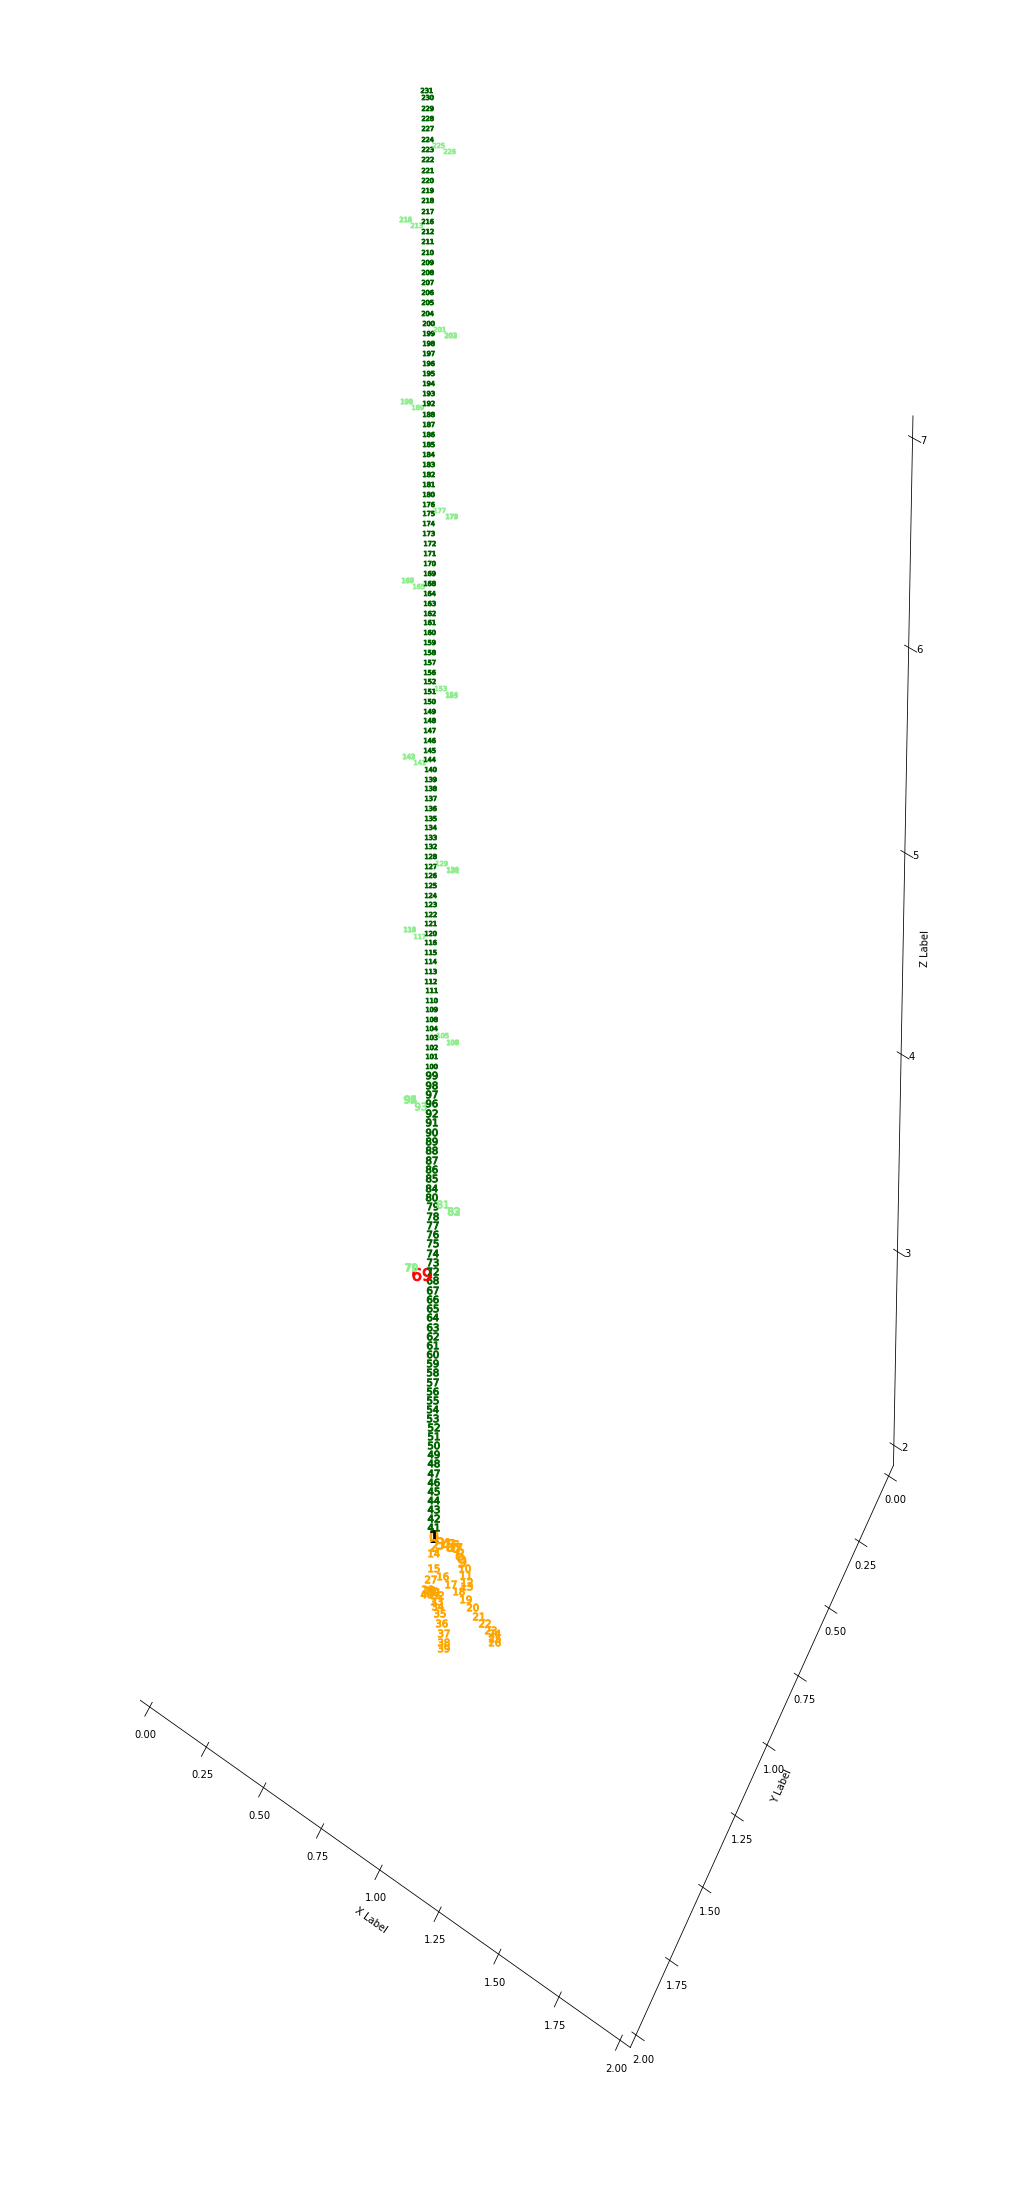

In [23]:
def organ_color(int):
    if int in leaf_nodes: #int is source 
        return 'lightgreen'
    elif int in root_nodes: #int is sink
        return 'orange'
    elif int in stem_nodes:
        return 'darkgreen'
    else:
        return 'black'
    
nodes_cor = np.column_stack([nodes_organtype, nodes])

plt.rcParams['figure.figsize'] = [18, 40]


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt





fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =nodes_cor[:,3]
y =nodes_cor[:,4]
z =nodes_cor[:,5]

# Get rid of colored axes planes
# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

# Bonus: To get rid of the grid as well:
ax.grid(False)

for i in range(len(nodes_cor)):
    if i == 69:
        ax.plot([x[i]], [y[i]], [z[i]], marker='${}$'.format(i),
                markersize=20, color='red')
    else:
        ax.plot([x[i]], [y[i]], [z[i]], marker='${}$'.format(i),
                markersize=12, color=organ_color(i))

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_xlim3d(0, 2)
ax.set_ylim3d(2,0)
ax.set_zlim3d(2,7)
plt.show()
fig.savefig("{}.pdf".format('3d with node number'), bbox_inches='tight')

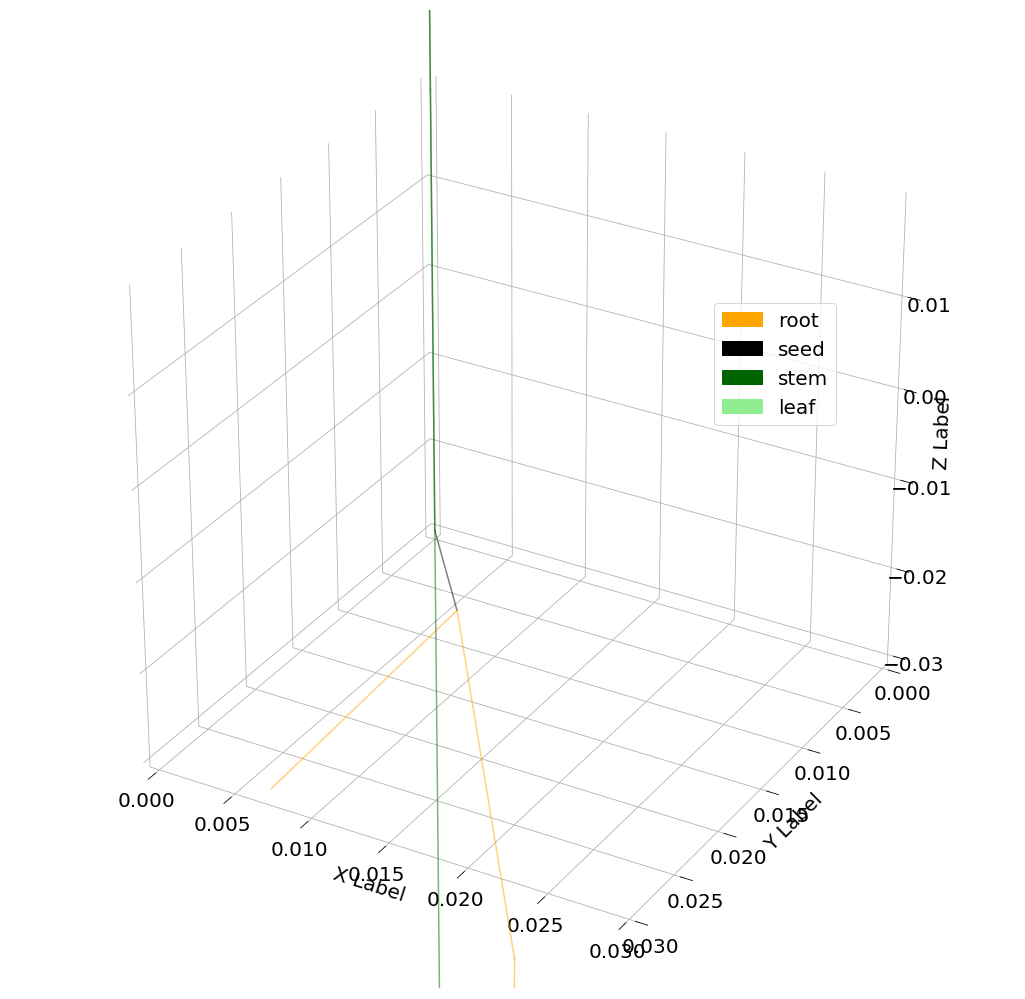

In [38]:
plt.rcParams['figure.figsize'] = [18, 18]

import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

stem_nodes = nodes_organtype[(nodes_organtype[:,1]== 4)][:,0] 
root_nodes = nodes_organtype[(nodes_organtype[:,1]== 2)][:,0] 
leaf_nodes = nodes_organtype[(nodes_organtype[:,1]== 8)][:,0] 
#(nodes_organtype[:,1]== 8)|
#print(stem_nodes)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =nodes[:,0]
y =nodes[:,1]
z =nodes[:,2]
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# Get rid of the spines
ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

# Now set color to white (or whatever is "invisible")
#ax.xaxis.pane.set_edgecolor('w')
#ax.yaxis.pane.set_edgecolor('w')
#ax.zaxis.pane.set_edgecolor('w')

#ax.set_xticks([]) 
#ax.set_yticks([]) 
#ax.set_zticks([])

# Bonus: To get rid of the grid as well:
#ax.grid(False)
#for i in range(len(nodes_cor)):
#    ax.plot([x[i]], [y[i]], [z[i]], marker='${}$'.format(nodes_cor[i,1]),
#            markersize=12, color='black')


for i in range(len(node_connection)):
    #xline = [x[node_connection[:,0][i]]],[x[node_connection[:,1][i]]] )
    #yline = np.array([y[node_connection[:,0][i]]],[y[node_connection[:,1][i]]] )
    #zline = np.array([z[node_connection[:,0][i]]],[z[node_connection[:,1][i]]] )
    organ= ax.plot3D(np.array([[x[node_connection[:,0][i]]][0],[x[node_connection[:,1][i]]][0]]), np.array([[y[node_connection[:,0][i]]][0],[y[node_connection[:,1][i]]][0]]), np.array([[z[node_connection[:,0][i]]][0],[z[node_connection[:,1][i]]][0]]), color=organ_color(node_connection[i,0]), alpha=0.5)
#ax.scatter([x[715]], [y[715]], [z[715]], c='r', s=99)
#ax.scatter([x[860]], [y[860]], [z[860]], c='g', s=99)
#ax.scatter([x[627]], [y[627]], [z[627]], c='g', s=99)

#ax.dist = 5.0
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_xlim3d(0, 0.03)
ax.set_ylim3d(0.03 ,0)
ax.set_zlim3d(-0.03,0.02)

root_patch = mpatches.Patch(color='orange', label='root')
seed_patch = mpatches.Patch(color='black', label='seed')
stem_patch = mpatches.Patch(color='darkgreen', label='stem')
leaf_patch = mpatches.Patch(color='lightgreen', label='leaf')
plt.legend(handles=[root_patch, seed_patch,stem_patch,leaf_patch],bbox_to_anchor=(0.7, 0.7), loc=2, borderaxespad=0.)
plt.show()
fig.savefig("{}.pdf".format('organtype_structure'), bbox_inches='tight')

In [61]:
JS_ST_begin = (len(node_connection)+1)*31+1
JS_ST_end = JS_ST_begin +(len(node_connection))
output.iloc[100, JS_ST_begin:JS_ST_end]
def organ_color(int):
    if int in leaf_nodes: #int is source 
        return 'lightgreen'
    elif int in root_nodes: #int is sink
        return 'orange'
    elif int in stem_nodes:
        return 'darkgreen'
    else:
        return 'black'

NameError: name 'mlines' is not defined

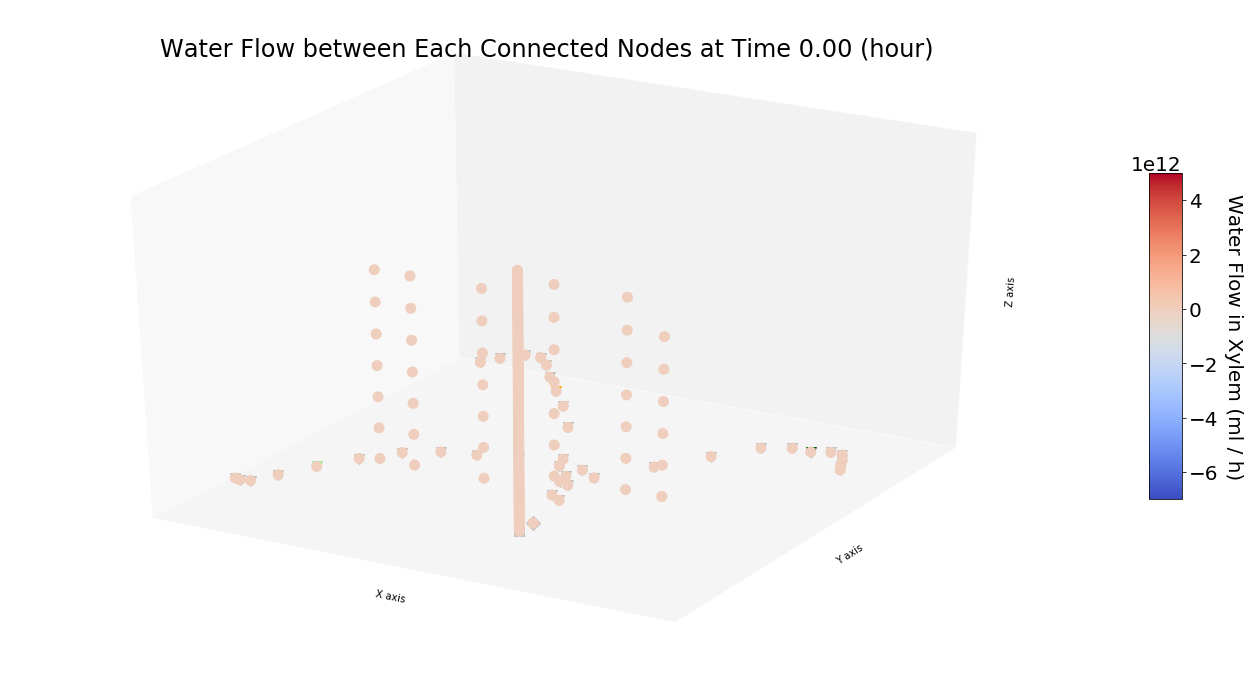

In [21]:

import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
nodes_cor = np.column_stack([nodes_organtype, nodes])

plt.rcParams['figure.figsize'] = [24, 12]
# path = 'PiafMunch2_python_test_mg_2018-12-21_10-46-36.673_output.txt'
path = 'mg_low1_2019-01-09_17-36-17.023_output.txt'
#pd.read_table(path,sep='\t')
output = pd.read_table(path,sep='\t',header=1)
JS_ST_begin = (len(node_connection)+1)*31+1
JS_ST_end = JS_ST_begin +(len(node_connection))
output.iloc[100, JS_ST_begin:JS_ST_end]

#JS_ST_1_out=output.iloc[2, JS_ST_begin:JS_ST_end]
#JS_ST_1_out_array = JS_ST_1_out.values
def organ_marker(int):
    if int in leaf_nodes:
    #if int == 21: #int is source 
        return 'o'
    elif int in root_nodes : #int is sink
        return 'v'
    elif int == 1 : #int is sink
        return 'D'
    #elif int == 40 :
    elif int in stem_nodes:
        return 's'
    else:
        return 'None'

cor_x =nodes_c_cor[:,0]
cor_y =nodes_c_cor[:,1]
cor_z =nodes_c_cor[:,2]
cor_m = nodes_c_marker[:,0]
    
def organ_color3(int):
    if int == 34: #int is source 
        return 'lightgreen'
    elif int == 10: #int is source 
        return 'orange'
    elif int == 22:
        return 'darkgreen'
    else:
        return 'silver'

for i in range(0,100):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')


    # Get rid of colored axes planes
    # First remove fill
    #ax.set_axis_off()
    # Get rid of the panes
    #ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    #ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    #ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

    # Get rid of the spines
    ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

    # Now set color to white (or whatever is "invisible")
    ax.xaxis.pane.set_edgecolor('w')
    ax.yaxis.pane.set_edgecolor('w')
    ax.zaxis.pane.set_edgecolor('w')


    ax.set_xticks([]) 
    ax.set_yticks([]) 
    ax.set_zticks([])

    # Bonus: To get rid of the grid as well:
    ax.grid(False)
    for j in range(41):
        ax.scatter(cor_x[j], cor_y[j],cor_z[j], s=100, marker = organ_marker(node_connection[j,0]) ,edgecolors= organ_color3(j),
                   c=output.iloc[i, JS_ST_begin+j:JS_ST_begin+j+1] , cmap=cm.coolwarm,  
                   alpha=1, vmin=-7e12, vmax=5e12)
        
    connectionflow = ax.scatter(cor_x, cor_y, cor_z, s=100 , c=output.iloc[i, JS_ST_begin:JS_ST_end] , cmap=cm.coolwarm, alpha=1, vmin=-7e12, vmax=5e12) #vmin = 0, vmax =0.0005

    
    
    plt.rcParams.update({'font.size': 20})

    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    #ax.set_xlim3d(0, 0.03)
    #ax.set_ylim3d(0.03 ,0)
    #ax.set_zlim3d(-0.03,0.02)
    #plt.title('Carbon Flow at Time {:.2f} (Hours)'.format(output.iloc[i, 0]))
    plt.title('Water Flow between Each Connected Nodes at Time {:.2f} (hour)'.format(output.iloc[i, 0]))

    #ax.elev = 89.9
    #ax.azim = 270.1
    #ax.dist = 8.0
    #ax.view_init(0, 90)

    cbar = fig.colorbar(connectionflow, shrink=0.5, aspect=10 )
    cbar.ax.get_yaxis().labelpad = 25
    #cbar.ax.set_ylabel('Carbon Flow in Sieve Tube (mmol / h)', rotation=270)
    cbar.ax.set_ylabel('Water Flow in Xylem (ml / h)', rotation=270)
    
    green_star1 = mlines.Line2D([], [],color='darkgreen', markerfacecolor='white', marker='s', linestyle='',
                          markersize=12, label='Connection between 24th and 23th node')
    orange_cross1 = mlines.Line2D([], [],color='orange', markerfacecolor='white', marker='v', linestyle='',
                              markersize=12, label='Connection between 19th and 20th node')
    lgreen_circle1 = mlines.Line2D([], [],color='lightgreen', markerfacecolor='white', marker='o', linestyle='',
                              markersize=12, label='Connection between 33th and 32th node')
    star1 = mlines.Line2D([], [], color='silver', marker='s', linestyle='',
                              markersize=10,markerfacecolor='white', label='Connection between nodes of CPlantBox Stem')
    cross1 = mlines.Line2D([], [], color='silver', marker='v', linestyle='',
                              markersize=10,markerfacecolor='white', label='Connection between nodes of CPlantBox Root')
    circle1 = mlines.Line2D([], [], color='silver', marker='o', linestyle='',
                              markersize=10, markerfacecolor='white',label='Connection between nodes of CPlantBox Leaf')




    plt.legend(handles=[green_star1,orange_cross1, lgreen_circle1, star1, cross1, circle1],
               bbox_to_anchor=(0.42, 0.245), loc=2, borderaxespad=0. , fontsize = 12)

    
    filename='step{:02d}.png'.format(i)
    plt.savefig(filename, dpi=96)
    plt.show()

# Then use image magick (this is bash, not python)
#convert -delay 80 *.png animated_chart.gif



#fig.savefig("{}.pdf".format('JW_ST'), bbox_inches='tight')


#def animate(i):
#    connectionflow.set_c(output.iloc[i, JS_ST_begin:JS_ST_end])  # update the data
#    return connectionflow


# Init only required for blitting to give a clean slate.
#def init():
#    connectionflow.set_c(output.iloc[1, JS_ST_begin:JS_ST_end])
#    return connectionflow

#ani = animation.FuncAnimation(fig, animate, np.arange(1, 100), init_func=init,
#                              interval=25, blit=True)
#plt.show()

In [22]:
import matplotlib.lines as mlines
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
nodes_cor = np.column_stack([nodes_organtype, nodes])

nodes_c_cor = np.full((len(node_connection), 3),0.0)
#charar = np.chararray((3, 3))

for i in range(0,len(node_connection)):
    nodes_c_cor[i] = (nodes[node_connection[i,0]] + nodes[node_connection[i,1]])/2

nodes_c_marker = np.full((len(node_connection), 1),'k')
for i in range(0,len(node_connection)):
    nodes_c_marker[i]= organ_marker(node_connection[i][0])
nodes_c_marker[0][0]= 'D'
nodes_c_marker.astype(str, copy = True)


plt.rcParams['figure.figsize'] = [12, 12]
path = 'PiafMunch2_python_test_mg_output.txt'
#pd.read_table(path,sep='\t')
output = pd.read_table(path,sep='\t',header=1)
JS_ST_begin = (len(node_connection))*34-7
JS_ST_end = JS_ST_begin +(len(node_connection))
output.iloc[100, JS_ST_begin:JS_ST_end]

#JS_ST_1_out=output.iloc[2, JS_ST_begin:JS_ST_end]
#JS_ST_1_out_array = JS_ST_1_out.values
def organ_marker(int):
    if int in leaf_nodes:
    #if int == 21: #int is source 
        return 'o'
    elif int in root_nodes : #int is sink
        return 'v'
    elif int == 1 : #int is sink
        return 'D'
    #elif int == 40 :
    elif int in stem_nodes:
        return 's'
    else:
        return 'None'

cor_x =nodes_c_cor[:,0]
cor_y =nodes_c_cor[:,1]
cor_z =nodes_c_cor[:,2]
cor_m = nodes_c_marker[:,0]
    
def organ_color3(int):
    if int == 34: #int is source 
        return 'lightgreen'
    elif int == 10: #int is source 
        return 'orange'
    elif int == 22:
        return 'darkgreen'
    else:
        return 'silver'

for i in range(0,100):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')


    # Get rid of colored axes planes
    # First remove fill
    #ax.set_axis_off()
    # Get rid of the panes
    #ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    #ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    #ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

    # Get rid of the spines
    ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

    # Now set color to white (or whatever is "invisible")
    ax.xaxis.pane.set_edgecolor('w')
    ax.yaxis.pane.set_edgecolor('w')
    ax.zaxis.pane.set_edgecolor('w')


    ax.set_xticks([]) 
    ax.set_yticks([]) 
    ax.set_zticks([])

    # Bonus: To get rid of the grid as well:
    ax.grid(False)
    for j in range(41):
        carbonflow = ax.scatter(cor_x[j], cor_y[j],cor_z[j], s=100, marker = organ_marker(node_connection[j,0]) ,edgecolors= organ_color3(j),
                   c=output.iloc[i, JS_ST_begin+j:JS_ST_begin+j+1] , cmap=cm.coolwarm,  
                   alpha=1, vmin=0, vmax=0.0005)
        
    #connectionflow = ax.scatter(cor_x, cor_y, cor_z, s=100 , c=output.iloc[i, JS_ST_begin:JS_ST_end] , cmap=cm.coolwarm, alpha=1, vmin=-7e12, vmax=5e12) #vmin = 0, vmax =0.0005

    
    
    plt.rcParams.update({'font.size': 20})

    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_xlim3d(0, 0.03)
    ax.set_ylim3d(0.03 ,0)
    ax.set_zlim3d(-0.03,0.02)
    #plt.title('Carbon Flow at Time {:.2f} (Hours)'.format(output.iloc[i, 0]))
    plt.title('Carbon Flow between Each Connected Nodes at Time {:.2f}'.format(output.iloc[i, 0]))

    #ax.elev = 89.9
    #ax.azim = 270.1
    #ax.dist = 8.0
    #ax.view_init(0, 90)
    green_star1 = mlines.Line2D([], [],color='darkgreen', markerfacecolor='white', marker='s', linestyle='',
                          markersize=12, label='Connection between 24th and 23th node')
    orange_cross1 = mlines.Line2D([], [],color='orange', markerfacecolor='white', marker='v', linestyle='',
                              markersize=12, label='Connection between 19th and 20th node')
    lgreen_circle1 = mlines.Line2D([], [],color='lightgreen', markerfacecolor='white', marker='o', linestyle='',
                              markersize=12, label='Connection between 33th and 32th node')
    star1 = mlines.Line2D([], [], color='silver', marker='s', linestyle='',
                              markersize=10,markerfacecolor='white', label='Connection between nodes of CPlantBox Stem')
    cross1 = mlines.Line2D([], [], color='silver', marker='v', linestyle='',
                              markersize=10,markerfacecolor='white', label='Connection between nodes of CPlantBox Root')
    circle1 = mlines.Line2D([], [], color='silver', marker='o', linestyle='',
                              markersize=10, markerfacecolor='white',label='Connection between nodes of CPlantBox Leaf')




    plt.legend(handles=[green_star1,orange_cross1, lgreen_circle1, star1, cross1, circle1],
               bbox_to_anchor=(0.42, 0.245), loc=2, borderaxespad=0., fontsize= 12)

    cbar = fig.colorbar(carbonflow, shrink=0.5, aspect=10 )
    cbar.ax.get_yaxis().labelpad = 25
    #cbar.ax.set_ylabel('Carbon Flow in Sieve Tube (mmol / h)', rotation=270)
    cbar.ax.set_ylabel('Carbon Flow in Sieve-tubes (mmol / h)', rotation=270)
    
    filename='step{:02d}.png'.format(i)
    plt.savefig(filename, dpi=96)
    plt.show()

# Then use image magick (this is bash, not python)
#convert -delay 80 *.png animated_chart.gif



#fig.savefig("{}.pdf".format('JW_ST'), bbox_inches='tight')


#def animate(i):
#    connectionflow.set_c(output.iloc[i, JS_ST_begin:JS_ST_end])  # update the data
#    return connectionflow


# Init only required for blitting to give a clean slate.
#def init():
#    connectionflow.set_c(output.iloc[1, JS_ST_begin:JS_ST_end])
#    return connectionflow

#ani = animation.FuncAnimation(fig, animate, np.arange(1, 100), init_func=init,
#                              interval=25, blit=True)
#plt.show()

IndexError: single positional indexer is out-of-bounds

In [81]:
import ipyvolume as ipv
import numpy as np
u = np.empty_like(x)
v = np.empty_like(x)
w = np.empty_like(x)

node_connection[:,[0]]
node_connection[:,[1]]
for i in range(len(node_connection)):
    x[i] =   nodes[node_connection[:,[0]]][i][0][0]
    y[i] =   nodes[node_connection[:,[0]]][i][0][1]
    z[i] =   nodes[node_connection[:,[0]]][i][0][2]
    u[i] =   nodes[node_connection[:,[1]]][i][0][0]
    v[i] =   nodes[node_connection[:,[1]]][i][0][1]
    w[i] =   nodes[node_connection[:,[1]]][i][0][2]
#selected = np.random.randint(0, 1000, 100)v
ipv.figure()
quiver = ipv.quiver(x, y, z, u, v, w)

from ipywidgets import FloatSlider, ColorPicker, VBox, jslink
size = FloatSlider(min=0, max=30, step=0.1)
#size_selected = FloatSlider(min=0, max=30, step=0.1)
color = ColorPicker()
color_selected = ColorPicker()
jslink((quiver, 'size'), (size, 'value'))
#jslink((quiver, 'size_selected'), (size_selected, 'value'))
jslink((quiver, 'color'), (color, 'value'))
#jslink((quiver, 'color_selected'), (color_selected, 'value'))
VBox([ipv.gcc(), size,  color])

ModuleNotFoundError: No module named 'ipyvolume'

In [65]:
! /mnt/c/prog_sct.bas/programs/C++/PIAFMunch2/projects/PIAFMunch2.exe 

^C


In [35]:
import pandas as pd
from labellines import labelLine, labelLines
# path = 'PiafMunch2_python_test_mg_2019-01-02_15-21-29.234_output.txt'
path = 'mg_low1_0_output.txt'
#pd.read_table(path,sep='\t')
output = pd.read_table(path,sep='\t',header=1)
### C_ST
time = np.array(output.iloc[:, 0])
n_begin = (len(node_connection)+1)*3+1
n_end = n_begin +(len(node_connection))
#print(output.iloc[2, n_begin:n_end])

var_leaf = np.array(output.iloc[:,n_begin + N1L_node[:,0]])
var_root = np.array(output.iloc[:,n_begin + N1R_node[:,0]])
var_n2 = np.array(output.iloc[:,n_begin+ N2_node[:,0]])
var_n3 = np.array(output.iloc[:,n_begin + N3_node[:,0]])
var_all = np.array(output.iloc[:,n_begin:n_end])

#limited_time = np.array(output.iloc[:, 0])

output.columns[n_begin]
limited_time = time[0:40]
limited_time
limited_var_all =var_all[0:40]
limited_var_all

array([[ 0.00000e+00,  0.00000e+00,  0.00000e+00, ...,  0.00000e+00,
         0.00000e+00,  0.00000e+00],
       [ 4.51345e-16,  4.37483e-18,  2.22776e-18, ...,  7.40019e-03,
         3.32374e-02,  7.87159e-02],
       [-4.76292e-17,  4.58413e-18,  2.22815e-18, ...,  7.81650e-02,
         1.06836e-01,  1.35786e-01],
       ...,
       [ 4.65350e-01,  4.48291e-01,  4.41254e-01, ...,  1.66492e+00,
         1.66890e+00,  1.67335e+00],
       [ 4.90852e-01,  4.73822e-01,  4.67056e-01, ...,  1.72865e+00,
         1.73283e+00,  1.73750e+00],
       [ 5.16528e-01,  4.99521e-01,  4.92995e-01, ...,  1.79422e+00,
         1.79863e+00,  1.80358e+00]])

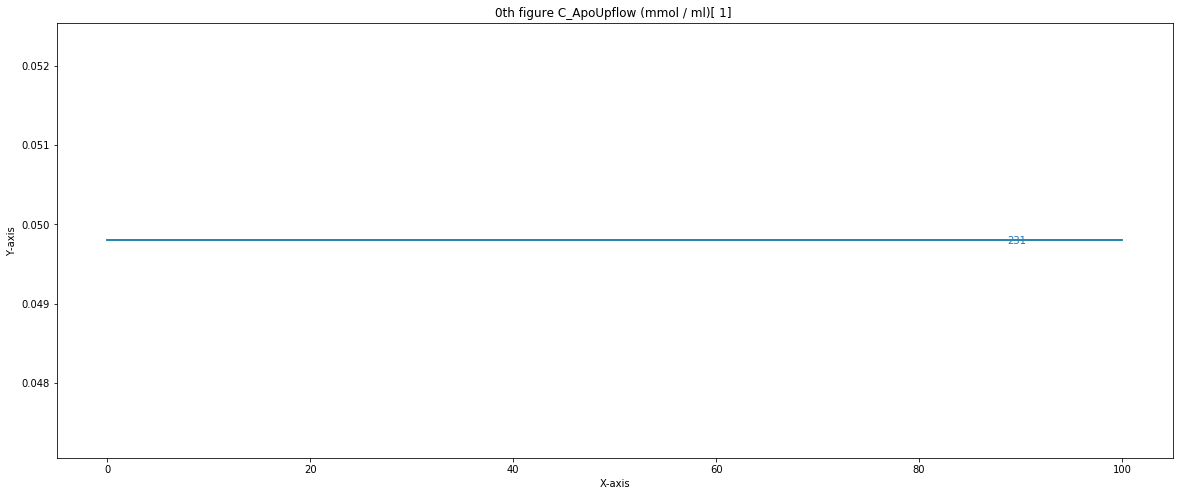

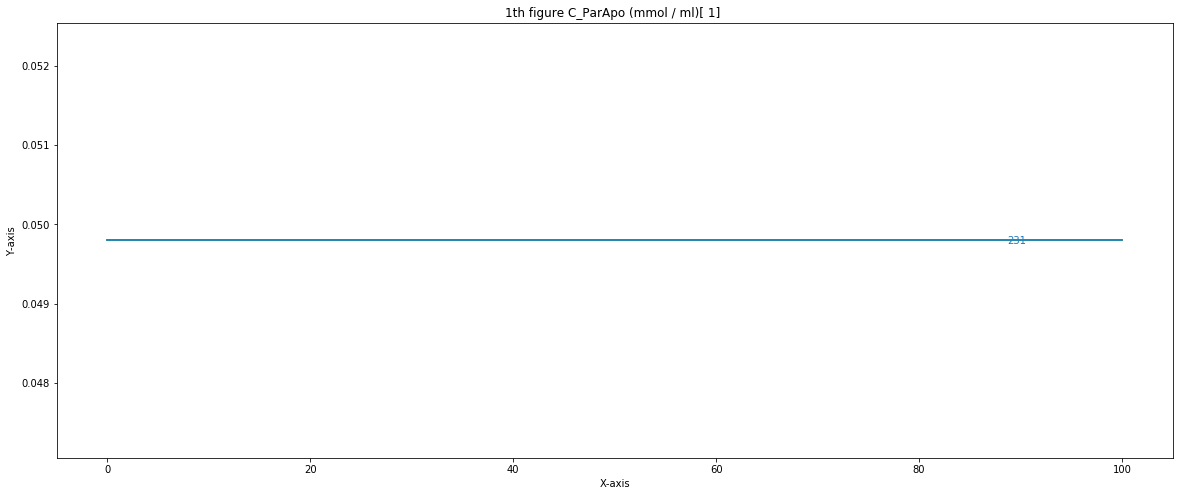

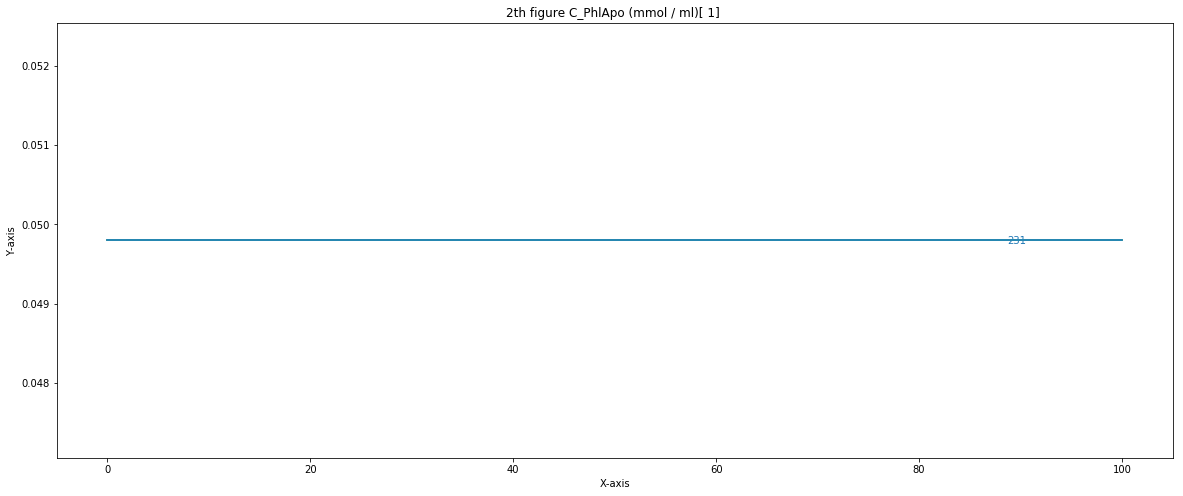

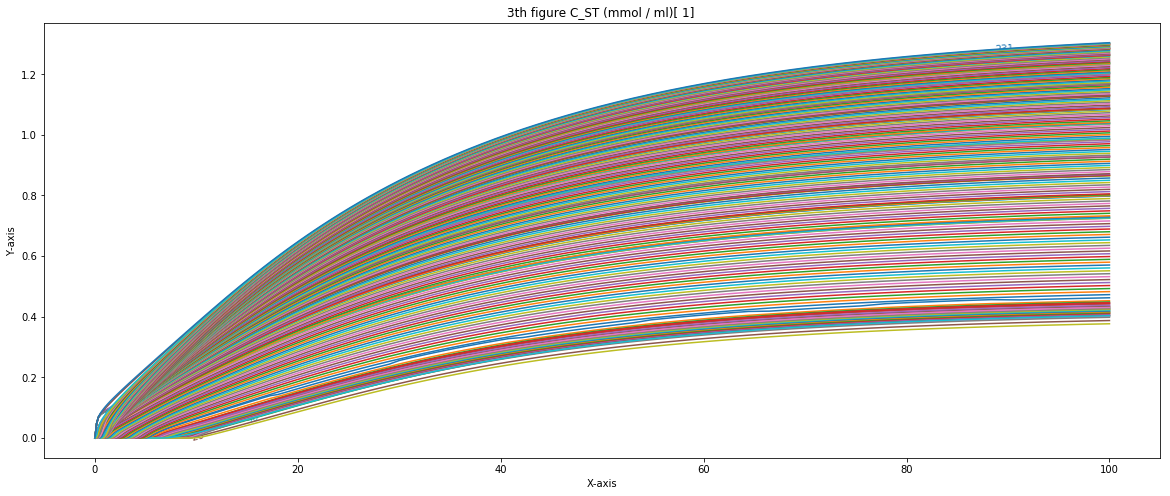

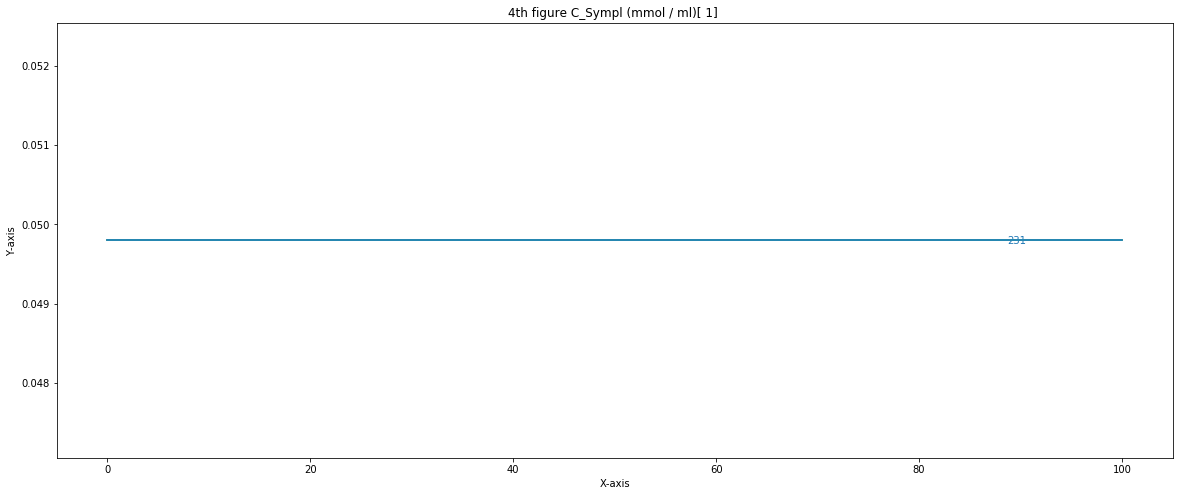

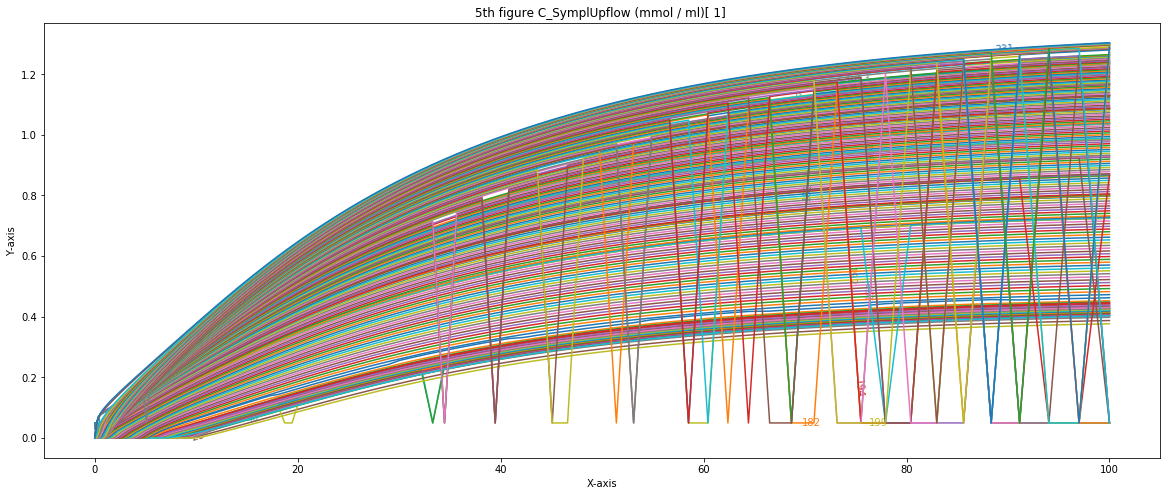

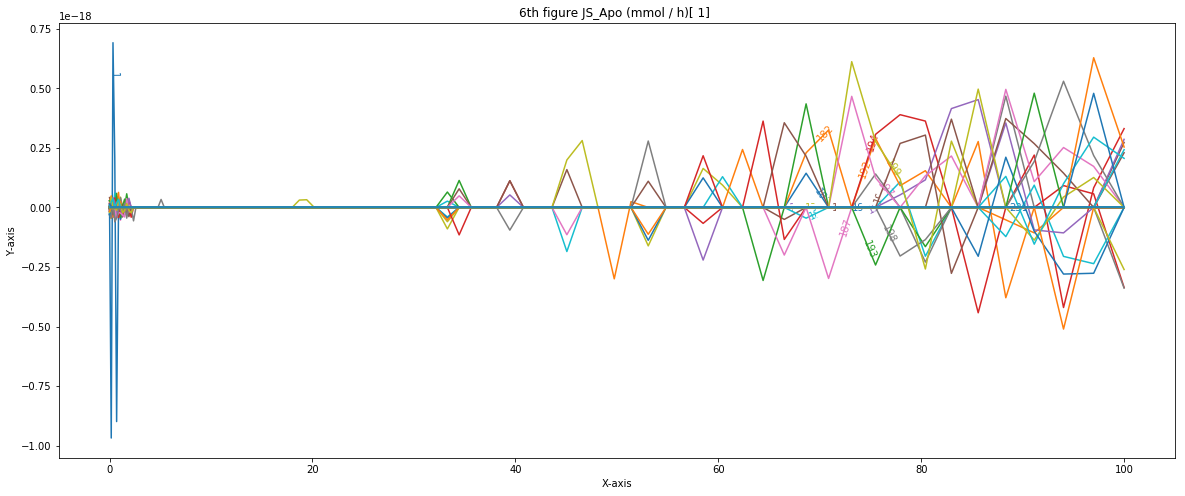

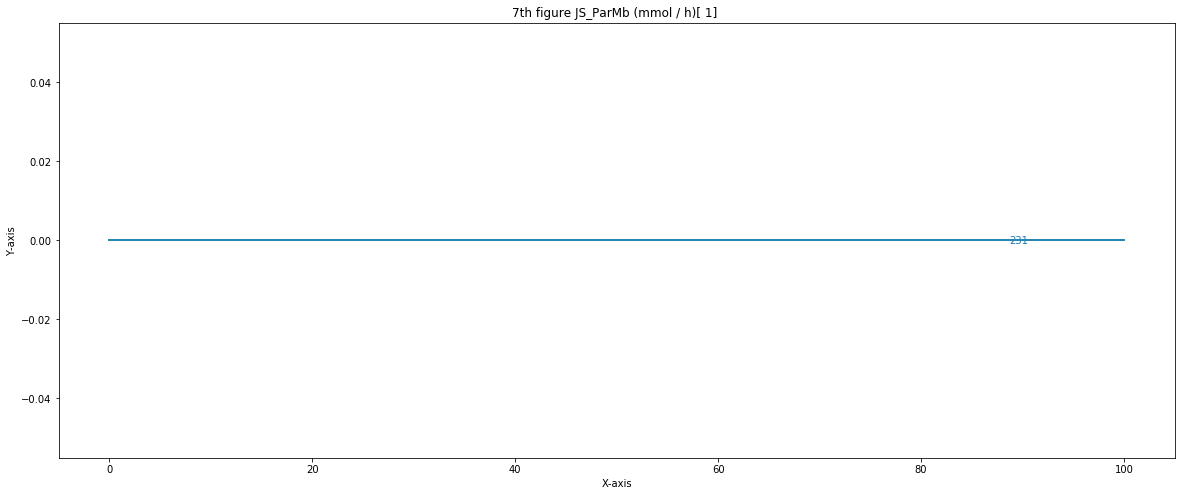

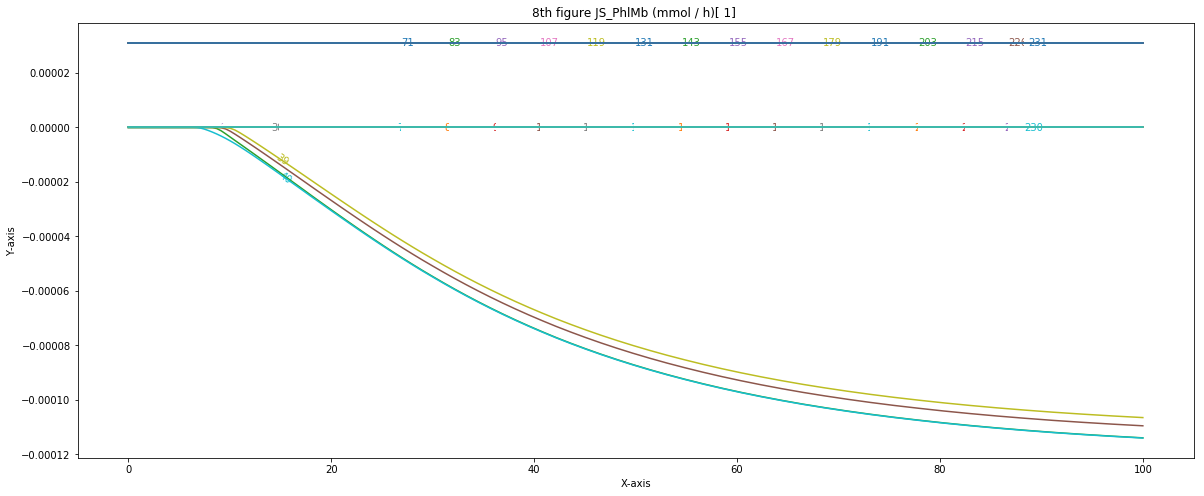

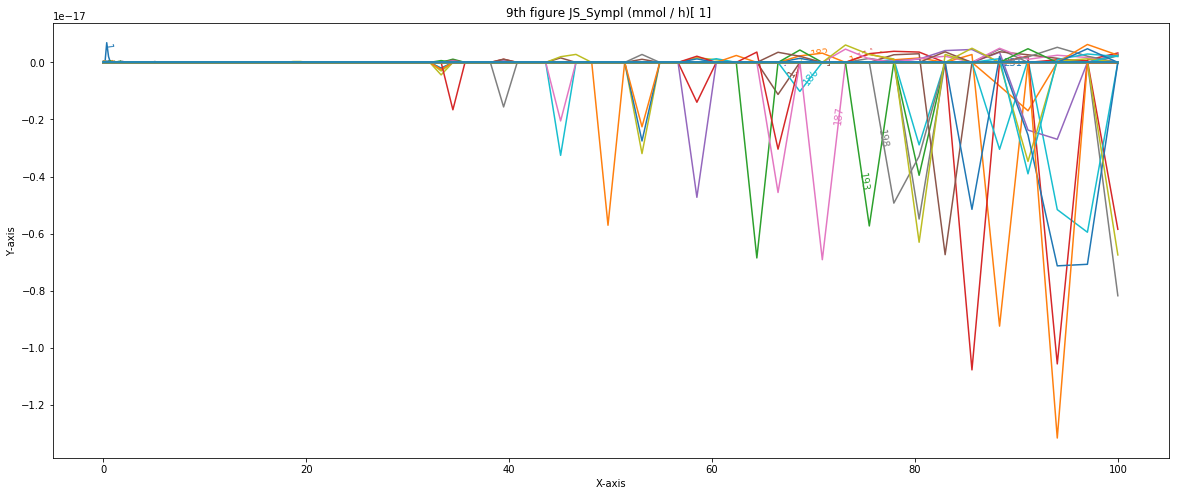

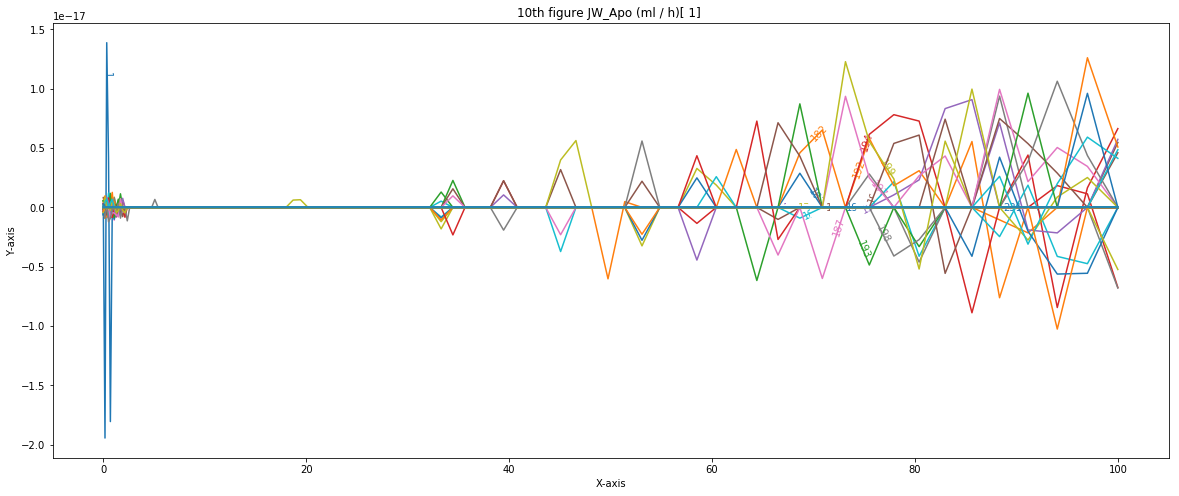

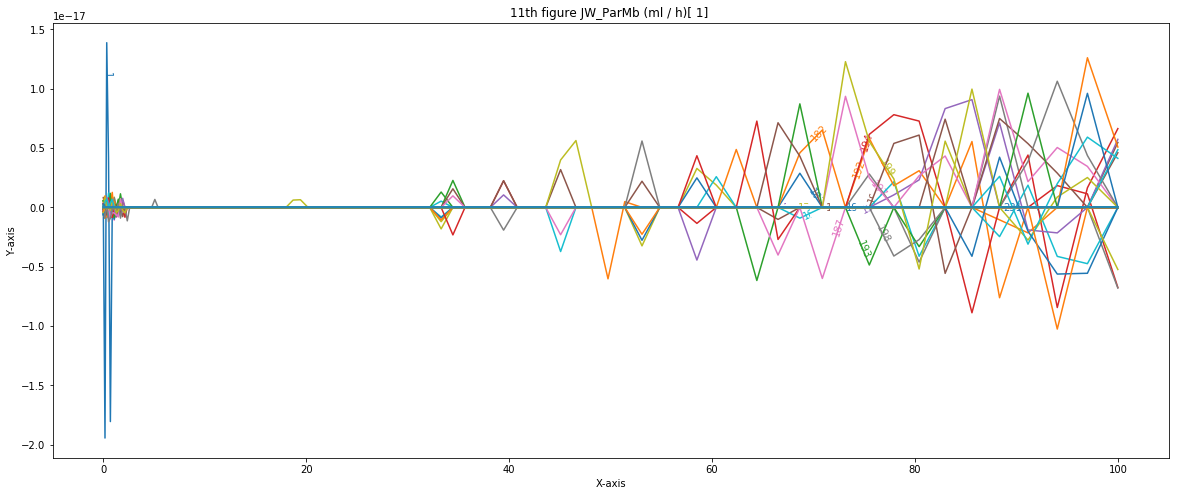

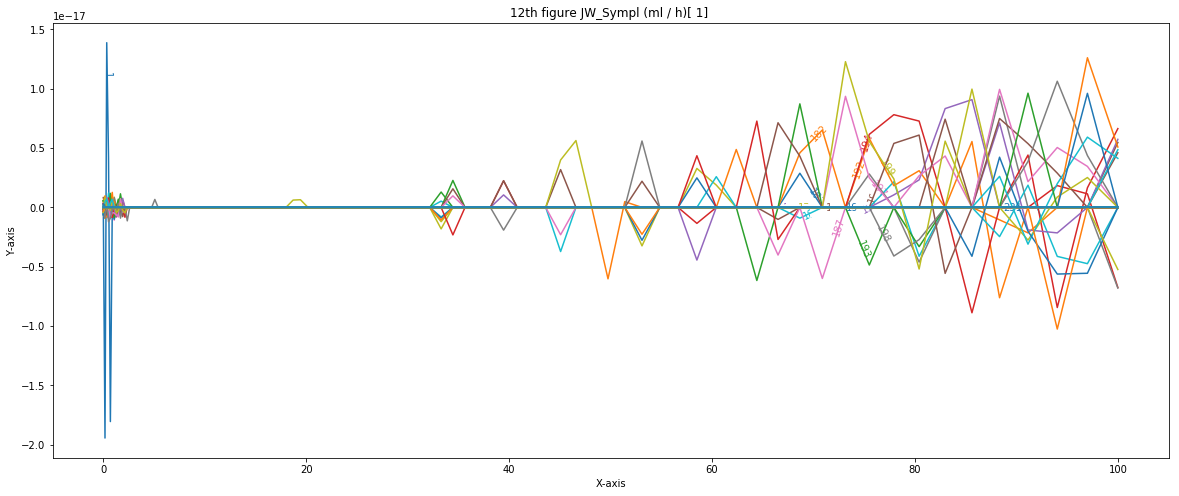

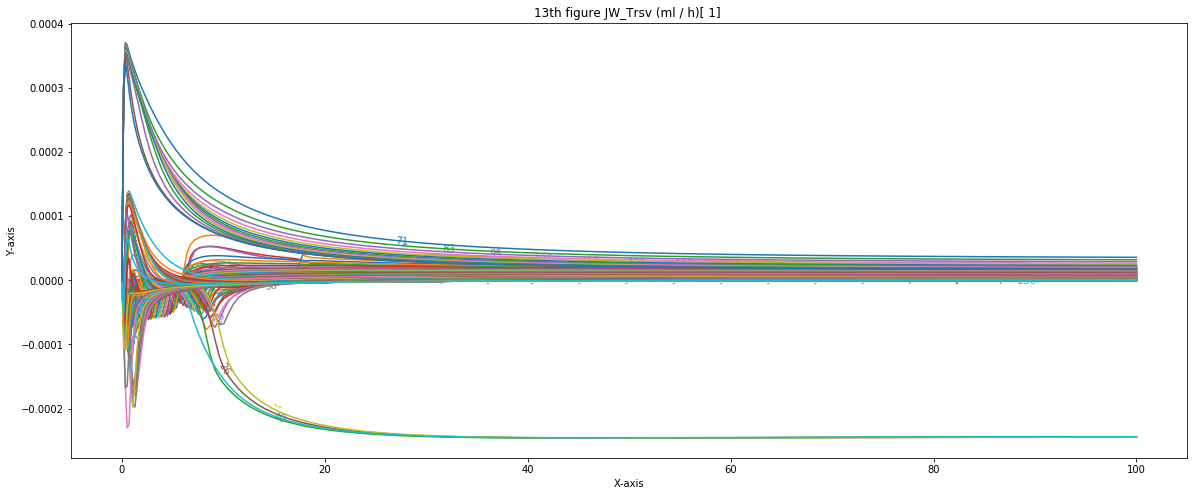

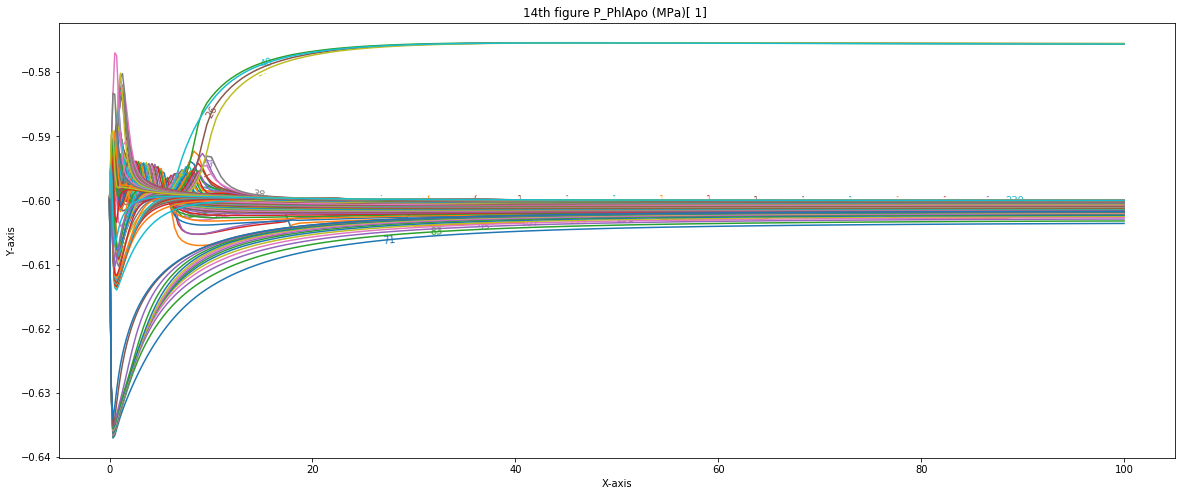

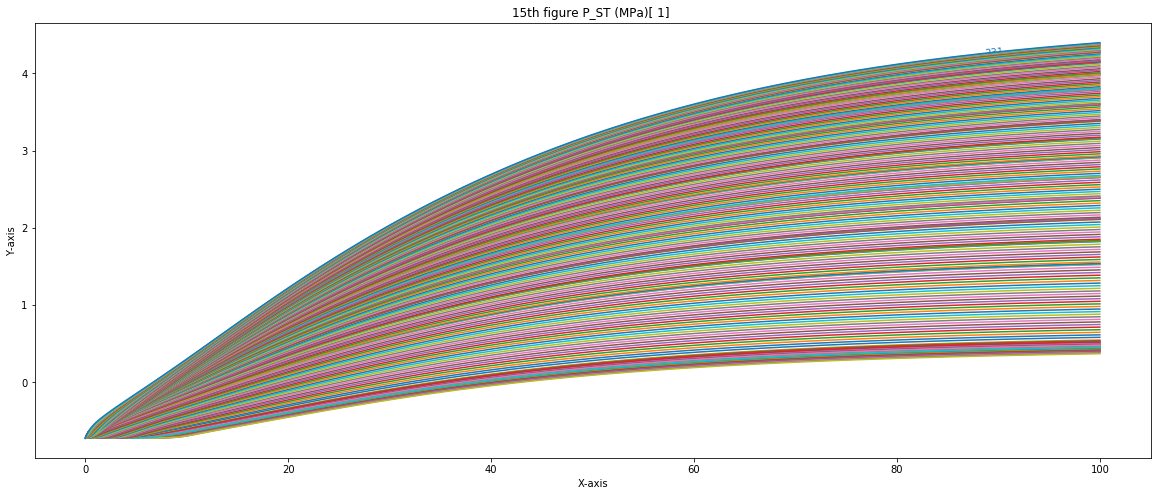

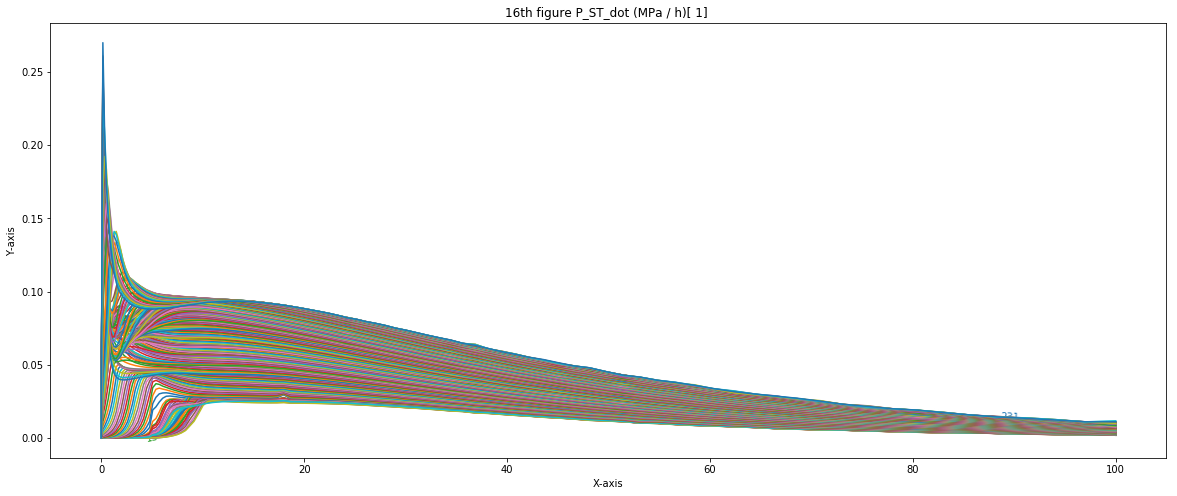

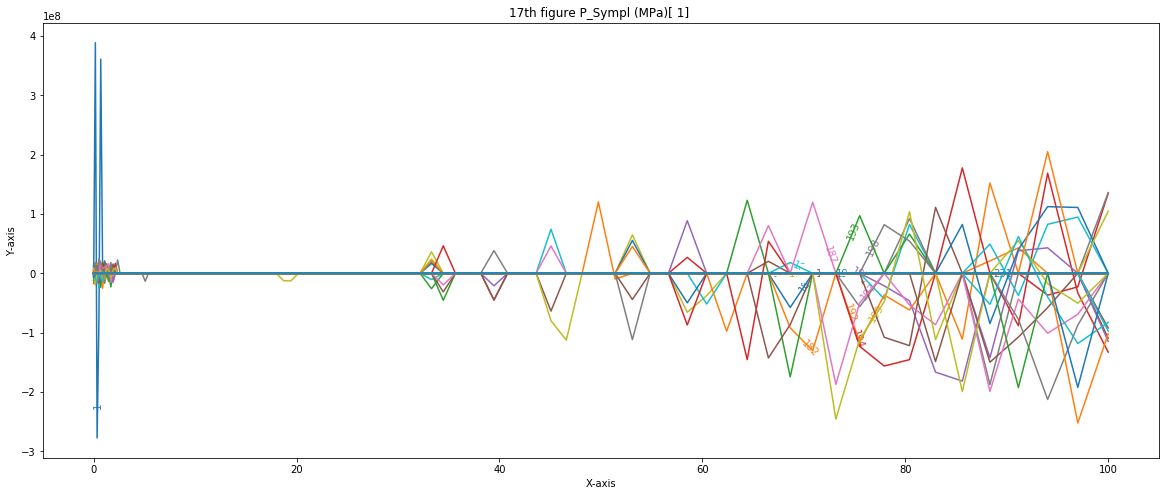

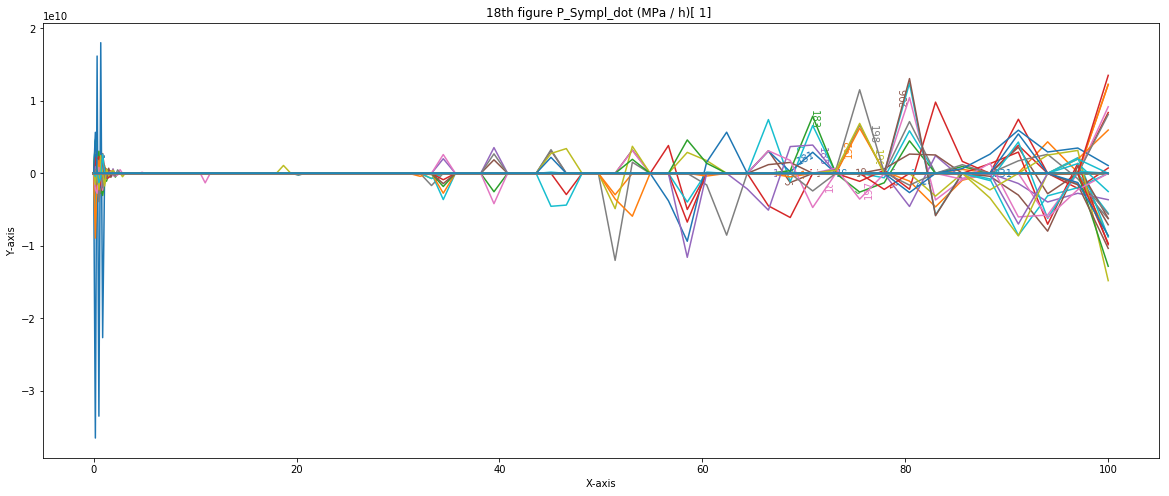

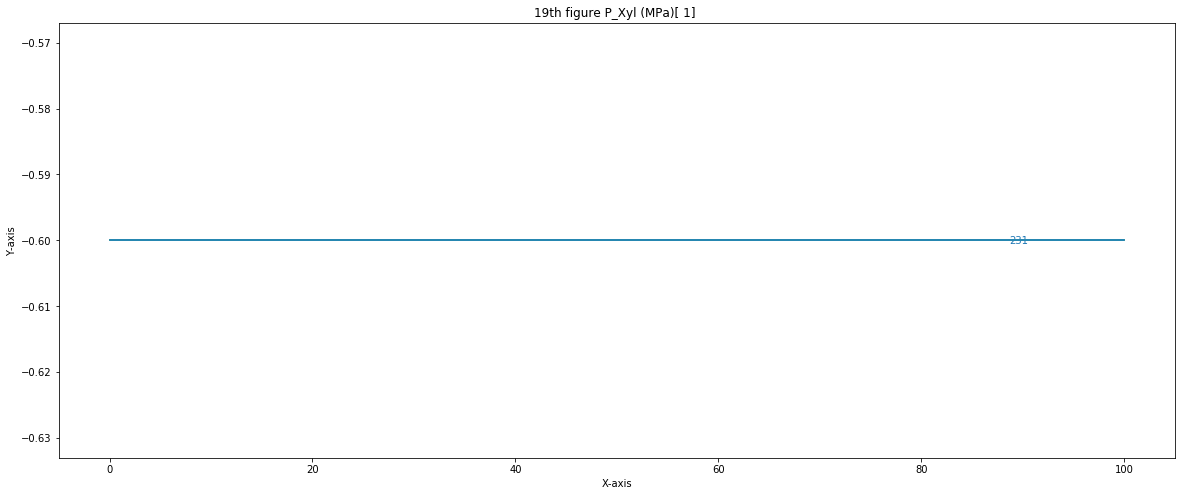

TypeError: unsupported operand type(s) for -: 'numpy.str_' and 'numpy.str_'

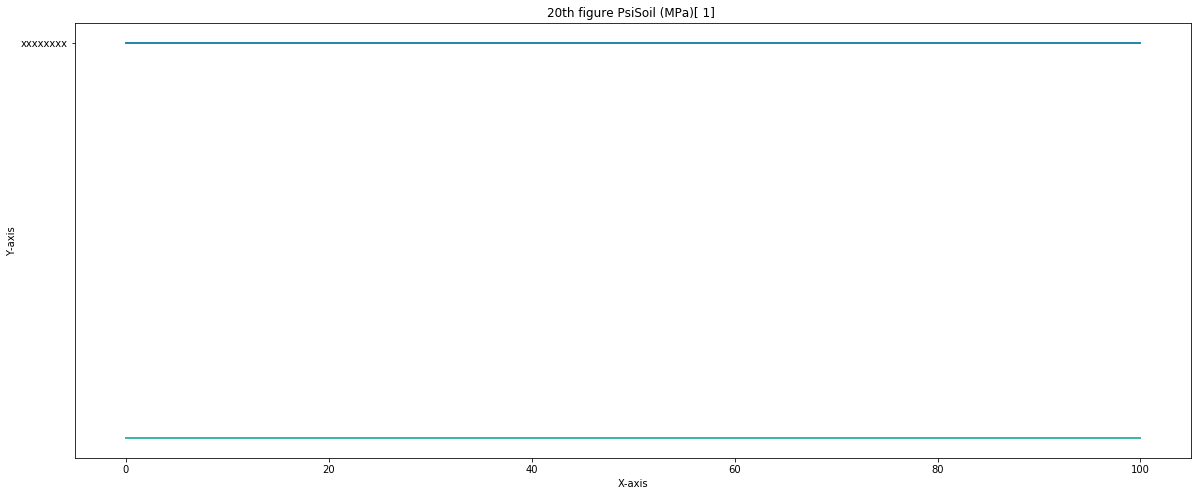

In [52]:



from scipy.stats import loglaplace,chi2
#from labellines import labelLine, labelLines
for i in range(0,37):
    f = plt.figure()
    n_begin = (len(node_connection)+1)*i+1
    n_end = n_begin +(len(node_connection)+1)
    var_all = np.array(output.iloc[:,n_begin:n_end])
    time = np.array(output.iloc[:, 0])
    limited_time = time[0:40]
    limited_time
    limited_var_all =var_all[0:40]
    x = np.array(time)
    y = np.array(var_all)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title("{}th figure {} ".format(i ,output.columns[n_begin]))
    
    for i in range(len(np.transpose(y))):
        plt.plot(x,[pt[i] for pt in y],label = '{0}'.format(nodes_organtype[i+1,0]))
    #plt.legend()
    labelLines(plt.gca().get_lines(), xvals=(0, 90), zorder=0)
    plt.show()
    s =output.columns[n_begin]
    s = s.replace('/', '')
    #f.savefig("{}.pdf".format(s), bbox_inches='tight')

In [20]:
plt.rcParams['figure.figsize'] = [20, 8]

for i in range(30,34):
    f = plt.figure()
    n_begin = (len(node_connection+1))*i+31 # careful here is the number of connections but bot nodes
    n_end = n_begin +(len(node_connection)-1)
    var_all = np.array(output.iloc[:,n_begin:n_end])
    time = np.array(output.iloc[:, 0])
    limited_time = time[0:30]
    limited_time
    limited_var_all =var_all[0:30]
    x = np.array(time)
    y = np.array(var_all)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title("{}th figure {} ".format(i ,output.columns[n_begin]))
    for i in range(len(np.transpose(y))):
        plt.plot(x,[pt[i] for pt in y],label = '{0}'.format(nodes_organtype[i+1,0]))
    #plt.legend()
    labelLines(plt.gca().get_lines(), xvals=(40,99), zorder=0)
    plt.show()
    s =output.columns[n_begin]
    s = s.replace('/', '')
    f.savefig("{}{}.pdf".format('2nd low photo pressure', s), bbox_inches='tight')

NameError: name 'output' is not defined

<Figure size 1440x576 with 0 Axes>

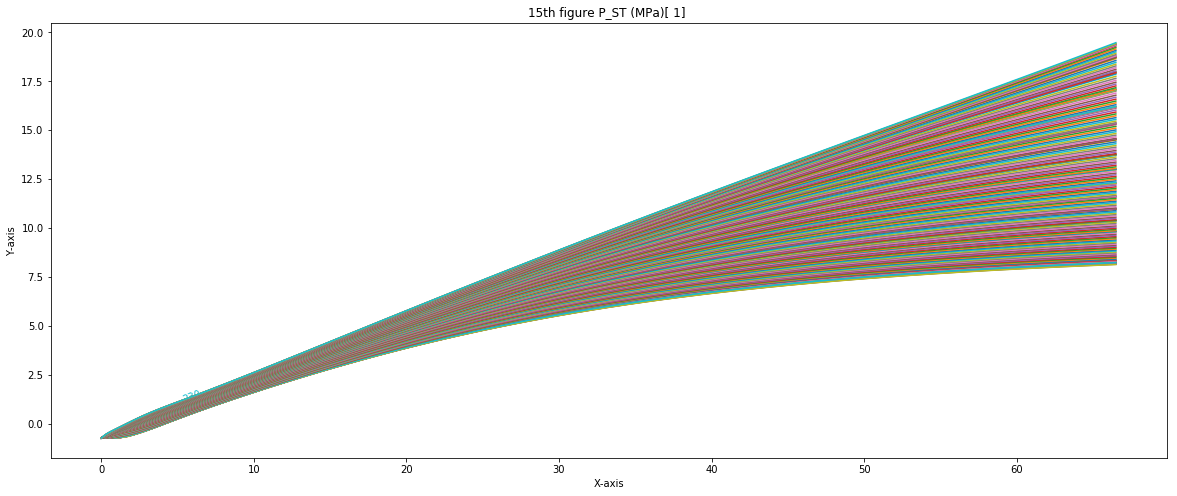

In [33]:
for i in range(15,16):
    f = plt.figure()
    n_begin = (len(node_connection)+1)*i+1 # careful here is the number of connections but bot nodes
    n_end = n_begin +(len(node_connection))
    var_all = np.array(output.iloc[:,n_begin:n_end])
    time = np.array(output.iloc[:, 0])
    limited_time = time[0:30]
    limited_time
    limited_var_all =var_all[0:30]
    x = np.array(time)
    y = np.array(var_all)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title("{}th figure {} ".format(i ,output.columns[n_begin]))
    for i in range(len(np.transpose(y))):
        plt.plot(x,[pt[i] for pt in y],label = '{0}'.format(nodes_organtype[i+1,0]))
    #plt.legend()
    labelLines(plt.gca().get_lines(), xvals=(0,6), zorder=0)
    plt.show()
    #f.savefig("{}.pdf".format('low_p_low'), bbox_inches='tight')

In [97]:
speed2volume = 123e-4 * 4.23e-2  *3600   #calculate from micro meter per second to ml/h
print(speed2volume)

number_of_se = 4.23/(3.1415926* 12.88**2* 1e-3* 1e-3)
speed2sevolume= speed2volume/number_of_se
print(number_of_se, speed2sevolume)

1.873044
8116.31279612458 0.00023077523587981366


In [96]:
123 * 3.1415926* 12.88 **2* 1e-4 *3600 * 1e-4* 1e-4  #calculate from micro meter per second to ml/h
#4.23/(3.1415926* 12.88**2* 1e-3* 1e-3)

all_volume =123 * 3.1415926* 12.88 **2* 1e-4 *3600 * 1e-4* 1e-4
se_volume = all_volume/number_of_se
print(all_volume,se_volume )

0.00023077523587981374 2.8433506898601236e-08


In [89]:
4.23/(3.1415926* 13**2* 1e-3* 1e-3)

0.0004*(4.23/(3.1415926* 13**2* 1e-3* 1e-3))*(5/225/1e-4)
0.0004*81*(5/225/1e-4)

0.0001 /1e-4/1e-4/1e-4/3600

# model output of flow volume is 0.005 ml/hour
# experiemtn flow speed is 123 micrometer per second

#for one single sieve tube, at 4 meters, length is 225 micro meter, se radius is 12.88
#so the corsection area is 
area1 = 12.88 **2 *3.1415926 *1e-4*1e-4
print(area1) #unit is cm2

area2= 4.23853452 /100 #total area
print(area2)

sim_volume = 0.005
volumne2speed1 = sim_volume /area1
volumne2speed2 = sim_volume /area2
print(volumne2speed1*1e4 /3600, volumne2speed2*1e4 /3600)
#123/volumne2speed
#5/225/1e-4
#print(5/259/1e-4)
#5/393/1e-4

#if it calculate only one sieve tube flow
volumne2speed1*1e4 /3600



5.211726194214401e-06
0.0423853452
2664.930652785848 0.32768139137130087


2664.930652785848

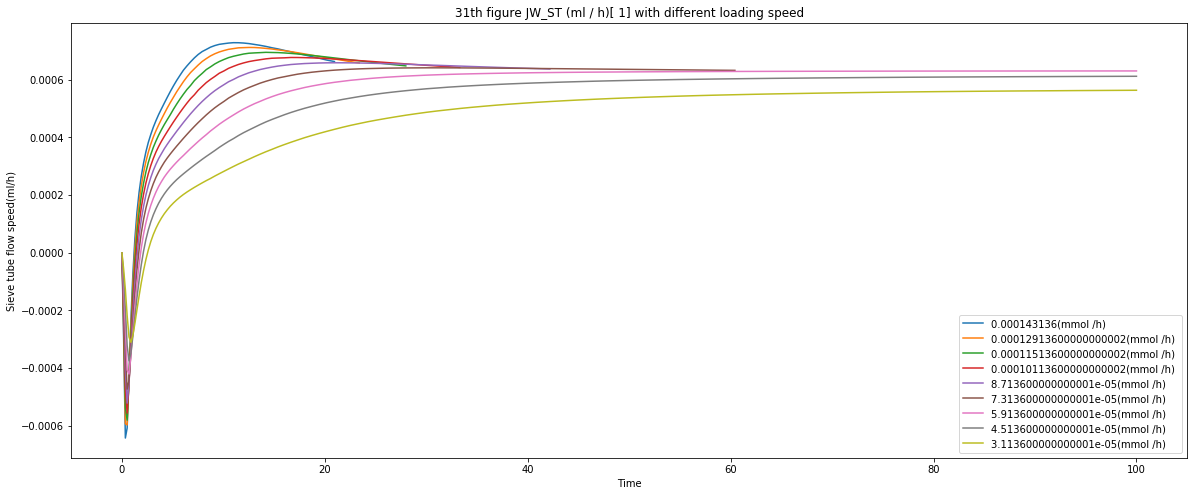

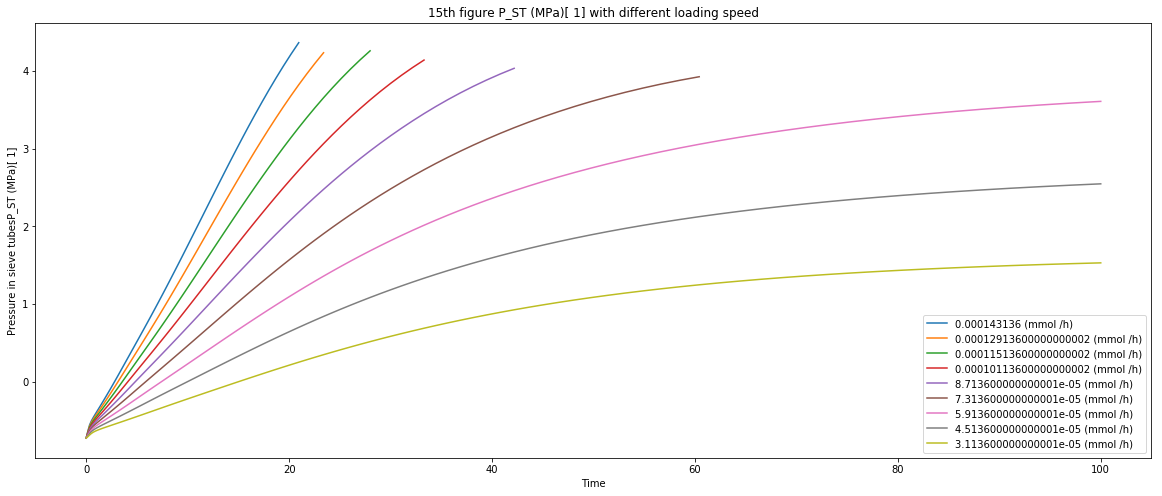

In [55]:
plt.rcParams['figure.figsize'] = [20, 8]
from scipy.stats import loglaplace,chi2
f = plt.figure()
    #from labellines import labelLine, labelLines
for j in range(0,9):
    
    path = 'mg_low1_{}_output.txt'.format(j)
    #pd.read_table(path,sep='\t')
    output = pd.read_table(path,sep='\t',header=1)
    ### C_ST
    time = np.array(output.iloc[:, 0])
    n_begin = (len(node_connection)+1)*3+1
    n_end = n_begin +(len(node_connection))
    #print(output.iloc[2, n_begin:n_end])

    var_leaf = np.array(output.iloc[:,n_begin + N1L_node[:,0]])
    var_root = np.array(output.iloc[:,n_begin + N1R_node[:,0]])
    var_n2 = np.array(output.iloc[:,n_begin+ N2_node[:,0]])
    var_n3 = np.array(output.iloc[:,n_begin + N3_node[:,0]])
    var_all = np.array(output.iloc[:,n_begin:n_end])
    for i in range(31,32):

        n_begin = (len(node_connection+1))*i+31 # careful here is the number of connections but bot nodes
        n_end = n_begin +(len(node_connection)-1)
        var_all = np.array(output.iloc[:,n_begin:n_end])
        time = np.array(output.iloc[:, 0])
        limited_time = time[0:40]
        limited_time
        limited_var_all =var_all[0:40]
        x = np.array(time)
        y = np.array(var_all)
        plt.xlabel("Time")
        plt.ylabel("Sieve tube flow speed(ml/h)")
        plt.title("{}th figure {} with different loading speed".format(i ,output.columns[n_begin]))

    #     for i in range(len(np.transpose(y))):
    #         plt.plot(x,[pt[i] for pt in y],label = '{0}'.format(nodes_organtype[i+1,0]))
    plt.plot(x,[pt[68:69] for pt in y],label = '{}(mmol /h) '.format(vML_x[j]))
plt.legend()
#     labelLines(plt.gca().get_lines(), xvals=(0, 5), zorder=0)
plt.show()
s =output.columns[n_begin]
s = s.replace('/', '')
    #f.savefig("{}.pdf".format(s), bbox_inches='tight')
    
f = plt.figure()
    #from labellines import labelLine, labelLines
for j in range(0,9):
    
    path = 'mg_low1_{}_output.txt'.format(j)
    #pd.read_table(path,sep='\t')
    output = pd.read_table(path,sep='\t',header=1)
    ### C_ST
    time = np.array(output.iloc[:, 0])
    n_begin = (len(node_connection)+1)*3+1
    n_end = n_begin +(len(node_connection))
    #print(output.iloc[2, n_begin:n_end])

    var_leaf = np.array(output.iloc[:,n_begin + N1L_node[:,0]])
    var_root = np.array(output.iloc[:,n_begin + N1R_node[:,0]])
    var_n2 = np.array(output.iloc[:,n_begin+ N2_node[:,0]])
    var_n3 = np.array(output.iloc[:,n_begin + N3_node[:,0]])
    var_all = np.array(output.iloc[:,n_begin:n_end])
    for i in range(15,16): #NO. of the output (15,16) is pressure

        n_begin = (len(node_connection+1))*i+16 # careful here is the number of connections but bot nodes
        n_end = n_begin +(len(node_connection)-1)
        var_all = np.array(output.iloc[:,n_begin:n_end])
        time = np.array(output.iloc[:, 0])
        limited_time = time[0:40]
        limited_time
        limited_var_all =var_all[0:40]
        x = np.array(time)
        y = np.array(var_all)
        plt.xlabel("Time")
        plt.ylabel("Pressure in sieve tubes{}".format(output.columns[n_begin]))
        plt.title("{}th figure {} with different loading speed".format(i ,output.columns[n_begin]))

    #     for i in range(len(np.transpose(y))):
    #         plt.plot(x,[pt[i] for pt in y],label = '{0}'.format(nodes_organtype[i+1,0]))
    plt.plot(x,[pt[68:69] for pt in y],label = '{} (mmol /h)'.format(vML_x[j]))
plt.legend()
#     labelLines(plt.gca().get_lines(), xvals=(0, 5), zorder=0)
plt.show()
s =output.columns[n_begin]
s = s.replace('/', '')
    #f.savefig("{}.pdf".format(s), bbox_inches='tight')

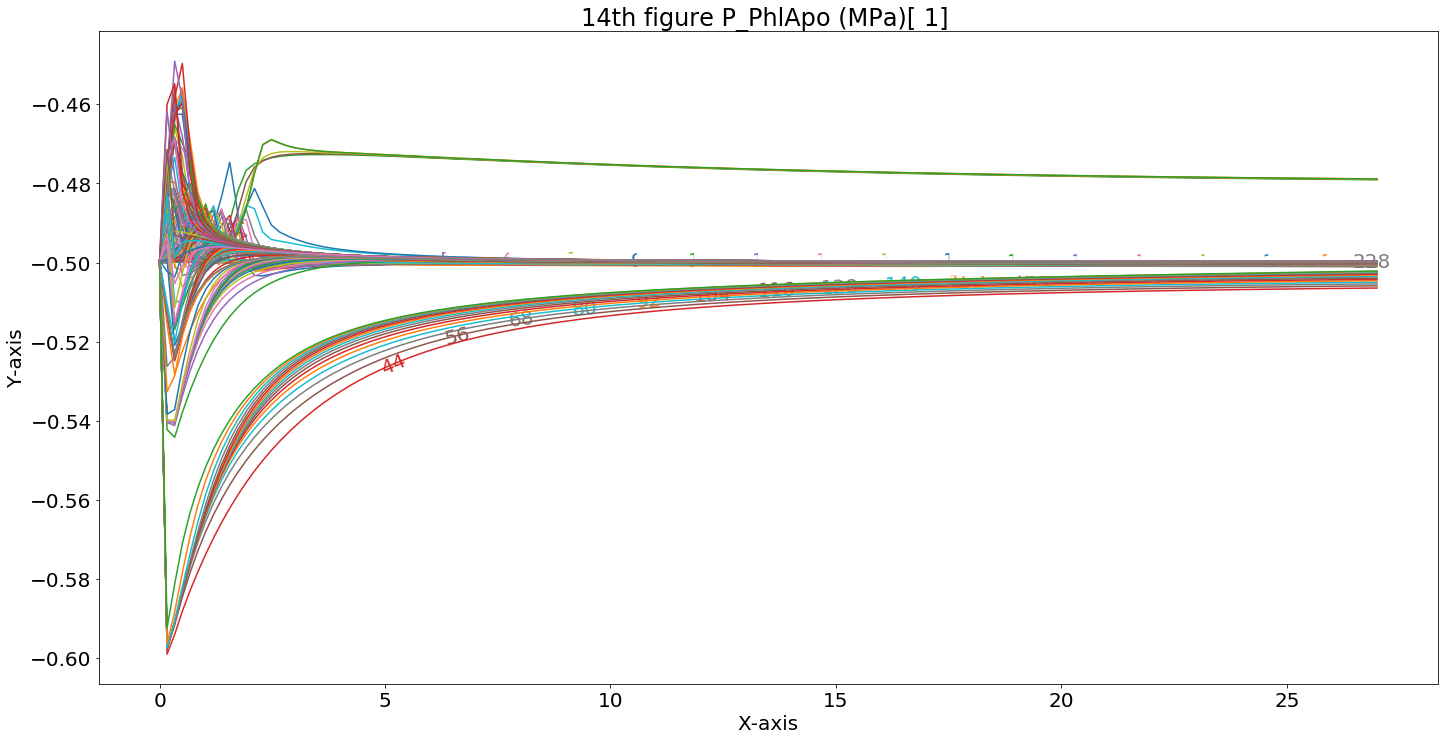

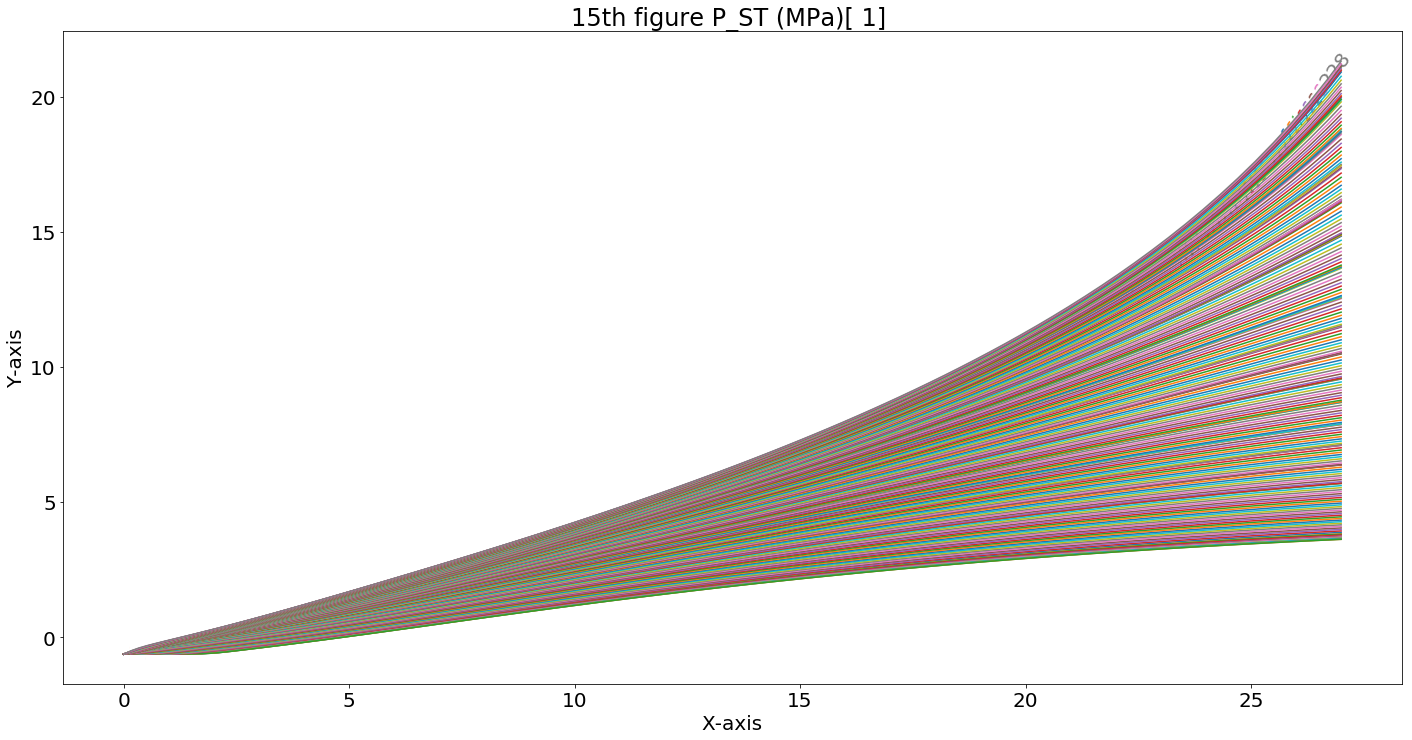

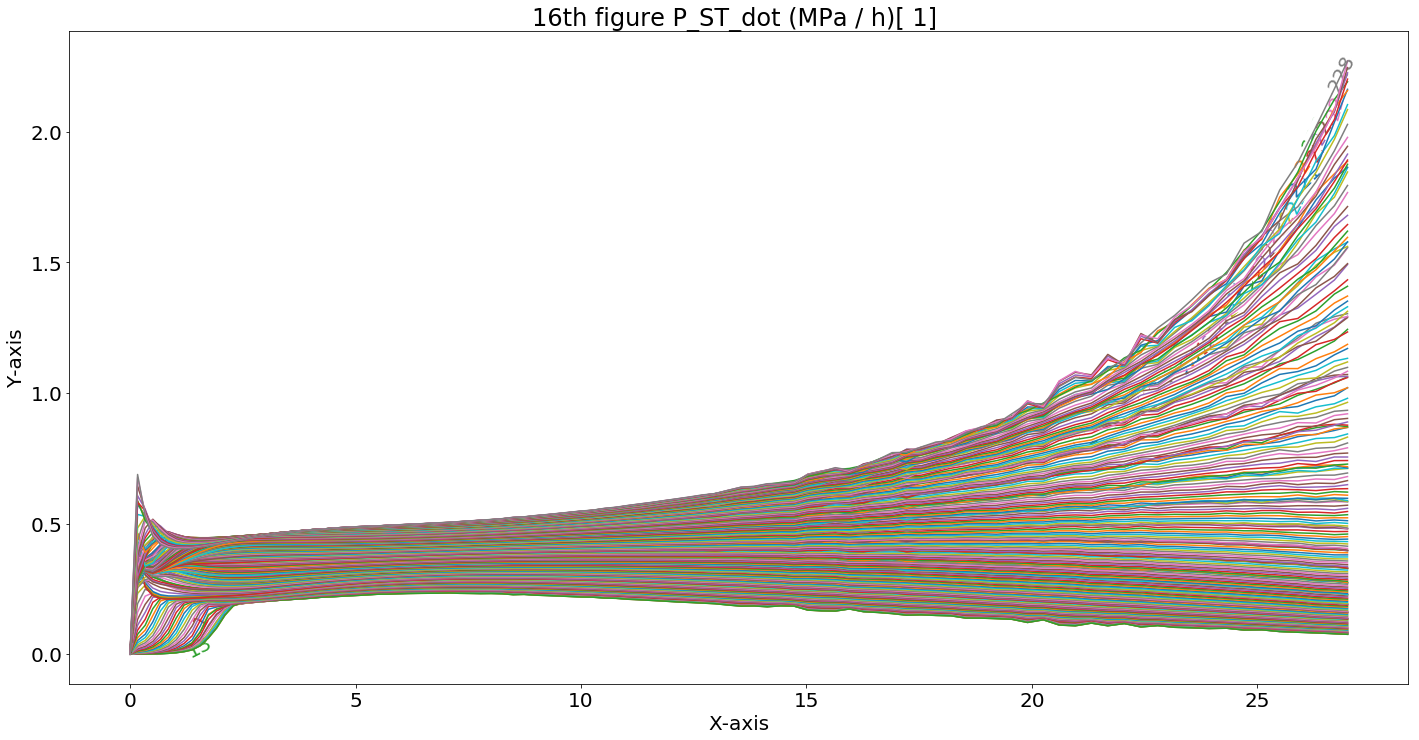

In [77]:

for i in range(14,17):
    n_begin = (len(node_connection)+1)*i+1
    n_end = n_begin +(len(node_connection))
    var_all = np.array(output.iloc[:,n_begin:n_end])
    x = np.array(time)
    y = np.array(var_all)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title("{}th figure {} ".format(i ,output.columns[n_begin]))
    for i in range(len(np.transpose(y))):
        plt.plot(x,[pt[i] for pt in y],label = '{0}'.format(nodes_organtype[i+1,0]))
    #plt.legend()
    labelLines(plt.gca().get_lines(), xvals=(0, 27), zorder=0)
    plt.show()

In [25]:
#ten different unloading speed
vMU_x = np.zeros(10)
vMU_x[0] =2.82627e+0
vML_x = np.zeros(10)
vML_x[0] =0.000143136
kMU_x = np.zeros(10)
kMU_x[0] =  1e+4
kML_x = np.zeros(10)
kML_x[0] = 1e-100

for i in range(1,2):
    vMU_x[i] = vMU_x[i-1] 
    vML_x[i] = vML_x[i-1] #*2
    kMU_x[i] = kMU_x[i-1] #* 2
    kML_x[i] = kML_x[i-1] #* 2
#vMU_x


#for i in range(1,10):
        
rst_x = np.zeros(10)
rst_x[0] =1
for i in range(1,10):
    rst_x[i] = rst_x[i-1] *10
rst_x   


# for i in range(len(vMU_x)):
# for i in range(0,1):
#     assign_sink_unloading_speed (vMU_x[i]) #2.82627e+95
#     assign_source_loading_speed (vML_x[i])
# #     rst=(nodes_r_st/rst_x[i])
# #     r_ST = np.full(len(nodes_organtype), rst)  
#     create_piafmunch_parameter(  )
#     os.system(' /mnt/c/prog_sct.bas/programs/C++/PIAFMunch2/projects/PIAFMunch2.exe mg_low1.ini -noGUI -q')
#     os.system(' mv /mnt/c/cpb1/python/mg_low1_2019-01-22*output.txt /mnt/c/cpb1/python/4variable_time_{}_output.txt '.format(i) )

array([1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07,
       1.e+08, 1.e+09])

In [56]:
import os, datetime

# Working directory
directory = '/mnt/c/cpb1/python/F'

# extensions for files that we want rename
extensions = (['.txt']);

# Get a list of files in the directory
filelist = os.listdir( directory )

# New file dictionary
newfilesDictionary = {}

# count the number of files that are renamed
count = 0

for file in filelist:
	# split the file into filename and extension
	filename, extension = os.path.splitext(file)
	# if the extension is a valid extension
	if ( extension in extensions ):
		# Get the create time of the file
		create_time = os.path.getmtime( os.path.join(directory,file) )
		# get the readable timestamp format 
		format_time = datetime.datetime.fromtimestamp( create_time )
		# convert time into string
		format_time_string = format_time.strftime("%Y-%m-%d") # e.g. 2015-01-01 09.00.00.jpg
		# Contruct the new name of the file
		newfile = format_time_string + extension; 

		# If there is other files created at the same timestamp
		if ( newfile in newfilesDictionary.keys() ):
			index = newfilesDictionary[newfile] + 1;
			newfilesDictionary[newfile] = index; 
			newfile = format_time_string + '-' + str(index) + extension; # e.g. 2015-01-01 09.00.00-1.jpg
		else:
			newfilesDictionary[newfile] = 0; 

		# rename the file
		os.rename( os.path.join(directory,file), os.path.join(directory,newfile) );
		# count the number of files that are renamed
		count = count + 1
		# printing log
		print( file.rjust(35) + '    =>    ' + newfile.ljust(35) )


print( 'All done. ' + str(count) + ' files are renamed. ')

mg_low1_2019-01-21_15-51-43.250_output.txt    =>    2019-01-21.txt                     
mg_low1_2019-01-21_15-56-08.691_output.txt    =>    2019-01-21-1.txt                   
mg_low1_2019-01-21_16-02-09.878_output.txt    =>    2019-01-21-2.txt                   
mg_low1_2019-01-21_16-04-30.413_output.txt    =>    2019-01-21-3.txt                   
mg_low1_2019-01-21_16-05-10.042_output.txt    =>    2019-01-21-4.txt                   
mg_low1_2019-01-21_16-05-39.474_output.txt    =>    2019-01-21-5.txt                   
mg_low1_2019-01-21_16-06-04.868_output.txt    =>    2019-01-21-6.txt                   
mg_low1_2019-01-21_16-06-29.501_output.txt    =>    2019-01-21-7.txt                   
mg_low1_2019-01-21_16-06-51.966_output.txt    =>    2019-01-21-8.txt                   
mg_low1_2019-01-21_16-07-14.919_output.txt    =>    2019-01-21-9.txt                   
All done. 10 files are renamed. 


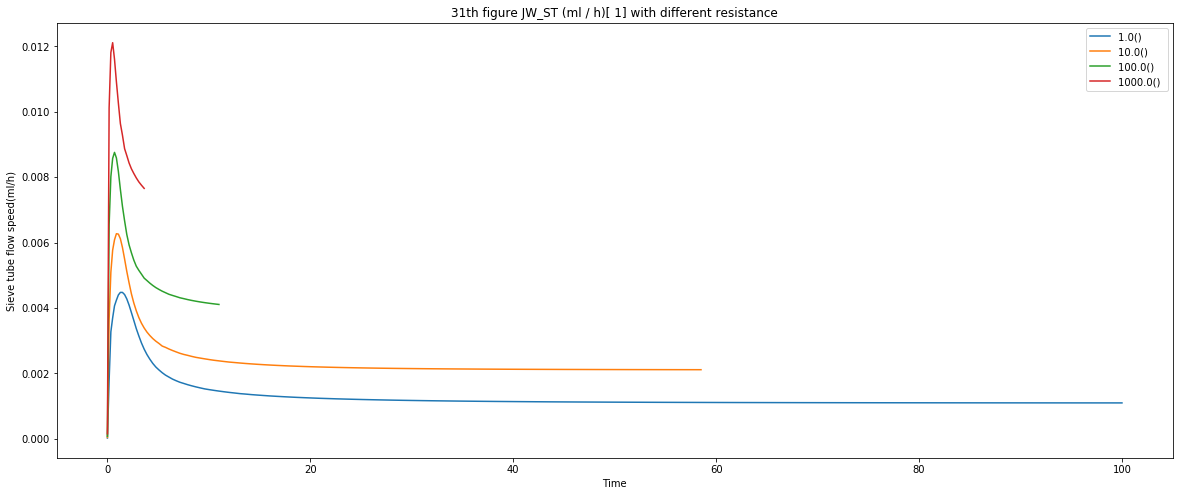

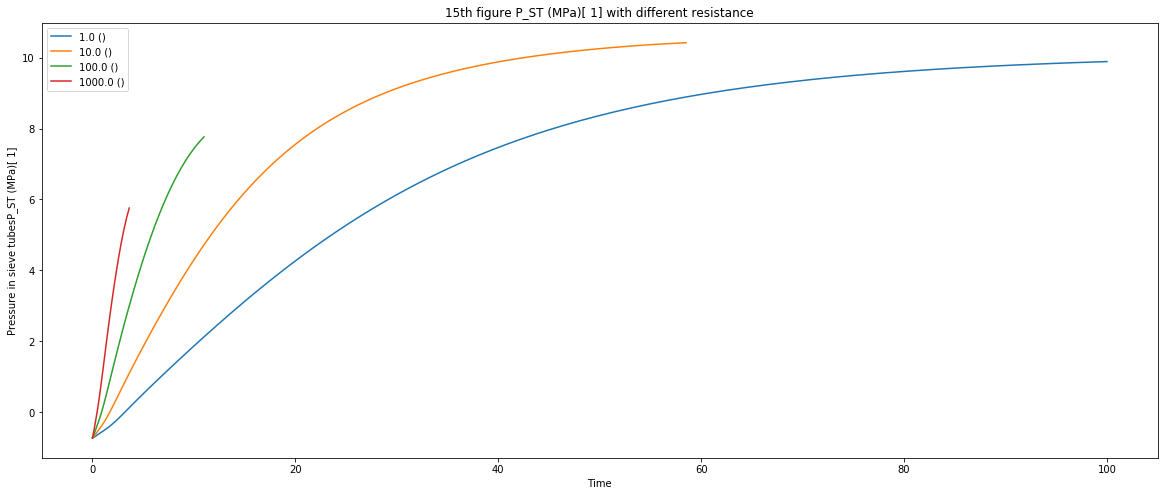

In [27]:
plt.rcParams['figure.figsize'] = [20, 8]
from scipy.stats import loglaplace,chi2
f = plt.figure()
    #from labellines import labelLine, labelLines
for j in range(0,4):
    
    path = 'smallkmu_large_vmu'.format(j)
    #pd.read_table(path,sep='\t')
    output = pd.read_table(path,sep='\t',header=1)
    ### C_ST
    time = np.array(output.iloc[:, 0])
    n_begin = (len(node_connection)+1)*3+1
    n_end = n_begin +(len(node_connection))
    #print(output.iloc[2, n_begin:n_end])

    var_leaf = np.array(output.iloc[:,n_begin + N1L_node[:,0]])
    var_root = np.array(output.iloc[:,n_begin + N1R_node[:,0]])
    var_n2 = np.array(output.iloc[:,n_begin+ N2_node[:,0]])
    var_n3 = np.array(output.iloc[:,n_begin + N3_node[:,0]])
    var_all = np.array(output.iloc[:,n_begin:n_end])
    for i in range(31,32):

        n_begin = (len(node_connection+1))*i+31 # careful here is the number of connections but bot nodes
        n_end = n_begin +(len(node_connection)-1)
        var_all = np.array(output.iloc[:,n_begin:n_end])
        time = np.array(output.iloc[:, 0])
        limited_time = time[0:40]
        limited_time
        limited_var_all =var_all[0:40]
        x = np.array(time)
        y = np.array(var_all)
        plt.plot(y=0.23)
        plt.xlabel("Time")
        plt.ylabel("Sieve tube flow speed(ml/h)")
        plt.title("{}th figure {} with different resistance".format(i ,output.columns[n_begin]))

    #     for i in range(len(np.transpose(y))):
    #         plt.plot(x,[pt[i] for pt in y],label = '{0}'.format(nodes_organtype[i+1,0]))
    plt.plot(x,[pt[62:63] for pt in y],label = '{}() '.format(rst_x[j]))
plt.legend()
#     labelLines(plt.gca().get_lines(), xvals=(0, 5), zorder=0)
plt.show()
s =output.columns[n_begin]
s = s.replace('/', '')
    #f.savefig("{}.pdf".format(s), bbox_inches='tight')
    
f = plt.figure()
    #from labellines import labelLine, labelLines
for j in range(0,4):
    
    path = './F/2019-01-21-{}.txt'.format(j)
    #pd.read_table(path,sep='\t')
    output = pd.read_table(path,sep='\t',header=1)
    ### C_ST
    time = np.array(output.iloc[:, 0])
    n_begin = (len(node_connection)+1)*3+1
    n_end = n_begin +(len(node_connection))
    #print(output.iloc[2, n_begin:n_end])

    var_leaf = np.array(output.iloc[:,n_begin + N1L_node[:,0]])
    var_root = np.array(output.iloc[:,n_begin + N1R_node[:,0]])
    var_n2 = np.array(output.iloc[:,n_begin+ N2_node[:,0]])
    var_n3 = np.array(output.iloc[:,n_begin + N3_node[:,0]])
    var_all = np.array(output.iloc[:,n_begin:n_end])
    for i in range(15,16): #NO. of the output (15,16) is pressure

        n_begin = (len(node_connection+1))*i+16 # careful here is the number of connections but bot nodes
        n_end = n_begin +(len(node_connection)-1)
        var_all = np.array(output.iloc[:,n_begin:n_end])
        time = np.array(output.iloc[:, 0])
        limited_time = time[0:40]
        limited_time
        limited_var_all =var_all[0:40]
        x = np.array(time)
        y = np.array(var_all)
        plt.xlabel("Time")
        plt.ylabel("Pressure in sieve tubes{}".format(output.columns[n_begin]))
        plt.title("{}th figure {} with different resistance".format(i ,output.columns[n_begin]))

    #     for i in range(len(np.transpose(y))):
    #         plt.plot(x,[pt[i] for pt in y],label = '{0}'.format(nodes_organtype[i+1,0]))
    plt.plot(x,[pt[62:63] for pt in y],label = '{} ()'.format(rst_x[j]))
plt.legend()
#     labelLines(plt.gca().get_lines(), xvals=(0, 5), zorder=0)
plt.show()
s =output.columns[n_begin]
s = s.replace('/', '')
    #f.savefig("{}.pdf".format(s), bbox_inches='tight')

In [93]:
import datetime
i=1
now = datetime.datetime.now()
piaf_munch_p_name = 'normal_kmu_vmu_'  #parameter name of piaf munch-- you name it
os.system(' mv /mnt/c/cpb1/python/mg_low1_2019-{:02}-{:02}*output.txt /mnt/c/cpb1/python/{}{}_output.txt '.format(now.month, now.day, piaf_munch_p_name ,i) )



0

output successful
output successful
output successful


KeyboardInterrupt: 

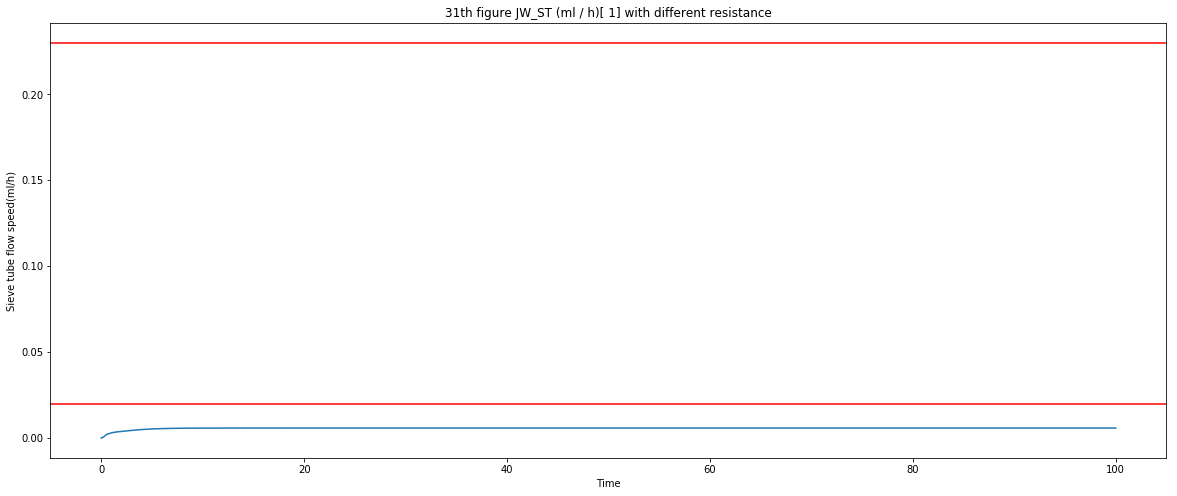

In [37]:
import datetime

now = datetime.datetime.now()
piaf_munch_p_name = 'normal_smallt'  #parameter name of piaf munch-- you name it
piaf_munch_path ='./'

vMU_x = np.zeros(10)
vMU_x[0] =2.82627e95 *512
vML_x = np.zeros(10)
vML_x[0] =0.000143136 * 16
kMU_x = np.zeros(10)
kMU_x[0] =  1e99
kML_x = np.zeros(10)
kML_x[0] = 1e-100

for i in range(1,10):
    vMU_x[i] = vMU_x[i-1] *2
    vML_x[i] = vML_x[i-1] *2
    kMU_x[i] = kMU_x[i-1] #* 2
    kML_x[i] = kML_x[i-1] #* 2
#vMU_x


#for i in range(1,10):
        
rst_x = np.zeros(10)
rst_x[0] =1
for i in range(1,10):
    rst_x[i] = rst_x[i-1] *10
rst_x   


# for i in range(len(vMU_x)):
for i in range(0,3):
    assign_sink_unloading_speed (vMU_x[i]) #2.82627e+95
    assign_source_loading_speed (vML_x[i])
#     rst=(nodes_r_st/rst_x[i])
#     r_ST = np.full(len(nodes_organtype), rst)  
    create_piafmunch_parameter(  )
    os.system(' /mnt/c/prog_sct.bas/programs/C++/PIAFMunch2/projects/PIAFMunch2.exe mg_low1.ini -noGUI -q')
    os.system(' mv /mnt/c/cpb1/python/mg_low1_2019-{:02}-{:02}*output.txt /mnt/c/cpb1/python/{}{}_output.txt '.format(now.month, now.day, piaf_munch_p_name ,i) )



plt.rcParams['figure.figsize'] = [20, 8]
from scipy.stats import loglaplace,chi2
f = plt.figure()
    #from labellines import labelLine, labelLines
for j in range(0,3):
    
    path = '{}{}_output.txt'.format(piaf_munch_p_name, j)
    #pd.read_table(path,sep='\t')
    output = pd.read_table(path,sep='\t',header=1)
    ### C_ST
    time = np.array(output.iloc[:, 0])
    n_begin = (len(node_connection)+1)*3+1
    n_end = n_begin +(len(node_connection))
    #print(output.iloc[2, n_begin:n_end])

    var_leaf = np.array(output.iloc[:,n_begin + N1L_node[:,0]])
    var_root = np.array(output.iloc[:,n_begin + N1R_node[:,0]])
    var_n2 = np.array(output.iloc[:,n_begin+ N2_node[:,0]])
    var_n3 = np.array(output.iloc[:,n_begin + N3_node[:,0]])
    var_all = np.array(output.iloc[:,n_begin:n_end])
    for i in range(31,32):

        n_begin = (len(node_connection+1))*i+31 # careful here is the number of connections but bot nodes
        n_end = n_begin +(len(node_connection)-1)
        var_all = np.array(output.iloc[:,n_begin:n_end])
        time = np.array(output.iloc[:, 0])
        limited_time = time[0:40]
        limited_time
        limited_var_all =var_all[0:40]
        x = np.array(time)
        y = np.array(var_all)
        plt.axhline(y=0.23, color='r', linestyle='-')
        plt.axhline(y=0.02, color='r', linestyle='-')
        plt.xlabel("Time")
        plt.ylabel("Sieve tube flow speed(ml/h)")
        plt.title("{}th figure {} with different resistance".format(i ,output.columns[n_begin]))

    #     for i in range(len(np.transpose(y))):
    #         plt.plot(x,[pt[i] for pt in y],label = '{0}'.format(nodes_organtype[i+1,0]))
    plt.plot(x,[pt[68:69] for pt in y],label = '{}() '.format(rst_x[j]))
plt.legend()
#     labelLines(plt.gca().get_lines(), xvals=(0, 5), zorder=0)
plt.show()
s =output.columns[n_begin]
s = s.replace('/', '')
    #f.savefig("{}.pdf".format(s), bbox_inches='tight')
    
f = plt.figure()
    #from labellines import labelLine, labelLines
for j in range(0,3):
    
    path = '{}{}_output.txt'.format(piaf_munch_p_name, j)
    #pd.read_table(path,sep='\t')
    output = pd.read_table(path,sep='\t',header=1)
    ### C_ST
    time = np.array(output.iloc[:, 0])
    n_begin = (len(node_connection)+1)*3+1
    n_end = n_begin +(len(node_connection))
    #print(output.iloc[2, n_begin:n_end])

    var_leaf = np.array(output.iloc[:,n_begin + N1L_node[:,0]])
    var_root = np.array(output.iloc[:,n_begin + N1R_node[:,0]])
    var_n2 = np.array(output.iloc[:,n_begin+ N2_node[:,0]])
    var_n3 = np.array(output.iloc[:,n_begin + N3_node[:,0]])
    var_all = np.array(output.iloc[:,n_begin:n_end])
    for i in range(15,16): #NO. of the output (15,16) is pressure

        n_begin = (len(node_connection+1))*i+16 # careful here is the number of connections but bot nodes
        n_end = n_begin +(len(node_connection)-1)
        var_all = np.array(output.iloc[:,n_begin:n_end])
        time = np.array(output.iloc[:, 0])
        limited_time = time[0:40]
        limited_time
        limited_var_all =var_all[0:40]
        x = np.array(time)
        y = np.array(var_all)
        plt.xlabel("Time")
        plt.ylabel("Pressure in sieve tubes{}".format(output.columns[n_begin]))
        plt.title("{}th figure {} with different resistance".format(i ,output.columns[n_begin]))

    #     for i in range(len(np.transpose(y))):
    #         plt.plot(x,[pt[i] for pt in y],label = '{0}'.format(nodes_organtype[i+1,0]))
    plt.plot(x,[pt[68:69] for pt in y],label = '{} ()'.format(rst_x[j]))
plt.legend()
#     labelLines(plt.gca().get_lines(), xvals=(0, 5), zorder=0)
plt.show()
s =output.columns[n_begin]
s = s.replace('/', '')
    #f.savefig("{}.pdf".format(s), bbox_inches='tight')

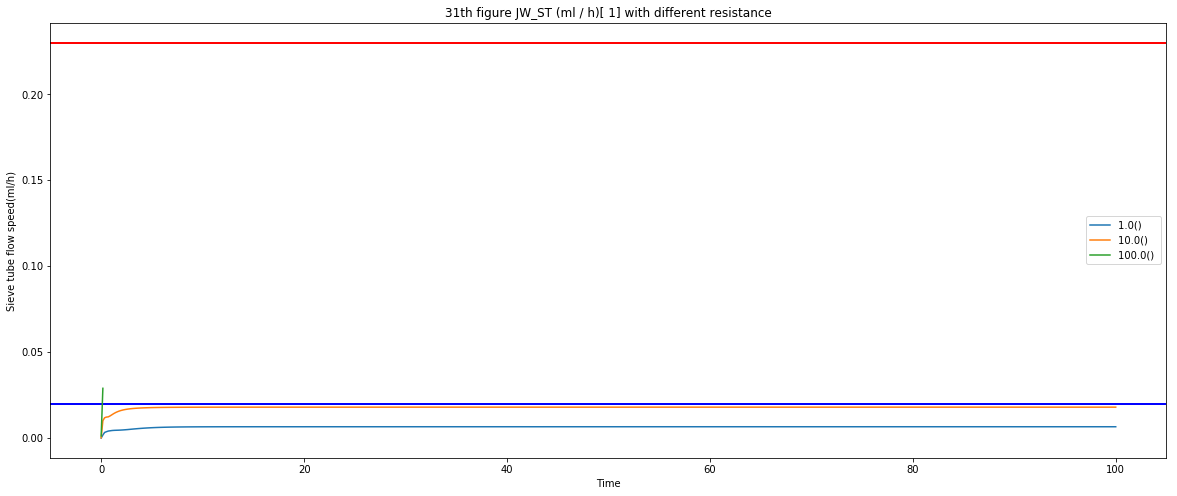

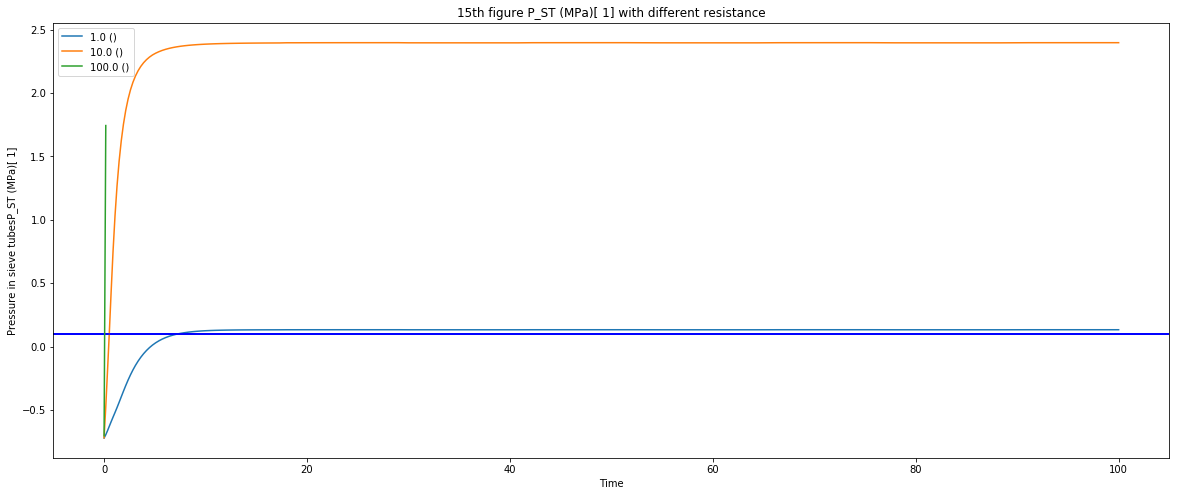

In [40]:
plt.rcParams['figure.figsize'] = [20, 8]
from scipy.stats import loglaplace,chi2
f = plt.figure()
    #from labellines import labelLine, labelLines
for j in range(0,3):
    
    path = '{}{}_output.txt'.format(piaf_munch_p_name, j)
    #pd.read_table(path,sep='\t')
    output = pd.read_table(path,sep='\t',header=1)
    ### C_ST
    time = np.array(output.iloc[:, 0])
    n_begin = (len(node_connection)+1)*3+1
    n_end = n_begin +(len(node_connection))
    #print(output.iloc[2, n_begin:n_end])

    var_leaf = np.array(output.iloc[:,n_begin + N1L_node[:,0]])
    var_root = np.array(output.iloc[:,n_begin + N1R_node[:,0]])
    var_n2 = np.array(output.iloc[:,n_begin+ N2_node[:,0]])
    var_n3 = np.array(output.iloc[:,n_begin + N3_node[:,0]])
    var_all = np.array(output.iloc[:,n_begin:n_end])
    for i in range(31,32):

        n_begin = (len(node_connection+1))*i+31 # careful here is the number of connections but bot nodes
        n_end = n_begin +(len(node_connection)-1)
        var_all = np.array(output.iloc[:,n_begin:n_end])
        time = np.array(output.iloc[:, 0])
        limited_time = time[0:40]
        limited_time
        limited_var_all =var_all[0:40]
        x = np.array(time)
        y = np.array(var_all)
        plt.axhline(y=0.23, color='r', linestyle='-')
        plt.axhline(y=0.02, color='b', linestyle='-')
        plt.xlabel("Time")
        plt.ylabel("Sieve tube flow speed(ml/h)")
        plt.title("{}th figure {} with different resistance".format(i ,output.columns[n_begin]))

    #     for i in range(len(np.transpose(y))):
    #         plt.plot(x,[pt[i] for pt in y],label = '{0}'.format(nodes_organtype[i+1,0]))
    plt.plot(x,[pt[62:63] for pt in y],label = '{}() '.format(rst_x[j]))
plt.legend()
#     labelLines(plt.gca().get_lines(), xvals=(0, 5), zorder=0)
plt.show()
s =output.columns[n_begin]
s = s.replace('/', '')
    #f.savefig("{}.pdf".format(s), bbox_inches='tight')
    
f = plt.figure()
    #from labellines import labelLine, labelLines
for j in range(0,3):
    
    path = '{}{}_output.txt'.format(piaf_munch_p_name, j)
    #pd.read_table(path,sep='\t')
    output = pd.read_table(path,sep='\t',header=1)
    ### C_ST
    time = np.array(output.iloc[:, 0])
    n_begin = (len(node_connection)+1)*3+1
    n_end = n_begin +(len(node_connection))
    #print(output.iloc[2, n_begin:n_end])

    var_leaf = np.array(output.iloc[:,n_begin + N1L_node[:,0]])
    var_root = np.array(output.iloc[:,n_begin + N1R_node[:,0]])
    var_n2 = np.array(output.iloc[:,n_begin+ N2_node[:,0]])
    var_n3 = np.array(output.iloc[:,n_begin + N3_node[:,0]])
    var_all = np.array(output.iloc[:,n_begin:n_end])
    for i in range(15,16): #NO. of the output (15,16) is pressure

        n_begin = (len(node_connection+1))*i+16 # careful here is the number of connections but bot nodes
        n_end = n_begin +(len(node_connection)-1)
        var_all = np.array(output.iloc[:,n_begin:n_end])
        time = np.array(output.iloc[:, 0])
        limited_time = time[0:40]
        limited_time
        limited_var_all =var_all[0:40]
        x = np.array(time)
        y = np.array(var_all)
#         plt.axhline(y=0.23, color='r', linestyle='-')
        plt.axhline(y=0.1, color='b', linestyle='-')
        plt.xlabel("Time")
        plt.ylabel("Pressure in sieve tubes{}".format(output.columns[n_begin]))
        plt.title("{}th figure {} with different resistance".format(i ,output.columns[n_begin]))

    #     for i in range(len(np.transpose(y))):
    #         plt.plot(x,[pt[i] for pt in y],label = '{0}'.format(nodes_organtype[i+1,0]))
    plt.plot(x,[pt[62:63] for pt in y],label = '{} ()'.format(rst_x[j]))
plt.legend()
#     labelLines(plt.gca().get_lines(), xvals=(0, 5), zorder=0)
plt.show()
s =output.columns[n_begin]
s = s.replace('/', '')
    #f.savefig("{}.pdf".format(s), bbox_inches='tight')

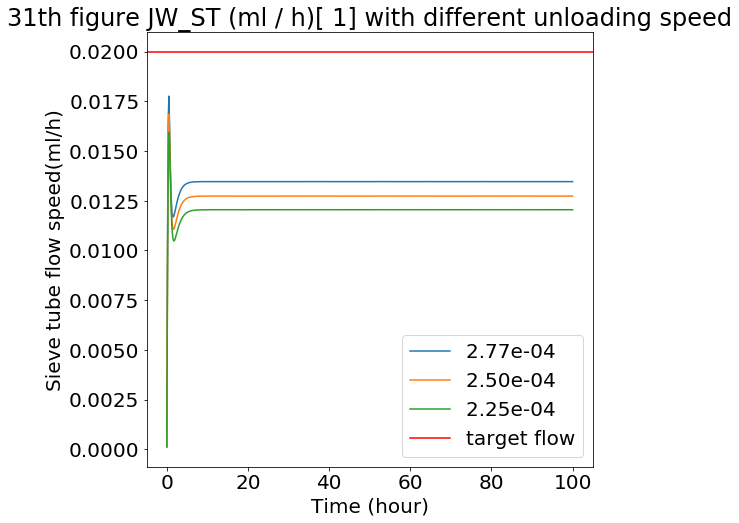

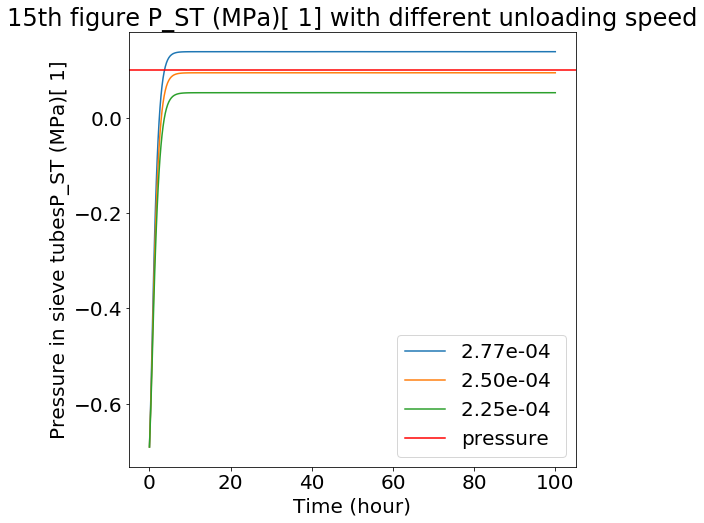

In [78]:
#piaf_munch_p_name = "smallkmu_large_vmu"

plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 20})
from scipy.stats import loglaplace,chi2
f = plt.figure()
    #from labellines import labelLine, labelLines
    
for j in range(7,10):
    
    path = '{}{}_output.txt'.format(piaf_munch_p_name, j)
    #pd.read_table(path,sep='\t')
    output = pd.read_table(path,sep='\t',header=1)
    ### C_ST
    time = np.array(output.iloc[:, 0])
    n_begin = (len(node_connection)+1)*3+1
    n_end = n_begin +(len(node_connection))
    #print(output.iloc[2, n_begin:n_end])

    var_leaf = np.array(output.iloc[:,n_begin + N1L_node[:,0]])
    var_root = np.array(output.iloc[:,n_begin + N1R_node[:,0]])
    var_n2 = np.array(output.iloc[:,n_begin+ N2_node[:,0]])
    var_n3 = np.array(output.iloc[:,n_begin + N3_node[:,0]])
    var_all = np.array(output.iloc[:,n_begin:n_end])
    for i in range(31,32):

        n_begin = (len(node_connection+1))*i+31 # careful here is the number of connections but bot nodes
        n_end = n_begin +(len(node_connection)-1)
        var_all = np.array(output.iloc[:,n_begin:n_end])
        time = np.array(output.iloc[:, 0])
        limited_time = time[0:40]
        limited_time
        limited_var_all =var_all[0:40]
        x = np.array(time)
        y = np.array(var_all)
        
        plt.xlabel("Time (hour)")
        plt.ylabel("Sieve tube flow speed(ml/h)")
        plt.title("{}th figure {} with different unloading speed".format(i ,output.columns[n_begin]))

    #     for i in range(len(np.transpose(y))):
    #         plt.plot(x,[pt[i] for pt in y],label = '{0}'.format(nodes_organtype[i+1,0]))
    plt.plot(x,[pt[62:63] for pt in y],label = '{:.{prec}e} '.format(vML_x[j],prec=2))
#plt.axhline(y=0.23, color='r', linestyle='-', label='all the volume')
plt.axhline(y=0.02, color='r', linestyle='-', label='target flow')
plt.legend()
#     labelLines(plt.gca().get_lines(), xvals=(0, 5), zorder=0)
plt.show()
s =output.columns[n_begin]
s = s.replace('/', '')
    #f.savefig("{}.pdf".format(s), bbox_inches='tight')
    
f = plt.figure()
    #from labellines import labelLine, labelLines
for j in range(7,10):
    
    path = '{}{}_output.txt'.format(piaf_munch_p_name, j)
    #pd.read_table(path,sep='\t')
    output = pd.read_table(path,sep='\t',header=1)
    ### C_ST
    time = np.array(output.iloc[:, 0])
    n_begin = (len(node_connection)+1)*3+1
    n_end = n_begin +(len(node_connection))
    #print(output.iloc[2, n_begin:n_end])

    var_leaf = np.array(output.iloc[:,n_begin + N1L_node[:,0]])
    var_root = np.array(output.iloc[:,n_begin + N1R_node[:,0]])
    var_n2 = np.array(output.iloc[:,n_begin+ N2_node[:,0]])
    var_n3 = np.array(output.iloc[:,n_begin + N3_node[:,0]])
    var_all = np.array(output.iloc[:,n_begin:n_end])
    for i in range(15,16): #NO. of the output (15,16) is pressure

        n_begin = (len(node_connection+1))*i+16 # careful here is the number of connections but bot nodes
        n_end = n_begin +(len(node_connection)-1)
        var_all = np.array(output.iloc[:,n_begin:n_end])
        time = np.array(output.iloc[:, 0])
        limited_time = time[0:40]
        limited_time
        limited_var_all =var_all[0:40]
        x = np.array(time)
        y = np.array(var_all)

        plt.xlabel("Time (hour)")
        plt.ylabel("Pressure in sieve tubes{}".format(output.columns[n_begin]))
        plt.title("{}th figure {} with different unloading speed".format(i ,output.columns[n_begin]))

    #     for i in range(len(np.transpose(y))):
    #         plt.plot(x,[pt[i] for pt in y],label = '{0}'.format(nodes_organtype[i+1,0]))
    plt.plot(x,[pt[68:69] for pt in y],label = '{:.{prec}e} '.format(vML_x[j],prec=2))
plt.axhline(y=0.1, color='r', linestyle='-', label='pressure')
plt.legend()
#     labelLines(plt.gca().get_lines(), xvals=(0, 5), zorder=0)
plt.show()
s =output.columns[n_begin]
s = s.replace('/', '')
    #f.savefig("{}.pdf".format(s), bbox_inches='tight')

In [ ]:
import datetime

now = datetime.datetime.now()
plt.rcParams.update({'font.size': 16})
piaf_munch_p_name = 'changeT_Tchange'  #parameter name of piaf munch-- you name it
piaf_munch_path ='./'

vMU_x = np.zeros(10)
vMU_x[0] =2.82627e95  #512 is the final number
vML_x = np.zeros(10)
vML_x[0] =0.00058  #8
kMU_x = np.zeros(10)
kMU_x[0] =  1e99
kML_x = np.zeros(10)
kML_x[0] = 1e-100

for i in range(1,10):
    vMU_x[i] = vMU_x[i-1] 
    vML_x[i] = vML_x[i-1] *0.5
    kMU_x[i] = kMU_x[i-1] 
    kML_x[i] = kML_x[i-1] #* 2
#vMU_x


#for i in range(1,10):
        
rst_x = np.zeros(10)
rst_x[0] =1
for i in range(1,10):
    rst_x[i] = rst_x[i-1] 
rst_x   


# for i in range(len(vMU_x)):
for i in range(0,10):
    assign_sink_unloading_speed (vMU_x[i]) #2.82627e+95
    assign_source_loading_speed (vML_x[i])
    rst=(nodes_r_st/rst_x[i]/10)
    r_ST = np.full(len(nodes_organtype), rst)  
    create_piafmunch_parameter(  )
    os.system(' /mnt/c/prog_sct.bas/programs/C++/PIAFMunch2/projects/PIAFMunch2.exe mg_low1.ini -noGUI -q')
    os.system(' mv /mnt/c/cpb1/python/mg_low1_2019-{:02}-{:02}*output.txt /mnt/c/cpb1/python/{}{}_output.txt '.format(now.month, now.day, piaf_munch_p_name ,i) )



plt.rcParams['figure.figsize'] = [20, 8]
from scipy.stats import loglaplace,chi2
f = plt.figure()
    #from labellines import labelLine, labelLines
for j in range(0,10):
    
    path = '{}{}_output.txt'.format(piaf_munch_p_name, j)
    #pd.read_table(path,sep='\t')
    output = pd.read_table(path,sep='\t',header=1)
    ### C_ST
    time = np.array(output.iloc[:, 0])
    n_begin = (len(node_connection)+1)*3+1
    n_end = n_begin +(len(node_connection))
    #print(output.iloc[2, n_begin:n_end])

    var_leaf = np.array(output.iloc[:,n_begin + N1L_node[:,0]])
    var_root = np.array(output.iloc[:,n_begin + N1R_node[:,0]])
    var_n2 = np.array(output.iloc[:,n_begin+ N2_node[:,0]])
    var_n3 = np.array(output.iloc[:,n_begin + N3_node[:,0]])
    var_all = np.array(output.iloc[:,n_begin:n_end])
    for i in range(31,32):

        n_begin = (len(node_connection+1))*i+31 # careful here is the number of connections but bot nodes
        n_end = n_begin +(len(node_connection)-1)
        var_all = np.array(output.iloc[:,n_begin:n_end])
        time = np.array(output.iloc[:, 0])
        limited_time = time[0:40]
        limited_time
        limited_var_all =var_all[0:40]
        x = np.array(time)
        y = np.array(var_all)
        
        plt.xlabel("Time")
        plt.ylabel("Sieve tube flow speed(ml/h)")
        plt.title("{}th figure {} with different resistance".format(i ,output.columns[n_begin]))

    #     for i in range(len(np.transpose(y))):
    #         plt.plot(x,[pt[i] for pt in y],label = '{0}'.format(nodes_organtype[i+1,0]))
    plt.plot(x,[pt[62:63] for pt in y],label = '{}() '.format(vMU_x[j]))
#plt.axhline(y=0.23, color='r', linestyle='-', label='all the volume')
plt.axhline(y=0.0002, color='r', linestyle='-', label='volume of single sieve tube')
plt.legend()
#     labelLines(plt.gca().get_lines(), xvals=(0, 5), zorder=0)
plt.show()
s =output.columns[n_begin]
s = s.replace('/', '')
    #f.savefig("{}.pdf".format(s), bbox_inches='tight')
    
f = plt.figure()
    #from labellines import labelLine, labelLines
for j in range(0,10):
    
    path = '{}{}_output.txt'.format(piaf_munch_p_name, j)
    #pd.read_table(path,sep='\t')
    output = pd.read_table(path,sep='\t',header=1)
    ### C_ST
    time = np.array(output.iloc[:, 0])
    n_begin = (len(node_connection)+1)*3+1
    n_end = n_begin +(len(node_connection))
    #print(output.iloc[2, n_begin:n_end])

    var_leaf = np.array(output.iloc[:,n_begin + N1L_node[:,0]])
    var_root = np.array(output.iloc[:,n_begin + N1R_node[:,0]])
    var_n2 = np.array(output.iloc[:,n_begin+ N2_node[:,0]])
    var_n3 = np.array(output.iloc[:,n_begin + N3_node[:,0]])
    var_all = np.array(output.iloc[:,n_begin:n_end])
    for i in range(15,16): #NO. of the output (15,16) is pressure

        n_begin = (len(node_connection+1))*i+16 # careful here is the number of connections but bot nodes
        n_end = n_begin +(len(node_connection)-1)
        var_all = np.array(output.iloc[:,n_begin:n_end])
        time = np.array(output.iloc[:, 0])
        limited_time = time[0:40]
        limited_time
        limited_var_all =var_all[0:40]
        x = np.array(time)
        y = np.array(var_all)

        plt.xlabel("Time")
        plt.ylabel("Pressure in sieve tubes{}".format(output.columns[n_begin]))
        plt.title("{}th figure {} with different resistance".format(i ,output.columns[n_begin]))

    #     for i in range(len(np.transpose(y))):
    #         plt.plot(x,[pt[i] for pt in y],label = '{0}'.format(nodes_organtype[i+1,0]))
    plt.plot(x,[pt[62:63] for pt in y],label = '{} ()'.format(vMU_x[j]))
plt.axhline(y=0.1, color='r', linestyle='-', label='pressure')
plt.legend()
#     labelLines(plt.gca().get_lines(), xvals=(0, 5), zorder=0)
plt.show()
s =output.columns[n_begin]
s = s.replace('/', '')
    #f.savefig("{}.pdf".format(s), bbox_inches='tight')

output successful


In [42]:
! /mnt/c/prog_sct.bas/programs/C++/PIAFMunch2/projects/PIAFMunch2.exe